
# calculate the dissociation curve of N2 with sto3g basis


In [1]:
import numpy as np
from pyscf import gto,scf,fci,cc,mp

mol = gto.Mole()
natoms = 2
distance = list(np.linspace(0.5, 3.0, 30)) + [3.5, 4.0]
n = len(distance)
energy_RHF = np.zeros(n)
energy_UHF = np.zeros(n)
energy_FCI = np.zeros(n)
energy_CCSD = np.zeros(n)
energy_UCCSD = np.zeros(n)
energy_MP2 = np.zeros(n)

## Single point

In [2]:
R = 1.0
mol.atom = [['N',(0.0, 0.0, 0.0)]]
mol.spin = 3
mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
mol.verbose =0
mol.build()

molRHF = scf.RHF(mol) 
e_RHF=molRHF.kernel()    
print(e_RHF)

molFCI = fci.FCI(mol, molRHF.mo_coeff)
molFCI.nroots = 2
result = molFCI.kernel()
print(result[0])
print(result[1][0])

-53.71901016259394
[-53.71901016 -53.25927116]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [2]:
R = 1.0
mol.atom = [['N',(0.0, 0.0, 0.0)],['N',(0.0, 0.0, R)]]
mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
mol.verbose = 5
mol.build()

molRHF = scf.RHF(mol) 
molRHF.kernel()    
dm0 = molRHF.make_rdm1()
dm0r1 = dm0
print('dm0:', dm0.shape)

# molFCI = fci.FCI(mol, molRHF.mo_coeff)
# molFCI.nroots = 2
# result = molFCI.kernel()
# print(result[0])
# print(result[1][0])

molCCSD = cc.CCSD(molRHF)
molCCSD.max_cycle = 100
e,t1r1,t2r1 = molCCSD.kernel()
print(t1r1.shape)
print(t2r1.shape)

System: uname_result(system='Linux', node='localhost.localdomain', release='3.10.0-957.el7.x86_64', version='#1 SMP Thu Nov 8 23:39:32 UTC 2018', machine='x86_64', processor='x86_64')  Threads 72
Python 3.7.0 (default, Oct  9 2018, 10:31:47) 
[GCC 7.3.0]
numpy 1.19.4  scipy 1.5.4
Date: Wed Nov 25 10:29:38 2020
PySCF version 1.7.5
PySCF path  /home/dell/.local/lib/python3.7/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 14
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT]  1 N      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr
[INPUT]  2 N      0.000000000000   0.000000000000   1.000000000000 AA    0.000000000000   0.000000000000   1.889726124565 Bohr
[INPUT] ---------------- BASIS SET ---------------- 
[INPUT] l, kappa, [nprim/nctr], expnt,        

## FCI

In [3]:
dm0 = dm0r1.copy()
for i,R in enumerate(distance):
    mol.atom = [['N',(0.0, 0.0, 0.0)],['N',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()

    print("R=",R)
    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel(dm0=dm0)
    dm0 = molRHF.make_rdm1()
    
    molFCI = fci.FCI(mol, molRHF.mo_coeff)
    molFCI.nroots = 2
    molFCI = fci.addons.fix_spin_(molFCI, ss=0) # S*(S+1)
    energy_FCI[i] = molFCI.kernel()[0][0]

R= 0.5


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp_8aclxd5
max_memory 4000 MB (current use 250 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -227.410860136109  E_coul = 73.06611012373672
init E= -102.485383342212
cond(S) = 464.85030817446034
    CPU time for initialize scf      4.06 sec, wall time      0.06 sec
  HOMO = -0.387355368219426  LUMO = 0.693865917839902
  mo_energy =
[-17.36823831 -16.52883209  -1.74705792  -1.416616    -1.416616
  -0.63096036  -0.38735537   0.69386592   0.69386592   5.63126987]
E1 = -226.9331720218799  E_coul = 74.50091666494126
cycle= 1 E= -100.572888686779  delta_E= 1.91  |g|= 0.0838  |ddm|= 2.58
    CPU time for cycle= 1      0.44 s

Overwritten attributes  contract_2e  of <class 'pyscf.fci.FCI.<locals>.CISolver'>


davidson 0 2  |r|= 0.447  e= [-152.4324637 -151.4718013]  max|de|= -152  lindep= 0.0037
davidson 1 4  |r|= 0.357  e= [-152.47028538 -151.60903278]  max|de|= -0.137  lindep= 0.842
davidson 2 6  |r|= 0.14  e= [-152.470967  -151.6833325]  max|de|= -0.0743  lindep= 0.934
davidson 3 8  |r|= 0.0197  e= [-152.47097992 -151.68673968]  max|de|= -0.00341  lindep= 0.761
davidson 4 10  |r|= 0.00272  e= [-152.47098012 -151.68679113]  max|de|= -5.15e-05  lindep= 0.898
davidson 5 12  |r|= 0.000476  e= [-152.47098012 -151.68679227]  max|de|= -1.14e-06  lindep= 0.694
root 0 converged  |r|= 1.09e-06  e= -152.47098011831153  max|de|= -1.56e-11
davidson 6 14  |r|= 0.000114  e= [-152.47098012 -151.68679231]  max|de|= -4.18e-08  lindep= 0.883
davidson 7 2  |r|= 0.000114  e= [-152.47098012 -151.68679231]  max|de|= 5.68e-14  lindep=    1
davidson 8 3  |r|= 3.92e-05  e= [-152.47098012 -151.68679231]  max|de|= -2.64e-09  lindep= 0.825
davidson 9 4  |r|= 7.03e-06  e= [-152.47098012 -151.68679231]  max|de|= -2.8e

converged SCF energy = -105.300094320566
davidson 0 2  |r|= 0.496  e= [-143.86218748 -142.99462883]  max|de|= -144  lindep= 0.00377
davidson 1 4  |r|= 0.316  e= [-143.92298743 -143.14960488]  max|de|= -0.155  lindep= 0.87
davidson 2 6  |r|= 0.194  e= [-143.92499634 -143.23074438]  max|de|= -0.0811  lindep= 0.916
davidson 3 8  |r|= 0.0338  e= [-143.92505186 -143.23931442]  max|de|= -0.00857  lindep= 0.799
davidson 4 10  |r|= 0.00566  e= [-143.92505365 -143.23952363]  max|de|= -0.000209  lindep= 0.892
davidson 5 12  |r|= 0.00115  e= [-143.9250537  -143.23952992]  max|de|= -6.29e-06  lindep= 0.669
davidson 6 14  |r|= 0.00025  e= [-143.9250537  -143.23953019]  max|de|= -2.74e-07  lindep= 0.92
root 0 converged  |r|= 9.16e-06  e= -143.92505369783328  max|de|= -7.96e-13
davidson 7 2  |r|= 0.00025  e= [-143.9250537  -143.23953019]  max|de|= -7.96e-13  lindep= 0.994
davidson 8 3  |r|= 9.13e-05  e= [-143.9250537  -143.23953021]  max|de|= -1.62e-08  lindep= 0.924
davidson 9 4  |r|= 2.78e-05  e= [

    CPU time for cycle= 5      0.58 sec, wall time      0.01 sec
  HOMO = -0.608903112718481  LUMO = 0.42342048955006
  mo_energy =
[-15.68119002 -15.65958887  -1.69598681  -0.78702154  -0.78702154
  -0.69564048  -0.60890311   0.42342049   0.42342049   1.9713098 ]
E1 = -203.4581273393836  E_coul = 65.81371129914488
Extra cycle  E= -106.952137806879  delta_E= 5.68e-14  |g|= 1.93e-13  |ddm|= 3.45e-12
    CPU time for scf_cycle     10.74 sec, wall time      0.16 sec
    CPU time for SCF     11.26 sec, wall time      0.17 sec
converged SCF energy = -106.952137806879
davidson 0 2  |r|= 0.539  e= [-137.64441603 -136.93969317]  max|de|= -138  lindep= 0.00347
davidson 1 4  |r|= 0.325  e= [-137.73323597 -137.12480236]  max|de|= -0.185  lindep=  0.9
davidson 2 6  |r|= 0.202  e= [-137.73846734 -137.20614715]  max|de|= -0.0813  lindep= 0.914
davidson 3 8  |r|= 0.0431  e= [-137.73866293 -137.21772817]  max|de|= -0.0116  lindep= 0.908
davidson 4 10  |r|= 0.00912  e= [-137.73867506 -137.21811357]  ma

    CPU time for cycle= 3      1.00 sec, wall time      0.01 sec
  HOMO = -0.560369219494479  LUMO = 0.320294064720938
  mo_energy =
[-15.55069586 -15.5465793   -1.52253442  -0.71210035  -0.63239989
  -0.63239989  -0.56036922   0.32029406   0.32029406   1.33442591]
E1 = -195.54915248025492  E_coul = 62.617497102002396
cycle= 4 E= -107.441458201394  delta_E= -3.95e-09  |g|= 1.55e-08  |ddm|= 0.000351
    CPU time for cycle= 4      1.96 sec, wall time      0.03 sec
  HOMO = -0.560369236765991  LUMO = 0.320294047725115
  mo_energy =
[-15.55069591 -15.54657934  -1.52253445  -0.71210039  -0.63239991
  -0.63239991  -0.56036924   0.32029405   0.32029405   1.33442593]
E1 = -195.54915248391148  E_coul = 62.61749710565899
cycle= 5 E= -107.441458201394  delta_E= 2.84e-14  |g|= 1.72e-12  |ddm|= 2.7e-08
    CPU time for cycle= 5      1.99 sec, wall time      0.03 sec
  HOMO = -0.560369236764047  LUMO = 0.320294047727047
  mo_energy =
[-15.55069591 -15.54657934  -1.52253445  -0.71210039  -0.63239991


  HOMO = -0.513740929722784  LUMO = 0.242495884849682
  mo_energy =
[-15.4911713  -15.49041797  -1.35865199  -0.73546612  -0.51651917
  -0.51374093  -0.51374093   0.24249588   0.24249588   0.92711017]
E1 = -189.33768213229433  E_coul = 60.05041650483329
cycle= 2 E= -107.49129992551  delta_E= -7.7e-06  |g|= 0.00111  |ddm|= 0.0098
    CPU time for cycle= 2      0.63 sec, wall time      0.01 sec
  HOMO = -0.513524909342026  LUMO = 0.242594482468667
  mo_energy =
[-15.49083146 -15.49007348  -1.35834683  -0.73552205  -0.51624076
  -0.51352491  -0.51352491   0.24259448   0.24259448   0.92728844]
E1 = -189.33846929971622  E_coul = 60.05120320561956
cycle= 3 E= -107.491300392145  delta_E= -4.67e-07  |g|= 2.93e-05  |ddm|= 0.00301
    CPU time for cycle= 3      0.51 sec, wall time      0.01 sec
  HOMO = -0.513518638257747  LUMO = 0.242597173529002
  mo_energy =
[-15.49082372 -15.49006591  -1.35833718  -0.73552365  -0.51623319
  -0.51351864  -0.51351864   0.24259717   0.24259717   0.92729346]
E1 

davidson 16 5  |r|= 0.00846  e= [-127.98929975 -127.68149473]  max|de|= -9.27e-05  lindep= 0.951
davidson 17 6  |r|= 0.00576  e= [-127.98929975 -127.68153678]  max|de|= -4.21e-05  lindep= 0.966
davidson 18 7  |r|= 0.00274  e= [-127.98929975 -127.68155406]  max|de|= -1.73e-05  lindep= 0.95
davidson 19 8  |r|= 0.00158  e= [-127.98929975 -127.68155856]  max|de|= -4.5e-06  lindep= 0.939
davidson 20 9  |r|= 0.00133  e= [-127.98929975 -127.68156061]  max|de|= -2.05e-06  lindep= 0.854
davidson 21 10  |r|= 0.0025  e= [-127.98929975 -127.68156538]  max|de|= -4.77e-06  lindep= 0.89
davidson 22 11  |r|= 0.00186  e= [-127.98929975 -127.6815706 ]  max|de|= -5.23e-06  lindep= 0.922
davidson 23 12  |r|= 0.000986  e= [-127.98929975 -127.6815724 ]  max|de|= -1.8e-06  lindep= 0.949
davidson 24 13  |r|= 0.000378  e= [-127.98929975 -127.68157285]  max|de|= -4.43e-07  lindep= 0.967
davidson 25 14  |r|= 0.000162  e= [-127.98929975 -127.68157291]  max|de|= -6.45e-08  lindep= 0.954
davidson 26 2  |r|= 0.00016

R= 1.4482758620689655


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpj0rpsyih
max_memory 4000 MB (current use 328 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -181.44286200122446  E_coul = 56.29250566433525
init E= -107.246527367429
cond(S) = 4.135971879593984
    CPU time for initialize scf      7.56 sec, wall time      0.11 sec
  HOMO = -0.433917317774438  LUMO = 0.106056490196132
  mo_energy =
[-15.51725905 -15.51657875  -1.21944143  -0.83210974  -0.51218416
  -0.43391732  -0.43391732   0.10605649   0.10605649   0.49168096]
E1 = -182.34838742635938  E_coul = 57.127326024639295
cycle= 1 E= -107.31723243226  delta_E= -0.0707  |g|= 0.00455  |ddm|= 0.129
    CPU time 

cycle= 5 E= -107.242244903432  delta_E=    0  |g|= 1.91e-09  |ddm|= 2.66e-09
    CPU time for cycle= 5      1.98 sec, wall time      0.03 sec
  HOMO = -0.352972700873373  LUMO = 0.142476632562487
  mo_energy =
[-15.4276117  -15.42726355  -1.12444582  -0.78380633  -0.4307908
  -0.3529727   -0.3529727    0.14247663   0.14247663   0.47937754]
E1 = -180.4807543616714  E_coul = 56.340513576951224
Extra cycle  E= -107.242244903432  delta_E= 2.84e-14  |g|= 4.47e-09  |ddm|= 4.82e-09
    CPU time for scf_cycle     12.69 sec, wall time      0.18 sec
    CPU time for SCF     13.27 sec, wall time      0.19 sec
converged SCF energy = -107.242244903432
davidson 0 2  |r|= 0.531  e= [-123.77340378 -123.77340341]  max|de|= -124  lindep=    1
davidson 1 4  |r|= 0.388  e= [-124.09270172 -123.77360165]  max|de|= -0.319  lindep= 0.844
davidson 2 6  |r|= 0.361  e= [-124.21595042 -123.81128386]  max|de|= -0.123  lindep= 0.638
Old state -> New state
    0     ->     1 
davidson 3 8  |r|= 0.39  e= [-124.355652

davidson 11 10  |r|= 0.0216  e= [-123.53374673 -123.31768715]  max|de|= -0.000447  lindep= 0.826
davidson 12 12  |r|= 0.0126  e= [-123.53374733 -123.31802686]  max|de|= -0.00034  lindep= 0.802
davidson 13 14  |r|= 0.00811  e= [-123.53374745 -123.31817924]  max|de|= -0.000152  lindep= 0.965
davidson 14 2  |r|= 0.00811  e= [-123.53374745 -123.31817924]  max|de|= -5.68e-14  lindep= 0.997
davidson 15 4  |r|= 0.00452  e= [-123.53374746 -123.31821561]  max|de|= -3.64e-05  lindep= 0.954
davidson 16 6  |r|= 0.00368  e= [-123.53374746 -123.31823947]  max|de|= -2.39e-05  lindep= 0.914
davidson 17 8  |r|= 0.0025  e= [-123.53374746 -123.3182471 ]  max|de|= -7.62e-06  lindep= 0.799
davidson 18 10  |r|= 0.00164  e= [-123.53374746 -123.31825002]  max|de|= -2.92e-06  lindep= 0.908
root 0 converged  |r|= 4.46e-06  e= -123.53374746500833  max|de|= -5.87e-11
davidson 19 12  |r|= 0.00106  e= [-123.53374747 -123.31825221]  max|de|= -2.19e-06  lindep= 0.933
davidson 20 13  |r|= 0.000741  e= [-123.53374747 -

davidson 27 8  |r|= 9.26e-05  e= [-122.6978452  -122.50337272]  max|de|= -1.37e-08  lindep= 0.948
davidson 28 9  |r|= 5.82e-05  e= [-122.6978452  -122.50337272]  max|de|= -6.13e-09  lindep= 0.948
davidson 29 10  |r|= 4.4e-05  e= [-122.6978452  -122.50337273]  max|de|= -2.75e-09  lindep= 0.949
davidson 30 11  |r|= 3.51e-05  e= [-122.6978452  -122.50337273]  max|de|= -1.25e-09  lindep= 0.934
davidson 31 12  |r|= 2.11e-05  e= [-122.6978452  -122.50337273]  max|de|= -5.92e-10  lindep= 0.938
davidson 32 13  |r|= 1.22e-05  e= [-122.6978452  -122.50337273]  max|de|= -2.26e-10  lindep= 0.822
root 1 converged  |r|= 7.24e-06  e= -122.50337272841742  max|de|= -9.82e-11
converged 33 14  |r|= 7.24e-06  e= [-122.6978452  -122.50337273]  max|de|= -9.82e-11
R= 1.793103448275862


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv

diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmppy36mfnl
max_memory 4000 MB (current use 329 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -174.0091979285553  E_coul = 53.2926036185726
init E= -106.919148131683
cond(S) = 2.1755927813667664
    CPU time for initialize scf      8.20 sec, wall time      0.12 sec
  HOMO = -0.294375303259188  LUMO = 0.0510928878761024
  mo_energy =
[-15.43721659 -15.43680267  -1.02886983  -0.85945077  -0.38011626
  -0.2943753   -0.2943753    0.05109289   0.05109289   0.22609184]
E1 = -174.5962478324724  E_coul = 53.84233522153883
cycle= 1 E= -106.956466432634  delta_E= -0.0373  |g|= 0.00408  |ddm|= 0.0879
    CPU time for cycle= 1      0.53 sec, wall time      0.01 sec
  HOMO = -0.260142993244122  LUMO = 0.0883065475715711
  mo_energy =
[-15.38693552 -15.38662084  -0.99770841  -0.81913493  -0.345104

SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpyebj9nv3
max_memory 4000 MB (current use 328 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -172.90208274949083  E_coul = 52.846765377515716
init E= -106.863022341847
cond(S) = 2.0234547393039155
    CPU time for initialize scf      8.27 sec, wall time      0.12 sec
  HOMO = -0.274988096871438  LUMO = 0.0456563953878105
  mo_energy =
[-15.42406168 -15.42371368  -1.00546692  -0.86181522  -0.35557591
  -0.2749881   -0.2749881    0.0456564    0.0456564    0.19657764]
E1 = -173.42748107198125  E_coul = 53.34038597298128
cycle= 1 E= -106.894800068872  delta_E= -0.0318  |g|= 0.00362  |ddm|= 0.0807
    CPU time for cycle= 1      2.02 sec, wall time      0.03 sec
  HOMO = -0.243963897419572  LUMO = 0.0791186011057401
  mo_energy =
[-15.37890454 -15.37863133  -0.97736673  -0.8255631   -0.32496197
  -0.2439639   -0.2439639    0.0791186    0.079118

converged 53 14  |r|= 9.53e-06  e= [-120.65063021 -120.4583442 ]  max|de|= -9.05e-11
R= 2.0517241379310347


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpan_gzz41
max_memory 4000 MB (current use 328 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -171.88603471239242  E_coul = 52.43684385664594
init E= -106.811193936128
cond(S) = 1.9105359133908537
    CPU time for initialize scf      7.65 sec, wall time      0.11 sec
  HOMO = -0.257709392178419  LUMO = 0.0413301556345621
  mo_energy =
[-15.41179449 -15.41150944  -0.98540995  -0.86345462  -0.33236151
  -0.25770939  -0.25770939   0.04133016   0.04133016   0.17172999]
E1 = -172.35313419545543  E_coul = 52.877096756987406
c

davidson 50 8  |r|= 0.000118  e= [-120.08934224 -119.88807145]  max|de|= -1.56e-08  lindep= 0.906
davidson 51 9  |r|= 7.55e-05  e= [-120.08934224 -119.88807145]  max|de|= -8.19e-09  lindep= 0.975
davidson 52 10  |r|= 5.48e-05  e= [-120.08934224 -119.88807146]  max|de|= -4.11e-09  lindep= 0.978
davidson 53 11  |r|= 4.73e-05  e= [-120.08934224 -119.88807146]  max|de|= -2.41e-09  lindep= 0.892
davidson 54 12  |r|= 4.44e-05  e= [-120.08934224 -119.88807146]  max|de|= -2.21e-09  lindep= 0.928
davidson 55 13  |r|= 3.65e-05  e= [-120.08934224 -119.88807146]  max|de|= -1.92e-09  lindep= 0.892
davidson 56 14  |r|= 3.58e-05  e= [-120.08934224 -119.88807147]  max|de|= -1.43e-09  lindep= 0.961
davidson 57 2  |r|= 3.58e-05  e= [-120.08934224 -119.88807147]  max|de|= -5.68e-14  lindep= 0.997
davidson 58 3  |r|= 2.06e-05  e= [-120.08934224 -119.88807147]  max|de|= -6.39e-10  lindep= 0.989
davidson 59 4  |r|= 2.03e-05  e= [-120.08934224 -119.88807147]  max|de|= -3.21e-10  lindep= 0.998
davidson 60 5  

davidson 35 10  |r|= 0.00648  e= [-119.5753528  -119.36449412]  max|de|= -7.82e-05  lindep= 0.962
davidson 36 11  |r|= 0.00558  e= [-119.5753528  -119.36452073]  max|de|= -2.66e-05  lindep= 0.984
davidson 37 12  |r|= 0.00552  e= [-119.5753528  -119.36454257]  max|de|= -2.18e-05  lindep= 0.988
davidson 38 13  |r|= 0.00397  e= [-119.5753528  -119.36455955]  max|de|= -1.7e-05  lindep= 0.97
davidson 39 14  |r|= 0.00305  e= [-119.5753528  -119.36457073]  max|de|= -1.12e-05  lindep= 0.977
davidson 40 2  |r|= 0.00305  e= [-119.5753528  -119.36457073]  max|de|= -1.99e-13  lindep= 0.999
davidson 41 3  |r|= 0.00183  e= [-119.5753528  -119.36457464]  max|de|= -3.91e-06  lindep= 0.968
davidson 42 4  |r|= 0.00156  e= [-119.5753528 -119.364577 ]  max|de|= -2.36e-06  lindep= 0.975
davidson 43 5  |r|= 0.00122  e= [-119.5753528  -119.36457877]  max|de|= -1.77e-06  lindep= 0.982
davidson 44 6  |r|= 0.00126  e= [-119.5753528  -119.36457989]  max|de|= -1.12e-06  lindep= 0.97
davidson 45 7  |r|= 0.00113  e

davidson 4 10  |r|= 0.297  e= [-118.87454529 -118.57329551]  max|de|= -0.15  lindep= 0.0296
Old state -> New state
    0     ->     1 
davidson 5 12  |r|= 0.454  e= [-118.98586862 -118.60388821]  max|de|= 0.271  lindep= 0.174
davidson 6 14  |r|= 0.242  e= [-119.03058613 -118.83167007]  max|de|= -0.228  lindep= 0.957
davidson 7 2  |r|= 0.242  e= [-119.03058613 -118.83167007]  max|de|= 4.26e-14  lindep= 0.969
davidson 8 4  |r|= 0.16  e= [-119.05017483 -118.8534753 ]  max|de|= -0.0218  lindep= 0.946
davidson 9 6  |r|= 0.129  e= [-119.09118046 -118.85914343]  max|de|= -0.041  lindep= 0.981
davidson 10 8  |r|= 0.0546  e= [-119.10087423 -118.86325829]  max|de|= -0.00969  lindep= 0.948
davidson 11 10  |r|= 0.052  e= [-119.10213302 -118.86815557]  max|de|= -0.0049  lindep= 0.941
davidson 12 12  |r|= 0.0433  e= [-119.10244116 -118.87074885]  max|de|= -0.00259  lindep= 0.968
davidson 13 14  |r|= 0.0278  e= [-119.10250453 -118.8719317 ]  max|de|= -0.00118  lindep= 0.963
davidson 14 2  |r|= 0.0278

davidson 88 10  |r|= 3.25e-05  e= [-119.1025241  -118.88310648]  max|de|= -9.06e-10  lindep= 0.974
davidson 89 11  |r|= 3.41e-05  e= [-119.1025241  -118.88310648]  max|de|= -8.95e-10  lindep= 0.954
davidson 90 12  |r|= 2.76e-05  e= [-119.1025241  -118.88310648]  max|de|= -1e-09  lindep= 0.981
davidson 91 13  |r|= 2.18e-05  e= [-119.1025241  -118.88310648]  max|de|= -6.13e-10  lindep= 0.951
davidson 92 14  |r|= 2.09e-05  e= [-119.1025241  -118.88310648]  max|de|= -4.39e-10  lindep= 0.965
davidson 93 2  |r|= 2.09e-05  e= [-119.1025241  -118.88310648]  max|de|= 8.53e-14  lindep= 0.998
davidson 94 3  |r|= 1.51e-05  e= [-119.1025241  -118.88310648]  max|de|= -2.59e-10  lindep= 0.998
davidson 95 4  |r|= 1.52e-05  e= [-119.1025241  -118.88310648]  max|de|= -2e-10  lindep= 0.986
davidson 96 5  |r|= 1.51e-05  e= [-119.1025241  -118.88310648]  max|de|= -2.2e-10  lindep= 0.966
davidson 97 6  |r|= 1.14e-05  e= [-119.1025241  -118.88310648]  max|de|= -1.6e-10  lindep= 0.951
root 1 converged  |r|= 9

davidson 47 9  |r|= 0.00752  e= [-118.66578096 -118.43890621]  max|de|= -3.94e-05  lindep= 0.954
davidson 48 10  |r|= 0.00654  e= [-118.66578096 -118.43894816]  max|de|= -4.2e-05  lindep= 0.97
davidson 49 11  |r|= 0.00641  e= [-118.66578096 -118.43899498]  max|de|= -4.68e-05  lindep= 0.955
davidson 50 12  |r|= 0.00566  e= [-118.66578096 -118.43903011]  max|de|= -3.51e-05  lindep= 0.967
davidson 51 13  |r|= 0.00432  e= [-118.66578096 -118.43905191]  max|de|= -2.18e-05  lindep= 0.948
davidson 52 14  |r|= 0.00379  e= [-118.66578096 -118.43907482]  max|de|= -2.29e-05  lindep= 0.948
davidson 53 2  |r|= 0.00379  e= [-118.66578096 -118.43907482]  max|de|= -1.42e-14  lindep= 0.996
davidson 54 3  |r|= 0.00212  e= [-118.66578096 -118.43908146]  max|de|= -6.64e-06  lindep= 0.998
davidson 55 4  |r|= 0.00339  e= [-118.66578096 -118.43909054]  max|de|= -9.08e-06  lindep= 0.98
davidson 56 5  |r|= 0.004  e= [-118.66578096 -118.43910138]  max|de|= -1.08e-05  lindep= 0.968
davidson 57 6  |r|= 0.00265  e

    CPU time for SCF      9.08 sec, wall time      0.13 sec
converged SCF energy = -106.658063939727
davidson 0 2  |r|= 0.553  e= [-117.5384378  -117.53843722]  max|de|= -118  lindep= 0.941
davidson 1 4  |r|= 0.357  e= [-117.80484886 -117.69384753]  max|de|= -0.266  lindep= 0.606
davidson 2 6  |r|= 0.332  e= [-117.93583464 -117.69385971]  max|de|= -0.131  lindep= 0.00506
davidson 3 8  |r|= 0.301  e= [-118.01424717 -117.72553343]  max|de|= -0.0784  lindep= 0.0435
davidson 4 10  |r|= 0.194  e= [-118.12208543 -117.73109337]  max|de|= -0.108  lindep= 0.409
davidson 5 12  |r|= 0.204  e= [-118.1624162  -117.73807654]  max|de|= -0.0403  lindep= 0.905
Old state -> New state
    0     ->     1 
davidson 6 14  |r|= 0.48  e= [-118.21724005 -117.93634481]  max|de|= 0.226  lindep= 0.264
davidson 7 2  |r|= 0.48  e= [-118.21724005 -117.93634481]  max|de|= 2.03e-12  lindep= 0.47
davidson 8 4  |r|= 0.141  e= [-118.24920955 -118.00491206]  max|de|= -0.0686  lindep= 0.973
davidson 9 6  |r|= 0.0655  e= [-

davidson 83 5  |r|= 0.00138  e= [-118.26092367 -118.02868384]  max|de|= -5.46e-07  lindep= 0.968
davidson 84 6  |r|= 0.00073  e= [-118.26092367 -118.02868447]  max|de|= -6.3e-07  lindep= 0.979
davidson 85 7  |r|= 0.000918  e= [-118.26092367 -118.02868489]  max|de|= -4.21e-07  lindep= 0.954
davidson 86 8  |r|= 0.000963  e= [-118.26092367 -118.02868518]  max|de|= -2.92e-07  lindep= 0.94
davidson 87 9  |r|= 0.000806  e= [-118.26092367 -118.02868566]  max|de|= -4.77e-07  lindep= 0.972
davidson 88 10  |r|= 0.0013  e= [-118.26092367 -118.02868626]  max|de|= -5.99e-07  lindep= 0.941
davidson 89 11  |r|= 0.00149  e= [-118.26092367 -118.02868693]  max|de|= -6.73e-07  lindep=  0.9
davidson 90 12  |r|= 0.000663  e= [-118.26092367 -118.02868769]  max|de|= -7.59e-07  lindep= 0.951
davidson 91 13  |r|= 0.000539  e= [-118.26092367 -118.02868795]  max|de|= -2.57e-07  lindep= 0.959
davidson 92 14  |r|= 0.00059  e= [-118.26092367 -118.0286881 ]  max|de|= -1.49e-07  lindep= 0.911
davidson 93 2  |r|= 0.00

davidson 26 12  |r|= 0.00827  e= [-117.8844478  -117.64615126]  max|de|= -5.76e-05  lindep= 0.977
davidson 27 13  |r|= 0.00692  e= [-117.8844478  -117.64619931]  max|de|= -4.8e-05  lindep= 0.973
davidson 28 14  |r|= 0.00926  e= [-117.8844478  -117.64626813]  max|de|= -6.88e-05  lindep= 0.989
davidson 29 2  |r|= 0.00926  e= [-117.8844478  -117.64626813]  max|de|= 5.68e-14  lindep=    1
davidson 30 3  |r|= 0.00634  e= [-117.8844478  -117.64631553]  max|de|= -4.74e-05  lindep= 0.996
davidson 31 4  |r|= 0.00715  e= [-117.8844478  -117.64634393]  max|de|= -2.84e-05  lindep=    1
davidson 32 5  |r|= 0.00748  e= [-117.8844478  -117.64638178]  max|de|= -3.79e-05  lindep= 0.995
davidson 33 6  |r|= 0.00737  e= [-117.8844478  -117.64643152]  max|de|= -4.97e-05  lindep= 0.989
davidson 34 7  |r|= 0.00739  e= [-117.8844478  -117.64647447]  max|de|= -4.3e-05  lindep= 0.985
davidson 35 8  |r|= 0.00714  e= [-117.8844478  -117.64651892]  max|de|= -4.44e-05  lindep= 0.988
davidson 36 9  |r|= 0.00704  e= 

davidson 57 4  |r|= 0.00391  e= [-117.53339453 -117.2935794 ]  max|de|= -2.09e-05  lindep= 0.981
davidson 58 5  |r|= 0.00349  e= [-117.53339453 -117.29358887]  max|de|= -9.47e-06  lindep= 0.979
davidson 59 6  |r|= 0.00284  e= [-117.53339453 -117.29359684]  max|de|= -7.97e-06  lindep= 0.977
davidson 60 7  |r|= 0.00271  e= [-117.53339453 -117.29360435]  max|de|= -7.51e-06  lindep= 0.964
davidson 61 8  |r|= 0.00234  e= [-117.53339453 -117.29361033]  max|de|= -5.98e-06  lindep= 0.977
davidson 62 9  |r|= 0.00251  e= [-117.53339453 -117.29361364]  max|de|= -3.31e-06  lindep= 0.987
davidson 63 10  |r|= 0.0024  e= [-117.53339453 -117.29361812]  max|de|= -4.48e-06  lindep= 0.974
davidson 64 11  |r|= 0.00283  e= [-117.53339453 -117.29362417]  max|de|= -6.05e-06  lindep= 0.972
davidson 65 12  |r|= 0.00347  e= [-117.53339453 -117.2936312 ]  max|de|= -7.03e-06  lindep= 0.968
davidson 66 13  |r|= 0.00417  e= [-117.53339453 -117.29364476]  max|de|= -1.36e-05  lindep= 0.944
davidson 67 14  |r|= 0.0053

Old state -> New state
    0     ->     1 
davidson 6 14  |r|= 0.405  e= [-117.16872202 -116.90785759]  max|de|= 0.191  lindep= 0.744
davidson 7 2  |r|= 0.405  e= [-117.16872202 -116.90785759]  max|de|= 9.95e-14  lindep= 0.799
davidson 8 4  |r|= 0.116  e= [-117.19273892 -116.94800539]  max|de|= -0.0401  lindep= 0.841
davidson 9 6  |r|= 0.0624  e= [-117.20309292 -116.95788921]  max|de|= -0.0104  lindep= 0.98
davidson 10 8  |r|= 0.0224  e= [-117.20468818 -116.96064398]  max|de|= -0.00275  lindep= 0.891
davidson 11 10  |r|= 0.0213  e= [-117.20517729 -116.96160531]  max|de|= -0.000961  lindep= 0.961
davidson 12 12  |r|= 0.0202  e= [-117.20522452 -116.96202451]  max|de|= -0.000419  lindep= 0.894
davidson 13 14  |r|= 0.00804  e= [-117.20523322 -116.96233906]  max|de|= -0.000315  lindep= 0.971
davidson 14 2  |r|= 0.00804  e= [-117.20523322 -116.96233906]  max|de|= -4.26e-14  lindep= 0.994
davidson 15 4  |r|= 0.0066  e= [-117.20523419 -116.96239012]  max|de|= -5.11e-05  lindep= 0.973
davidson 

davidson 90 11  |r|= 0.00229  e= [-117.2052348  -116.96326417]  max|de|= -3.45e-06  lindep= 0.963
davidson 91 12  |r|= 0.00255  e= [-117.2052348  -116.96326869]  max|de|= -4.51e-06  lindep= 0.952
davidson 92 13  |r|= 0.00315  e= [-117.2052348  -116.96327486]  max|de|= -6.17e-06  lindep= 0.945
davidson 93 14  |r|= 0.00443  e= [-117.2052348  -116.96328337]  max|de|= -8.51e-06  lindep= 0.939
davidson 94 2  |r|= 0.00443  e= [-117.2052348  -116.96328337]  max|de|= -4.26e-14  lindep=    1
davidson 95 3  |r|= 0.00296  e= [-117.2052348  -116.96329124]  max|de|= -7.87e-06  lindep= 0.999
davidson 96 4  |r|= 0.00242  e= [-117.2052348 -116.9632967]  max|de|= -5.46e-06  lindep= 0.985
davidson 97 5  |r|= 0.00214  e= [-117.2052348  -116.96330061]  max|de|= -3.92e-06  lindep= 0.957
davidson 98 6  |r|= 0.00174  e= [-117.2052348  -116.96330355]  max|de|= -2.94e-06  lindep= 0.961
davidson 99 7  |r|= 0.00199  e= [-117.2052348  -116.96330612]  max|de|= -2.57e-06  lindep= 0.921
R= 2.741379310344828


******

davidson 33 4  |r|= 0.00431  e= [-116.89778265 -116.65402946]  max|de|= -1.63e-05  lindep= 0.989
davidson 34 5  |r|= 0.00442  e= [-116.89778265 -116.6540424 ]  max|de|= -1.29e-05  lindep= 0.989
davidson 35 6  |r|= 0.0029  e= [-116.89778265 -116.65405129]  max|de|= -8.89e-06  lindep= 0.976
davidson 36 7  |r|= 0.00203  e= [-116.89778265 -116.65405762]  max|de|= -6.34e-06  lindep= 0.967
davidson 37 8  |r|= 0.0017  e= [-116.89778265 -116.65406154]  max|de|= -3.91e-06  lindep= 0.98
davidson 38 9  |r|= 0.00138  e= [-116.89778265 -116.65406377]  max|de|= -2.23e-06  lindep= 0.977
davidson 39 10  |r|= 0.00134  e= [-116.89778265 -116.65406554]  max|de|= -1.77e-06  lindep= 0.975
davidson 40 11  |r|= 0.00175  e= [-116.89778265 -116.65406775]  max|de|= -2.22e-06  lindep= 0.948
davidson 41 12  |r|= 0.00267  e= [-116.89778265 -116.65407192]  max|de|= -4.17e-06  lindep= 0.94
davidson 42 13  |r|= 0.00295  e= [-116.89778265 -116.65408414]  max|de|= -1.22e-05  lindep= 0.954
davidson 43 14  |r|= 0.00304  

cycle= 3 E= -106.517270769384  delta_E= -1.71e-08  |g|= 0.000213  |ddm|= 0.000396
    CPU time for cycle= 3      1.31 sec, wall time      0.02 sec
  HOMO = -0.156238751954944  LUMO = 0.0338927622234181
  mo_energy =
[-15.32654441 -15.32648871  -0.88546935  -0.85456325  -0.18398363
  -0.15623875  -0.15623875   0.03389276   0.03389276   0.0676598 ]
E1 = -165.59602688148837  E_coul = 49.908502269523694
cycle= 4 E= -106.517270749558  delta_E= 1.98e-08  |g|= 0.00038  |ddm|= 0.000339
    CPU time for cycle= 4      0.43 sec, wall time      0.01 sec
  HOMO = -0.156236170781364  LUMO = 0.0338951783051729
  mo_energy =
[-15.32653427 -15.32649279  -0.88546619  -0.85456249  -0.18397856
  -0.15623617  -0.15623617   0.03389518   0.03389518   0.06766175]
E1 = -165.59603612570828  E_coul = 49.908511484184515
cycle= 5 E= -106.517270779117  delta_E= -2.96e-08  |g|= 1.82e-05  |ddm|= 0.000226
    CPU time for cycle= 5      1.17 sec, wall time      0.02 sec
  HOMO = -0.156236160506223  LUMO = 0.03389518759

davidson 65 12  |r|= 0.00188  e= [-116.60913101 -116.36445023]  max|de|= -2.43e-06  lindep= 0.977
davidson 66 13  |r|= 0.00209  e= [-116.60913101 -116.36445429]  max|de|= -4.07e-06  lindep= 0.977
davidson 67 14  |r|= 0.00298  e= [-116.60913101 -116.36446059]  max|de|= -6.29e-06  lindep= 0.98
davidson 68 2  |r|= 0.00298  e= [-116.60913101 -116.36446059]  max|de|= 5.68e-14  lindep=    1
davidson 69 3  |r|= 0.00179  e= [-116.60913101 -116.36446486]  max|de|= -4.27e-06  lindep= 0.997
davidson 70 4  |r|= 0.00171  e= [-116.60913101 -116.36446766]  max|de|= -2.8e-06  lindep= 0.982
davidson 71 5  |r|= 0.00151  e= [-116.60913101 -116.36446959]  max|de|= -1.93e-06  lindep= 0.967
davidson 72 6  |r|= 0.00134  e= [-116.60913101 -116.36447149]  max|de|= -1.9e-06  lindep= 0.977
davidson 73 7  |r|= 0.00156  e= [-116.60913101 -116.36447312]  max|de|= -1.63e-06  lindep= 0.989
davidson 74 8  |r|= 0.00146  e= [-116.60913101 -116.36447433]  max|de|= -1.21e-06  lindep= 0.976
davidson 75 9  |r|= 0.00108  e= 

davidson 9 6  |r|= 0.0546  e= [-116.33298648 -116.09104389]  max|de|= -0.0081  lindep= 0.955
davidson 10 8  |r|= 0.0433  e= [-116.33582198 -116.09126473]  max|de|= -0.00284  lindep= 0.965
davidson 11 10  |r|= 0.0173  e= [-116.33737835 -116.09133111]  max|de|= -0.00156  lindep= 0.976
davidson 12 12  |r|= 0.0107  e= [-116.33757802 -116.0914065 ]  max|de|= -0.0002  lindep= 0.954
davidson 13 14  |r|= 0.0189  e= [-116.33759728 -116.09155874]  max|de|= -0.000152  lindep= 0.961
davidson 14 2  |r|= 0.0189  e= [-116.33759728 -116.09155874]  max|de|= 7.11e-14  lindep= 0.969
davidson 15 4  |r|= 0.00984  e= [-116.33760128 -116.09166808]  max|de|= -0.000109  lindep= 0.947
davidson 16 6  |r|= 0.00539  e= [-116.3376032  -116.09173134]  max|de|= -6.33e-05  lindep= 0.971
davidson 17 8  |r|= 0.00262  e= [-116.33760355 -116.09175089]  max|de|= -1.96e-05  lindep= 0.982
davidson 18 10  |r|= 0.00163  e= [-116.33760359 -116.0917545 ]  max|de|= -3.61e-06  lindep= 0.961
davidson 19 12  |r|= 0.00163  e= [-116.3

davidson 93 2  |r|= 0.00241  e= [-116.33760362 -116.09220153]  max|de|= 4.26e-14  lindep=    1
davidson 94 3  |r|= 0.00157  e= [-116.33760362 -116.09220421]  max|de|= -2.68e-06  lindep= 0.949
davidson 95 4  |r|= 0.00124  e= [-116.33760362 -116.0922062 ]  max|de|= -1.99e-06  lindep= 0.974
davidson 96 5  |r|= 0.00132  e= [-116.33760362 -116.09220783]  max|de|= -1.63e-06  lindep= 0.966
davidson 97 6  |r|= 0.0015  e= [-116.33760362 -116.09220998]  max|de|= -2.14e-06  lindep= 0.986
davidson 98 7  |r|= 0.0017  e= [-116.33760362 -116.09221214]  max|de|= -2.17e-06  lindep= 0.972
davidson 99 8  |r|= 0.00181  e= [-116.33760362 -116.0922146 ]  max|de|= -2.46e-06  lindep= 0.971
R= 3.0


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to sa

davidson 36 8  |r|= 0.000976  e= [-116.08171863 -115.8358803 ]  max|de|= -6.77e-07  lindep= 0.978
davidson 37 9  |r|= 0.000984  e= [-116.08171863 -115.8358808 ]  max|de|= -4.97e-07  lindep= 0.957
davidson 38 10  |r|= 0.000946  e= [-116.08171863 -115.83588148]  max|de|= -6.86e-07  lindep= 0.96
davidson 39 11  |r|= 0.00114  e= [-116.08171863 -115.83588242]  max|de|= -9.34e-07  lindep= 0.973
davidson 40 12  |r|= 0.00112  e= [-116.08171863 -115.83588367]  max|de|= -1.25e-06  lindep= 0.992
davidson 41 13  |r|= 0.000869  e= [-116.08171863 -115.83588474]  max|de|= -1.08e-06  lindep= 0.979
davidson 42 14  |r|= 0.000854  e= [-116.08171863 -115.83588548]  max|de|= -7.32e-07  lindep= 0.983
davidson 43 2  |r|= 0.000854  e= [-116.08171863 -115.83588548]  max|de|= -1.42e-13  lindep= 0.999
davidson 44 3  |r|= 0.000583  e= [-116.08171863 -115.83588584]  max|de|= -3.68e-07  lindep= 0.997
davidson 45 4  |r|= 0.000889  e= [-116.08171863 -115.83588649]  max|de|= -6.45e-07  lindep= 0.992
davidson 46 5  |r|

E1 = -162.1261961680587  E_coul = 48.30770061652176
cycle= 4 E= -106.410014598657  delta_E= 2.51e-07  |g|= 0.00119  |ddm|= 0.000794
    CPU time for cycle= 4      0.37 sec, wall time      0.01 sec
  HOMO = -0.130354136448294  LUMO = 0.0193750134808242
  mo_energy =
[-15.31391853 -15.31385568  -0.8692654   -0.85869424  -0.13895346
  -0.13035414  -0.13035414   0.01937501   0.01937501   0.02889406]
E1 = -162.12620050033937  E_coul = 48.30770467974848
cycle= 5 E= -106.410014867711  delta_E= -2.69e-07  |g|= 3.98e-05  |ddm|= 0.000643
    CPU time for cycle= 5      0.96 sec, wall time      0.01 sec
  HOMO = -0.130354130333289  LUMO = 0.0193750187293311
  mo_energy =
[-15.31391852 -15.31385568  -0.86926539  -0.85869423  -0.13895346
  -0.13035413  -0.13035413   0.01937502   0.01937502   0.02889405]
E1 = -162.12620051677538  E_coul = 48.30770469812957
cycle= 6 E= -106.410014865766  delta_E= 1.95e-09  |g|= 7.26e-07  |ddm|= 0.000138
    CPU time for cycle= 6      1.99 sec, wall time      0.03 sec


davidson 64 11  |r|= 0.00024  e= [-114.84657158 -114.59988111]  max|de|= -5e-08  lindep= 0.961
davidson 65 12  |r|= 0.00031  e= [-114.84657158 -114.59988117]  max|de|= -6.44e-08  lindep= 0.943
davidson 66 13  |r|= 0.000403  e= [-114.84657158 -114.59988127]  max|de|= -1.02e-07  lindep= 0.941
davidson 67 14  |r|= 0.00056  e= [-114.84657158 -114.59988146]  max|de|= -1.89e-07  lindep= 0.929
davidson 68 2  |r|= 0.00056  e= [-114.84657158 -114.59988146]  max|de|= 1.14e-13  lindep= 0.998
davidson 69 3  |r|= 0.000355  e= [-114.84657158 -114.59988161]  max|de|= -1.52e-07  lindep= 0.968
davidson 70 4  |r|= 0.000276  e= [-114.84657158 -114.59988171]  max|de|= -9.48e-08  lindep= 0.966
davidson 71 5  |r|= 0.000217  e= [-114.84657158 -114.59988177]  max|de|= -5.79e-08  lindep= 0.963
davidson 72 6  |r|= 0.000232  e= [-114.84657158 -114.59988182]  max|de|= -5e-08  lindep= 0.969
davidson 73 7  |r|= 0.00026  e= [-114.84657158 -114.59988188]  max|de|= -6.82e-08  lindep= 0.986
davidson 74 8  |r|= 0.000274

davidson 13 14  |r|= 0.000528  e= [-113.92045507 -113.67374502]  max|de|= -2.89e-07  lindep= 0.957
davidson 14 2  |r|= 0.000528  e= [-113.92045507 -113.67374502]  max|de|= 1.14e-13  lindep= 0.993
davidson 15 4  |r|= 0.000266  e= [-113.92045513 -113.67374508]  max|de|= -6.77e-08  lindep= 0.994
davidson 16 6  |r|= 0.000312  e= [-113.92045516 -113.67374514]  max|de|= -5.86e-08  lindep= 0.956
davidson 17 8  |r|= 0.000228  e= [-113.92045516 -113.67374517]  max|de|= -3.78e-08  lindep= 0.892
davidson 18 10  |r|= 0.000124  e= [-113.92045516 -113.67374519]  max|de|= -1.65e-08  lindep= 0.951
davidson 19 12  |r|= 8.62e-05  e= [-113.92045516 -113.6737452 ]  max|de|= -9.49e-09  lindep= 0.968
davidson 20 14  |r|= 7.84e-05  e= [-113.92045516 -113.6737452 ]  max|de|= -2.66e-09  lindep= 0.982
davidson 21 2  |r|= 7.84e-05  e= [-113.92045516 -113.6737452 ]  max|de|= -8.53e-14  lindep= 0.997
root 0 converged  |r|= 5.99e-06  e= -113.92045516214722  max|de|= -3.89e-11
davidson 22 4  |r|= 3.91e-05  e= [-113.

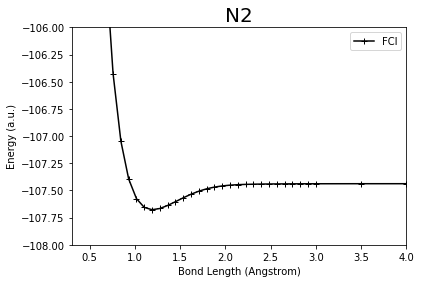

In [5]:
import matplotlib.pyplot as plt

plt.title("N2", fontsize=20)
plt.xlabel("Bond Length (Angstrom)")
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_FCI, 'k+-', label = 'FCI')
plt.legend()
plt.ylim(-108,-106)
plt.xlim(0.3,4.0)
plt.show()

##  RHF 、 CCSD、MP2

In [6]:
dm0 = dm0r1.copy()
t1 = t1r1.copy()
t2 = t2r1.copy()
for i,R in enumerate(distance):
    mol.atom = [['N',(0.0, 0.0, 0.0)],['N',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()
    print('R=',R)
    
    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel(dm0 = dm0)
    dm0 = molRHF.make_rdm1()
    
    molMP2 = mp.MP2(molRHF)
    energy_MP2[i] = molMP2.kernel()[0] + energy_RHF[i]

    molCCSD = cc.CCSD(molRHF)
    molCCSD.conv_tol = 1e-6
    molCCSD.max_cycle = 1000
    molCCSD.diis_space = 20
    e,t1,t2 = molCCSD.kernel(t1,t2)
    energy_CCSD[i] = e + energy_RHF[i]
    print("R=",R)
    assert molCCSD.converged == True


R= 0.5


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpt46ji64m
max_memory 4000 MB (current use 376 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -227.410860136109  E_coul = 73.06611012373672
init E= -102.485383342212
cond(S) = 464.85030817446034
    CPU time for initialize scf      6.71 sec, wall time      0.10 sec
  HOMO = -0.387355368219428  LUMO = 0.693865917839901
  mo_energy =
[-17.36823831 -16.52883209  -1.74705792  -1.416616    -1.416616
  -0.63096036  -0.38735537   0.69386592   0.69386592   5.63126987]
E1 = -226.93317202187987  E_coul = 74.5009166649412
cycle= 1 E= -100.572888686779  delta_E= 1.91  |g|= 0.0838  |ddm|= 2.58
    CPU time for cycle= 1      2.11 s

conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 378 MB)
E1 = -219.78813417432232  E_coul = 72.02168044639244
    CPU time for CCSD integral transformation      2.07 sec, wall time      0.03 sec
Init E_corr(CCSD) = -0.0137257521892038
cycle = 1  E_corr(CCSD) = -0.0452554285907833  dE = -0.0315296764  norm(t1,t2) = 0.0597199
    CPU time for CCSD iter      2.52 sec, wall time      0.04 sec
cycle = 2  E_corr(CCSD) = -0.0481680653892677  dE = -0.0029126368  norm(t1,t2) = 0.0115869
    CPU time for CCSD iter      4.29 sec, wall time      0.07 sec
cycle = 3  E_corr(CCSD) = -0.0485752059111122  dE = -0.000407140522  norm(t1,t2) = 0.00345506
    CPU time for CCSD iter      4.23 sec, wall time      0.07 sec
cycle = 4  E_corr(CCSD) = -0.0484909688227692  dE = 8.42370883e-05  norm(t1,t2) = 0.000393791
    CPU time for CCSD iter      4.26 sec, wall time      0.07 sec
cycle = 5  E_corr(CCSD) = -0.04849151804

  HOMO = -0.635277807440988  LUMO = 0.486808438426388
  mo_energy =
[-15.80968514 -15.75881027  -1.76588758  -0.88034662  -0.88034662
  -0.69223095  -0.63527781   0.48680844   0.48680844   2.4504084 ]
E1 = -208.20998004314174  E_coul = 67.68240503598125
cycle= 5 E= -106.347537883646  delta_E= -2.84e-14  |g|= 4.92e-13  |ddm|= 2.73e-07
    CPU time for cycle= 5      1.99 sec, wall time      0.03 sec
  HOMO = -0.635277807439752  LUMO = 0.486808438427489
  mo_energy =
[-15.80968514 -15.75881027  -1.76588758  -0.88034662  -0.88034662
  -0.69223095  -0.63527781   0.48680844   0.48680844   2.4504084 ]
E1 = -208.2099800431418  E_coul = 67.68240503598129
Extra cycle  E= -106.347537883646  delta_E= -2.84e-14  |g|= 6.23e-14  |ddm|= 1.36e-12
    CPU time for scf_cycle     14.82 sec, wall time      0.21 sec
    CPU time for SCF     14.89 sec, wall time      0.22 sec
converged SCF energy = -106.347537883646

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 7, nmo = 10
max_memory 4000 MB (current 

max_memory 4000 MB (current use 378 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -199.11752740264828  E_coul = 63.931245070485964
init E= -107.335881713002
cond(S) = 26.059996071128545
    CPU time for initialize scf      3.95 sec, wall time      0.06 sec
  HOMO = -0.621496258887409  LUMO = 0.355540079384057
  mo_energy =
[-15.60920423 -15.6035113   -1.6357772   -0.72479965  -0.70119223
  -0.70119223  -0.62149626   0.35554008   0.35554008   1.59143395]
E1 = -199.25828019438325  E_coul = 64.12610433956358
cycle= 1 E= -107.28177523566  delta_E= 0.0541  |g|= 0.0151  |ddm|= 0.228
    CPU time for cycle= 1      0.59 sec, wall time      0.01 sec
  HOMO = -0.584184180689149  LUMO = 0.368277046493172
  mo_energy =
[-15.60204324 -15.59271621  -1.61159958  -0.70505611  -0.70505611
  -0.70239987  -0.58418418   0.36827705   0.36827705   1.61440859]
E1 = -199.2613559857936  E_coul = 64.12913385819992
cycle= 2 E= -107.281821508434  delta_E= -4.63e-05  |g|= 0.00252  |ddm|= 0.035
    CPU time f

max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 378 MB)
E1 = -195.54915248391094  E_coul = 62.61749710565846
    CPU time for CCSD integral transformation      3.90 sec, wall time      0.06 sec
Init E_corr(CCSD) = -0.031436446631814
cycle = 1  E_corr(CCSD) = -0.133105333992709  dE = -0.101668887  norm(t1,t2) = 0.160895
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
cycle = 2  E_corr(CCSD) = -0.129699476629431  dE = 0.00340585736  norm(t1,t2) = 0.039806
    CPU time for CCSD iter      4.10 sec, wall time      0.06 sec
cycle = 3  E_corr(CCSD) = -0.131193868642294  dE = -0.00149439201  norm(t1,t2) = 0.0176493
    CPU time for CCSD iter      4.19 sec, wall time      0.07 sec
cycle = 4  E_corr(CCSD) = -0.131305587421153  dE = -0.000111718779  norm(t1,t2) = 0.00323918
    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 5  E_corr(CCSD

E1 = -189.3376821322944  E_coul = 60.050416504833315
cycle= 2 E= -107.49129992551  delta_E= -7.7e-06  |g|= 0.00111  |ddm|= 0.0098
    CPU time for cycle= 2      0.64 sec, wall time      0.01 sec
  HOMO = -0.513524909342024  LUMO = 0.242594482468668
  mo_energy =
[-15.49083146 -15.49007348  -1.35834683  -0.73552205  -0.51624076
  -0.51352491  -0.51352491   0.24259448   0.24259448   0.92728844]
E1 = -189.33846929971622  E_coul = 60.051203205619544
cycle= 3 E= -107.491300392145  delta_E= -4.67e-07  |g|= 2.93e-05  |ddm|= 0.00301
    CPU time for cycle= 3      0.54 sec, wall time      0.01 sec
  HOMO = -0.513518638257749  LUMO = 0.242597173528999
  mo_energy =
[-15.49082372 -15.49006591  -1.35833718  -0.73552365  -0.51623319
  -0.51351864  -0.51351864   0.24259717   0.24259717   0.92729346]
E1 = -189.33849020126817  E_coul = 60.0512241068479
cycle= 4 E= -107.491300392469  delta_E= -3.24e-10  |g|= 6.9e-09  |ddm|= 8.1e-05
    CPU time for cycle= 4      0.45 sec, wall time      0.01 sec
  HOMO

    CPU time for CCSD iter      0.95 sec, wall time      0.03 sec
cycle = 3  E_corr(CCSD) = -0.207198186610336  dE = -0.0017211802  norm(t1,t2) = 0.00669841
    CPU time for CCSD iter      4.41 sec, wall time      0.07 sec
cycle = 4  E_corr(CCSD) = -0.208002476987768  dE = -0.000804290377  norm(t1,t2) = 0.00384248
    CPU time for CCSD iter      2.90 sec, wall time      0.05 sec
cycle = 5  E_corr(CCSD) = -0.208579019875074  dE = -0.000576542887  norm(t1,t2) = 0.00130435
    CPU time for CCSD iter      1.83 sec, wall time      0.04 sec
cycle = 6  E_corr(CCSD) = -0.208602022571934  dE = -2.30026969e-05  norm(t1,t2) = 0.000186869
    CPU time for CCSD iter      2.10 sec, wall time      0.04 sec
cycle = 7  E_corr(CCSD) = -0.208613433743392  dE = -1.14111715e-05  norm(t1,t2) = 2.19397e-05
    CPU time for CCSD iter      4.58 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.208610359674266  dE = 3.07406913e-06  norm(t1,t2) = 5.49107e-06
    CPU time for CCSD iter      4.15 sec, wall

E1 = -182.3477833674685  E_coul = 57.12672104600797
cycle= 3 E= -107.317233352001  delta_E= -1.51e-08  |g|= 3.86e-05  |ddm|= 0.000338
    CPU time for cycle= 3      0.45 sec, wall time      0.01 sec
  HOMO = -0.385360400964156  LUMO = 0.162058110951557
  mo_energy =
[-15.44040025 -15.44013147  -1.17111984  -0.77258869  -0.45222923
  -0.3853604   -0.3853604    0.16205811   0.16205811   0.56049864]
E1 = -182.3477440945858  E_coul = 57.12668177240662
cycle= 4 E= -107.317233352719  delta_E= -7.19e-10  |g|= 4.54e-10  |ddm|= 9.65e-05
    CPU time for cycle= 4      0.52 sec, wall time      0.01 sec
  HOMO = -0.385360400910143  LUMO = 0.162058111009374
  mo_energy =
[-15.44040025 -15.44013147  -1.17111984  -0.77258869  -0.45222923
  -0.3853604   -0.3853604    0.16205811   0.16205811   0.56049864]
E1 = -182.34774409453777  E_coul = 57.12668177235866
Extra cycle  E= -107.317233352719  delta_E= 8.53e-14  |g|= 1.73e-10  |ddm|= 2.34e-10
    CPU time for scf_cycle      6.16 sec, wall time      0.09 

cycle = 3  E_corr(CCSD) = -0.300682367576162  dE = -0.0659810983  norm(t1,t2) = 0.130288
    CPU time for CCSD iter      4.31 sec, wall time      0.07 sec
cycle = 4  E_corr(CCSD) = -0.29604469212354  dE = 0.00463767545  norm(t1,t2) = 0.0542693
    CPU time for CCSD iter      4.28 sec, wall time      0.07 sec
cycle = 5  E_corr(CCSD) = -0.303955763540251  dE = -0.00791107142  norm(t1,t2) = 0.0254937
    CPU time for CCSD iter      2.68 sec, wall time      0.05 sec
cycle = 6  E_corr(CCSD) = -0.308281139121769  dE = -0.00432537558  norm(t1,t2) = 0.0120839
    CPU time for CCSD iter      2.74 sec, wall time      0.05 sec
cycle = 7  E_corr(CCSD) = -0.309564609544142  dE = -0.00128347042  norm(t1,t2) = 0.00381819
    CPU time for CCSD iter      4.45 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.310514418761859  dE = -0.000949809218  norm(t1,t2) = 0.00281585
    CPU time for CCSD iter      4.46 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.31127001859059  dE = -0.000755

initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpsbfsfu99
max_memory 4000 MB (current use 378 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -176.5470410692658  E_coul = 54.31290035168004
init E= -107.043013107135
cond(S) = 2.6464370533972454
    CPU time for initialize scf      6.52 sec, wall time      0.09 sec
  HOMO = -0.340768252283618  LUMO = 0.0662828190790136
  mo_energy =
[-15.46649521 -15.46594881  -1.08829549  -0.85207038  -0.4321826
  -0.34076825  -0.34076825   0.06628282   0.06628282   0.30333818]
E1 = -177.26558994187096  E_coul = 54.98124159395178
cycle= 1 E= -107.093220737468  delta_E= -0.0502  |g|= 0.00478  |ddm|= 0.103
    CPU time for cycle= 1      0.52 sec, wall time      0.01 sec
  HOMO = -0.300045296096224  L

    CPU time for cycle= 3      0.45 sec, wall time      0.01 sec
  HOMO = -0.278865443506391  LUMO = 0.0988562238449306
  mo_energy =
[-15.39591261 -15.39556387  -1.02204818  -0.81178097  -0.36628306
  -0.27886544  -0.27886544   0.09885622   0.09885622   0.30776901]
E1 = -175.86851741549998  E_coul = 54.384939120319984
cycle= 4 E= -107.022793358308  delta_E= -8.35e-09  |g|= 6.9e-06  |ddm|= 0.000272
    CPU time for cycle= 4      1.64 sec, wall time      0.02 sec
  HOMO = -0.278865444312738  LUMO = 0.0988562232491735
  mo_energy =
[-15.39591261 -15.39556388  -1.02204818  -0.81178097  -0.36628306
  -0.27886544  -0.27886544   0.09885622   0.09885622   0.30776901]
E1 = -175.86851741169582  E_coul = 54.38493911650462
cycle= 5 E= -107.02279335832  delta_E= -1.12e-11  |g|= 1.44e-09  |ddm|= 4.86e-06
    CPU time for cycle= 5      0.65 sec, wall time      0.01 sec
  HOMO = -0.278865443968097  LUMO = 0.0988562235863438
  mo_energy =
[-15.39591261 -15.39556388  -1.02204818  -0.81178097  -0.366283


******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 7, nmo = 10
max_memory 4000 MB (current use 378 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.26 sec, wall time      0.00 sec
E(MP2) = -107.70616681769  E_corr = -0.74969722838196

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 7, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 378 MB)
E1 = -174.59399802908024  E_coul = 53.84008226147265
    CPU time for CCSD integral transformation     14.57 sec, wall time      0.21 sec
Init E_corr(CCSD) = -0.419212700404275
cycle = 1  E_corr(CCSD) = -0.645742249470192  dE = -0.226529549  norm(t1,t2) = 0.427717
    CPU time for CCSD iter      1.71 sec, wall time      0.04 sec
cycle = 2  E_corr(CCSD) = -0.312732095032576  dE = 0.333010154  norm(t1,t2) = 0.372906
    CPU time for CCSD iter      4.30 sec, wall time      0.07 

    CPU time for CCSD iter      4.45 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.651595160685365  dE = -0.00095998982  norm(t1,t2) = 0.00124876
    CPU time for CCSD iter      4.43 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.651546525222756  dE = 4.86354626e-05  norm(t1,t2) = 0.00151513
    CPU time for CCSD iter      4.44 sec, wall time      0.07 sec
cycle = 10  E_corr(CCSD) = -0.651297646694253  dE = 0.000248878529  norm(t1,t2) = 0.000329706
    CPU time for CCSD iter      4.39 sec, wall time      0.07 sec
cycle = 11  E_corr(CCSD) = -0.651281965064521  dE = 1.56816297e-05  norm(t1,t2) = 4.45833e-05
    CPU time for CCSD iter      4.39 sec, wall time      0.07 sec
cycle = 12  E_corr(CCSD) = -0.651290098325875  dE = -8.13326135e-06  norm(t1,t2) = 1.31799e-05
    CPU time for CCSD iter      4.35 sec, wall time      0.07 sec
cycle = 13  E_corr(CCSD) = -0.651284715752846  dE = 5.38257303e-06  norm(t1,t2) = 3.91856e-06
    CPU time for CCSD iter      4.46 sec, w

    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 20  E_corr(CCSD) = -0.734021396383529  dE = 7.21964594e-06  norm(t1,t2) = 6.29361e-06
    CPU time for CCSD iter      4.65 sec, wall time      0.07 sec
cycle = 21  E_corr(CCSD) = -0.734019394538643  dE = 2.00184489e-06  norm(t1,t2) = 3.77848e-06
    CPU time for CCSD iter      4.68 sec, wall time      0.08 sec
cycle = 22  E_corr(CCSD) = -0.73402006047515  dE = -6.65936507e-07  norm(t1,t2) = 2.06237e-06
    CPU time for CCSD iter      4.52 sec, wall time      0.07 sec
    CPU time for CCSD     89.65 sec, wall time      1.44 sec
CCSD converged
E(CCSD) = -107.5720619843044  E_corr = -0.7340200604751499
R= 2.0517241379310347
R= 2.137931034482759


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf =

Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -0.806607668905968  dE = -1.89680313e-07  norm(t1,t2) = 9.01879e-07
    CPU time for CCSD iter      4.41 sec, wall time      0.07 sec
    CPU time for CCSD     92.49 sec, wall time      1.51 sec
CCSD converged
E(CCSD) = -107.5928071019592  E_corr = -0.806607668905968
R= 2.137931034482759
R= 2.224137931034483


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp445dpgeh
max_memory 4000 MB (current use 378 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -170.08741412833604  E_coul = 51.70867712087933
init E= -106.720429771529
cond(S) = 1.768595268351117
    CPU time for initialize scf      6.16 sec, wall 

    CPU time for CCSD iter      4.89 sec, wall time      0.08 sec
cycle = 25  E_corr(CCSD) = -0.978307441234639  dE = 0.0270880085  norm(t1,t2) = 1.15224
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
cycle = 26  E_corr(CCSD) = -1.01627111557397  dE = -0.0379636743  norm(t1,t2) = 1.08443
    CPU time for CCSD iter      4.51 sec, wall time      0.07 sec
cycle = 27  E_corr(CCSD) = -1.01952558272563  dE = -0.00325446715  norm(t1,t2) = 1.26895
    CPU time for CCSD iter      4.55 sec, wall time      0.07 sec
cycle = 28  E_corr(CCSD) = -0.984585875210291  dE = 0.0349397075  norm(t1,t2) = 1.40247
    CPU time for CCSD iter      4.46 sec, wall time      0.07 sec
cycle = 29  E_corr(CCSD) = -1.00684154905666  dE = -0.0222556738  norm(t1,t2) = 1.20801
    CPU time for CCSD iter      4.89 sec, wall time      0.08 sec
cycle = 30  E_corr(CCSD) = -0.853529250358408  dE = 0.153312299  norm(t1,t2) = 1.2937
    CPU time for CCSD iter      4.26 sec, wall time      0.07 sec
cycle = 31 

    CPU time for CCSD iter      4.20 sec, wall time      0.07 sec
cycle = 78  E_corr(CCSD) = -0.869096481529812  dE = -0.000717803094  norm(t1,t2) = 0.00490438
    CPU time for CCSD iter      4.53 sec, wall time      0.07 sec
cycle = 79  E_corr(CCSD) = -0.869576425627584  dE = -0.000479944098  norm(t1,t2) = 0.00385002
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 80  E_corr(CCSD) = -0.869047151879029  dE = 0.000529273749  norm(t1,t2) = 0.000709972
    CPU time for CCSD iter      4.87 sec, wall time      0.08 sec
cycle = 81  E_corr(CCSD) = -0.869144896478254  dE = -9.77445992e-05  norm(t1,t2) = 0.000246544
    CPU time for CCSD iter      4.29 sec, wall time      0.07 sec
cycle = 82  E_corr(CCSD) = -0.869221068651755  dE = -7.61721735e-05  norm(t1,t2) = 0.000111344
    CPU time for CCSD iter      4.62 sec, wall time      0.07 sec
cycle = 83  E_corr(CCSD) = -0.869199666850722  dE = 2.1401801e-05  norm(t1,t2) = 6.02299e-05
    CPU time for CCSD iter      4.83 se

cycle = 23  E_corr(CCSD) = -0.923094970253391  dE = -7.13406872e-06  norm(t1,t2) = 2.70551e-05
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 24  E_corr(CCSD) = -0.923096455531821  dE = -1.48527843e-06  norm(t1,t2) = 5.98502e-06
    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 25  E_corr(CCSD) = -0.923096564608826  dE = -1.09077006e-07  norm(t1,t2) = 6.89224e-07
    CPU time for CCSD iter      4.88 sec, wall time      0.08 sec
    CPU time for CCSD    104.23 sec, wall time      1.68 sec
CCSD converged
E(CCSD) = -107.619603735132  E_corr = -0.9230965646088265
R= 2.3103448275862073
R= 2.396551724137931


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_

cycle = 25  E_corr(CCSD) = 0.147226388299313  dE = 0.0950800722  norm(t1,t2) = 11.7287
    CPU time for CCSD iter      4.85 sec, wall time      0.08 sec
cycle = 26  E_corr(CCSD) = -0.066977672350663  dE = -0.214204061  norm(t1,t2) = 17.6725
    CPU time for CCSD iter      4.62 sec, wall time      0.07 sec
cycle = 27  E_corr(CCSD) = -0.205091756185539  dE = -0.138114084  norm(t1,t2) = 6.23587
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
cycle = 28  E_corr(CCSD) = -0.292004083660538  dE = -0.0869123275  norm(t1,t2) = 3.13092
    CPU time for CCSD iter      4.55 sec, wall time      0.07 sec
cycle = 29  E_corr(CCSD) = -0.282817530498313  dE = 0.00918655316  norm(t1,t2) = 1.65593
    CPU time for CCSD iter      4.90 sec, wall time      0.08 sec
cycle = 30  E_corr(CCSD) = -0.344963524303046  dE = -0.0621459938  norm(t1,t2) = 1.59757
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 31  E_corr(CCSD) = -0.283505846007797  dE = 0.0614576783  norm(t1,

cycle = 78  E_corr(CCSD) = -0.493950638235169  dE = 0.0571844858  norm(t1,t2) = 0.929831
    CPU time for CCSD iter      4.28 sec, wall time      0.07 sec
cycle = 79  E_corr(CCSD) = -0.398605866080192  dE = 0.0953447722  norm(t1,t2) = 0.487478
    CPU time for CCSD iter      4.85 sec, wall time      0.08 sec
cycle = 80  E_corr(CCSD) = -0.396082983073701  dE = 0.00252288301  norm(t1,t2) = 0.438329
    CPU time for CCSD iter      4.28 sec, wall time      0.07 sec
cycle = 81  E_corr(CCSD) = -0.326932231628314  dE = 0.0691507514  norm(t1,t2) = 0.430299
    CPU time for CCSD iter      4.64 sec, wall time      0.08 sec
cycle = 82  E_corr(CCSD) = -0.243264425678734  dE = 0.0836678059  norm(t1,t2) = 0.459571
    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 83  E_corr(CCSD) = -0.27118608959465  dE = -0.0279216639  norm(t1,t2) = 0.666929
    CPU time for CCSD iter      4.66 sec, wall time      0.07 sec
cycle = 84  E_corr(CCSD) = -0.293260901195661  dE = -0.0220748116  no

cycle = 131  E_corr(CCSD) = -0.196221978681857  dE = 0.0414558376  norm(t1,t2) = 1.29874
    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
cycle = 132  E_corr(CCSD) = -0.222195745495921  dE = -0.0259737668  norm(t1,t2) = 1.64323
    CPU time for CCSD iter      4.63 sec, wall time      0.07 sec
cycle = 133  E_corr(CCSD) = -0.170351400716372  dE = 0.0518443448  norm(t1,t2) = 0.769983
    CPU time for CCSD iter      4.52 sec, wall time      0.07 sec
cycle = 134  E_corr(CCSD) = -0.218594511111161  dE = -0.0482431104  norm(t1,t2) = 1.074
    CPU time for CCSD iter      4.64 sec, wall time      0.08 sec
cycle = 135  E_corr(CCSD) = -0.220172970472404  dE = -0.00157845936  norm(t1,t2) = 0.81266
    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 136  E_corr(CCSD) = -0.18601155807889  dE = 0.0341614124  norm(t1,t2) = 0.772314
    CPU time for CCSD iter      4.86 sec, wall time      0.08 sec
cycle = 137  E_corr(CCSD) = -0.198000565984713  dE = -0.0119890079 

    CPU time for CCSD iter      4.34 sec, wall time      0.07 sec
cycle = 184  E_corr(CCSD) = -0.3361124233206  dE = 0.0537200273  norm(t1,t2) = 0.554827
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 185  E_corr(CCSD) = -0.370935650430928  dE = -0.0348232271  norm(t1,t2) = 1.07546
    CPU time for CCSD iter      4.59 sec, wall time      0.07 sec
cycle = 186  E_corr(CCSD) = -0.339557877551154  dE = 0.0313777729  norm(t1,t2) = 0.559525
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 187  E_corr(CCSD) = -0.393692112095685  dE = -0.0541342345  norm(t1,t2) = 1.37075
    CPU time for CCSD iter      4.49 sec, wall time      0.07 sec
cycle = 188  E_corr(CCSD) = -0.394584931719111  dE = -0.000892819623  norm(t1,t2) = 0.40525
    CPU time for CCSD iter      4.47 sec, wall time      0.07 sec
cycle = 189  E_corr(CCSD) = -0.371194684355624  dE = 0.0233902474  norm(t1,t2) = 0.414756
    CPU time for CCSD iter      4.81 sec, wall time      0.08 se

    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 237  E_corr(CCSD) = -0.241613439797408  dE = 0.0166030987  norm(t1,t2) = 0.676334
    CPU time for CCSD iter      4.54 sec, wall time      0.07 sec
cycle = 238  E_corr(CCSD) = -0.383896576491136  dE = -0.142283137  norm(t1,t2) = 0.71169
    CPU time for CCSD iter      4.53 sec, wall time      0.07 sec
cycle = 239  E_corr(CCSD) = -0.338780385543731  dE = 0.0451161909  norm(t1,t2) = 0.414991
    CPU time for CCSD iter      4.65 sec, wall time      0.07 sec
cycle = 240  E_corr(CCSD) = -0.435237023371209  dE = -0.0964566378  norm(t1,t2) = 0.508509
    CPU time for CCSD iter      4.95 sec, wall time      0.08 sec
cycle = 241  E_corr(CCSD) = -0.495691390879541  dE = -0.0604543675  norm(t1,t2) = 0.391773
    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 242  E_corr(CCSD) = -0.462638568171683  dE = 0.0330528227  norm(t1,t2) = 0.306012
    CPU time for CCSD iter      4.55 sec, wall time      0.07 s

    CPU time for CCSD iter      4.95 sec, wall time      0.08 sec
cycle = 290  E_corr(CCSD) = -0.405704655924035  dE = -0.0301547276  norm(t1,t2) = 0.647252
    CPU time for CCSD iter      4.30 sec, wall time      0.07 sec
cycle = 291  E_corr(CCSD) = -0.417241684766691  dE = -0.0115370288  norm(t1,t2) = 0.513219
    CPU time for CCSD iter      4.62 sec, wall time      0.07 sec
cycle = 292  E_corr(CCSD) = -0.475101743144258  dE = -0.0578600584  norm(t1,t2) = 0.423091
    CPU time for CCSD iter      4.63 sec, wall time      0.07 sec
cycle = 293  E_corr(CCSD) = -0.537537714681656  dE = -0.0624359715  norm(t1,t2) = 0.271477
    CPU time for CCSD iter      4.91 sec, wall time      0.08 sec
cycle = 294  E_corr(CCSD) = -0.523518014570899  dE = 0.0140197001  norm(t1,t2) = 0.463377
    CPU time for CCSD iter      4.30 sec, wall time      0.07 sec
cycle = 295  E_corr(CCSD) = -0.490645937047873  dE = 0.0328720775  norm(t1,t2) = 0.522809
    CPU time for CCSD iter      4.59 sec, wall time      0.0

cycle = 342  E_corr(CCSD) = -0.455574834661169  dE = 0.0370701267  norm(t1,t2) = 0.260044
    CPU time for CCSD iter      4.64 sec, wall time      0.08 sec
cycle = 343  E_corr(CCSD) = -0.45546503172302  dE = 0.000109802938  norm(t1,t2) = 0.328918
    CPU time for CCSD iter      4.63 sec, wall time      0.07 sec
cycle = 344  E_corr(CCSD) = -0.430200585761891  dE = 0.025264446  norm(t1,t2) = 0.329244
    CPU time for CCSD iter      4.94 sec, wall time      0.08 sec
cycle = 345  E_corr(CCSD) = -0.432145543454366  dE = -0.00194495769  norm(t1,t2) = 0.408892
    CPU time for CCSD iter      4.40 sec, wall time      0.07 sec
cycle = 346  E_corr(CCSD) = -0.43354822826858  dE = -0.00140268481  norm(t1,t2) = 0.407202
    CPU time for CCSD iter      4.55 sec, wall time      0.07 sec
cycle = 347  E_corr(CCSD) = -0.434610108747114  dE = -0.00106188048  norm(t1,t2) = 0.424013
    CPU time for CCSD iter      4.58 sec, wall time      0.07 sec
cycle = 348  E_corr(CCSD) = -0.4001570242117  dE = 0.034453

    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 395  E_corr(CCSD) = -0.507106423403445  dE = 0.00336862327  norm(t1,t2) = 0.433179
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 396  E_corr(CCSD) = -0.502777493156547  dE = 0.00432893025  norm(t1,t2) = 0.433495
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 397  E_corr(CCSD) = -0.477685123647987  dE = 0.0250923695  norm(t1,t2) = 0.439833
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 398  E_corr(CCSD) = -0.511114836400401  dE = -0.0334297128  norm(t1,t2) = 0.472355
    CPU time for CCSD iter      4.55 sec, wall time      0.07 sec
cycle = 399  E_corr(CCSD) = -0.528875921414284  dE = -0.017761085  norm(t1,t2) = 0.437688
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 400  E_corr(CCSD) = -0.453882732727593  dE = 0.0749931887  norm(t1,t2) = 0.441243
    CPU time for CCSD iter      4.63 sec, wall time      0.07

cycle = 447  E_corr(CCSD) = -0.483142451862632  dE = 0.0491914724  norm(t1,t2) = 0.646157
    CPU time for CCSD iter      4.58 sec, wall time      0.07 sec
cycle = 448  E_corr(CCSD) = -0.468305676866491  dE = 0.014836775  norm(t1,t2) = 0.364906
    CPU time for CCSD iter      4.86 sec, wall time      0.08 sec
cycle = 449  E_corr(CCSD) = -0.446189861045546  dE = 0.0221158158  norm(t1,t2) = 0.350955
    CPU time for CCSD iter      4.29 sec, wall time      0.07 sec
cycle = 450  E_corr(CCSD) = -0.441790854589324  dE = 0.00439900646  norm(t1,t2) = 0.352569
    CPU time for CCSD iter      4.89 sec, wall time      0.08 sec
cycle = 451  E_corr(CCSD) = -0.443324648693635  dE = -0.0015337941  norm(t1,t2) = 0.377178
    CPU time for CCSD iter      4.34 sec, wall time      0.07 sec
cycle = 452  E_corr(CCSD) = -0.462175172920214  dE = -0.0188505242  norm(t1,t2) = 0.379402
    CPU time for CCSD iter      4.91 sec, wall time      0.08 sec
cycle = 453  E_corr(CCSD) = -0.463315275916659  dE = -0.001140

    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 500  E_corr(CCSD) = -0.593107636066734  dE = 0.0108883877  norm(t1,t2) = 0.790804
    CPU time for CCSD iter      4.59 sec, wall time      0.07 sec
cycle = 501  E_corr(CCSD) = -0.594477423382672  dE = -0.00136978732  norm(t1,t2) = 0.742318
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 502  E_corr(CCSD) = -0.590949228716572  dE = 0.00352819467  norm(t1,t2) = 0.768951
    CPU time for CCSD iter      4.81 sec, wall time      0.08 sec
cycle = 503  E_corr(CCSD) = -0.538255219166938  dE = 0.0526940095  norm(t1,t2) = 0.710045
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 504  E_corr(CCSD) = -0.524835726801926  dE = 0.0134194924  norm(t1,t2) = 0.474945
    CPU time for CCSD iter      4.35 sec, wall time      0.07 sec
cycle = 505  E_corr(CCSD) = -0.537667979174881  dE = -0.0128322524  norm(t1,t2) = 0.453769
    CPU time for CCSD iter      4.89 sec, wall time      0.0

cycle = 552  E_corr(CCSD) = -0.319767743134547  dE = 0.0203695082  norm(t1,t2) = 0.45783
    CPU time for CCSD iter      4.31 sec, wall time      0.07 sec
cycle = 553  E_corr(CCSD) = -0.314373550584286  dE = 0.00539419255  norm(t1,t2) = 0.533014
    CPU time for CCSD iter      4.88 sec, wall time      0.08 sec
cycle = 554  E_corr(CCSD) = -0.296296146526976  dE = 0.0180774041  norm(t1,t2) = 0.555268
    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 555  E_corr(CCSD) = -0.311596927296701  dE = -0.0153007808  norm(t1,t2) = 0.599205
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
cycle = 556  E_corr(CCSD) = -0.303486530782943  dE = 0.00811039651  norm(t1,t2) = 0.55875
    CPU time for CCSD iter      4.62 sec, wall time      0.07 sec
cycle = 557  E_corr(CCSD) = -0.305875492963257  dE = -0.00238896218  norm(t1,t2) = 0.60945
    CPU time for CCSD iter      4.81 sec, wall time      0.07 sec
cycle = 558  E_corr(CCSD) = -0.39419158908668  dE = -0.0883160

    CPU time for CCSD iter      4.60 sec, wall time      0.07 sec
cycle = 605  E_corr(CCSD) = -0.37009186771418  dE = -0.00103433613  norm(t1,t2) = 0.407836
    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
cycle = 606  E_corr(CCSD) = -0.369061324173243  dE = 0.00103054354  norm(t1,t2) = 0.400142
    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 607  E_corr(CCSD) = -0.376548269829163  dE = -0.00748694566  norm(t1,t2) = 0.427343
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 608  E_corr(CCSD) = -0.385002861240117  dE = -0.00845459141  norm(t1,t2) = 0.457644
    CPU time for CCSD iter      4.79 sec, wall time      0.08 sec
cycle = 609  E_corr(CCSD) = -0.383204600726684  dE = 0.00179826051  norm(t1,t2) = 0.413475
    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 610  E_corr(CCSD) = -0.388316417214181  dE = -0.00511181649  norm(t1,t2) = 0.393245
    CPU time for CCSD iter      4.55 sec, wall time    

cycle = 657  E_corr(CCSD) = -0.407983481236881  dE = 0.00314707171  norm(t1,t2) = 0.366068
    CPU time for CCSD iter      4.66 sec, wall time      0.08 sec
cycle = 658  E_corr(CCSD) = -0.407035321509916  dE = 0.000948159727  norm(t1,t2) = 0.361558
    CPU time for CCSD iter      4.63 sec, wall time      0.07 sec
cycle = 659  E_corr(CCSD) = -0.406325665199087  dE = 0.000709656311  norm(t1,t2) = 0.393268
    CPU time for CCSD iter      4.59 sec, wall time      0.07 sec
cycle = 660  E_corr(CCSD) = -0.423545199547113  dE = -0.0172195343  norm(t1,t2) = 0.385087
    CPU time for CCSD iter      4.92 sec, wall time      0.08 sec
cycle = 661  E_corr(CCSD) = -0.42719494156281  dE = -0.00364974202  norm(t1,t2) = 0.345663
    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 662  E_corr(CCSD) = -0.422292476495725  dE = 0.00490246507  norm(t1,t2) = 0.362402
    CPU time for CCSD iter      4.88 sec, wall time      0.08 sec
cycle = 663  E_corr(CCSD) = -0.392953306214319  dE = 0.0

    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
cycle = 710  E_corr(CCSD) = -0.413040338269374  dE = 0.00355477981  norm(t1,t2) = 0.518843
    CPU time for CCSD iter      4.88 sec, wall time      0.08 sec
cycle = 711  E_corr(CCSD) = -0.450373288228518  dE = -0.03733295  norm(t1,t2) = 0.514189
    CPU time for CCSD iter      4.59 sec, wall time      0.07 sec
cycle = 712  E_corr(CCSD) = -0.45741605194547  dE = -0.00704276372  norm(t1,t2) = 0.50309
    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 713  E_corr(CCSD) = -0.431729994377556  dE = 0.0256860576  norm(t1,t2) = 0.463553
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 714  E_corr(CCSD) = -0.414490772760773  dE = 0.0172392216  norm(t1,t2) = 0.563362
    CPU time for CCSD iter      4.50 sec, wall time      0.07 sec
cycle = 715  E_corr(CCSD) = -0.430938251827129  dE = -0.0164474791  norm(t1,t2) = 0.512637
    CPU time for CCSD iter      4.63 sec, wall time      0.07 s

cycle = 762  E_corr(CCSD) = -0.398239877040575  dE = 0.00149807389  norm(t1,t2) = 0.180297
    CPU time for CCSD iter      4.23 sec, wall time      0.07 sec
cycle = 763  E_corr(CCSD) = -0.398317735027234  dE = -7.78579867e-05  norm(t1,t2) = 0.165227
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 764  E_corr(CCSD) = -0.390741796914676  dE = 0.00757593811  norm(t1,t2) = 0.175563
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 765  E_corr(CCSD) = -0.396773581567349  dE = -0.00603178465  norm(t1,t2) = 0.18016
    CPU time for CCSD iter      4.81 sec, wall time      0.08 sec
cycle = 766  E_corr(CCSD) = -0.392111169931693  dE = 0.00466241164  norm(t1,t2) = 0.162128
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 767  E_corr(CCSD) = -0.389889468316835  dE = 0.00222170161  norm(t1,t2) = 0.167514
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 768  E_corr(CCSD) = -0.390252362861673  dE = -0.

    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 815  E_corr(CCSD) = -0.412498793371186  dE = -0.00584848801  norm(t1,t2) = 0.147338
    CPU time for CCSD iter      4.53 sec, wall time      0.07 sec
cycle = 816  E_corr(CCSD) = -0.417673196180998  dE = -0.00517440281  norm(t1,t2) = 0.154552
    CPU time for CCSD iter      4.55 sec, wall time      0.07 sec
cycle = 817  E_corr(CCSD) = -0.415602707822859  dE = 0.00207048836  norm(t1,t2) = 0.153517
    CPU time for CCSD iter      4.94 sec, wall time      0.08 sec
cycle = 818  E_corr(CCSD) = -0.414854133152738  dE = 0.00074857467  norm(t1,t2) = 0.150465
    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
cycle = 819  E_corr(CCSD) = -0.411217204721478  dE = 0.00363692843  norm(t1,t2) = 0.155675
    CPU time for CCSD iter      4.28 sec, wall time      0.07 sec
cycle = 820  E_corr(CCSD) = -0.411101999708719  dE = 0.000115205013  norm(t1,t2) = 0.151884
    CPU time for CCSD iter      4.57 sec, wall time    

cycle = 867  E_corr(CCSD) = -0.38123408883405  dE = -0.00648916242  norm(t1,t2) = 0.15765
    CPU time for CCSD iter      4.56 sec, wall time      0.07 sec
cycle = 868  E_corr(CCSD) = -0.382584340955096  dE = -0.00135025212  norm(t1,t2) = 0.142329
    CPU time for CCSD iter      4.92 sec, wall time      0.08 sec
cycle = 869  E_corr(CCSD) = -0.388899008720672  dE = -0.00631466777  norm(t1,t2) = 0.157249
    CPU time for CCSD iter      4.32 sec, wall time      0.07 sec
cycle = 870  E_corr(CCSD) = -0.391552316332846  dE = -0.00265330761  norm(t1,t2) = 0.120003
    CPU time for CCSD iter      4.61 sec, wall time      0.07 sec
cycle = 871  E_corr(CCSD) = -0.386241592529433  dE = 0.0053107238  norm(t1,t2) = 0.105362
    CPU time for CCSD iter      4.69 sec, wall time      0.08 sec
cycle = 872  E_corr(CCSD) = -0.392586742238726  dE = -0.00634514971  norm(t1,t2) = 0.116571
    CPU time for CCSD iter      4.93 sec, wall time      0.08 sec
cycle = 873  E_corr(CCSD) = -0.401535632049179  dE = -0.

    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
cycle = 920  E_corr(CCSD) = -0.37704788053339  dE = -0.00231650341  norm(t1,t2) = 0.110885
    CPU time for CCSD iter      4.54 sec, wall time      0.07 sec
cycle = 921  E_corr(CCSD) = -0.376485080795565  dE = 0.000562799738  norm(t1,t2) = 0.0995039
    CPU time for CCSD iter      4.57 sec, wall time      0.07 sec
cycle = 922  E_corr(CCSD) = -0.37607953404667  dE = 0.000405546749  norm(t1,t2) = 0.106177
    CPU time for CCSD iter      4.87 sec, wall time      0.08 sec
cycle = 923  E_corr(CCSD) = -0.373308938170761  dE = 0.00277059588  norm(t1,t2) = 0.108858
    CPU time for CCSD iter      4.58 sec, wall time      0.07 sec
cycle = 924  E_corr(CCSD) = -0.372567883511174  dE = 0.00074105466  norm(t1,t2) = 0.110381
    CPU time for CCSD iter      4.28 sec, wall time      0.07 sec
cycle = 925  E_corr(CCSD) = -0.386836452608088  dE = -0.0142685691  norm(t1,t2) = 0.112874
    CPU time for CCSD iter      4.49 sec, wall time     

    CPU time for CCSD iter      4.55 sec, wall time      0.07 sec
cycle = 972  E_corr(CCSD) = -0.390202458386395  dE = 0.000689735636  norm(t1,t2) = 0.0981386
    CPU time for CCSD iter      4.62 sec, wall time      0.07 sec
cycle = 973  E_corr(CCSD) = -0.391911715765315  dE = -0.00170925738  norm(t1,t2) = 0.0949003
    CPU time for CCSD iter      4.62 sec, wall time      0.07 sec
cycle = 974  E_corr(CCSD) = -0.389528966990027  dE = 0.00238274878  norm(t1,t2) = 0.100336
    CPU time for CCSD iter      4.63 sec, wall time      0.07 sec
cycle = 975  E_corr(CCSD) = -0.389547248217888  dE = -1.82812279e-05  norm(t1,t2) = 0.100964
    CPU time for CCSD iter      4.88 sec, wall time      0.08 sec
cycle = 976  E_corr(CCSD) = -0.389315511080495  dE = 0.000231737137  norm(t1,t2) = 0.100827
    CPU time for CCSD iter      4.31 sec, wall time      0.07 sec
cycle = 977  E_corr(CCSD) = -0.388583344620077  dE = 0.00073216646  norm(t1,t2) = 0.0999118
    CPU time for CCSD iter      4.88 sec, wall tim

AssertionError: 

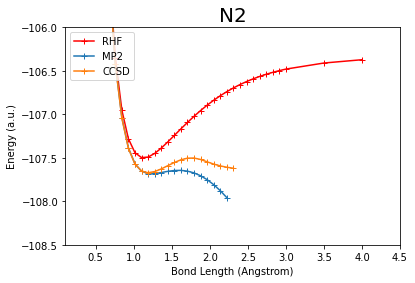

In [26]:
# list(np.linspace(0.5, 3.0, 30)) + [3.5, 4.0]
import matplotlib.pyplot as plt

plt.title("N2", fontsize=20)
plt.xlabel("Bond Length (Angstrom)")
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_RHF, 'r+-', label = 'RHF')
plt.plot(distance[:21], energy_MP2[:21], '+-', label = 'MP2')
plt.plot(distance[:22], energy_CCSD[:22],'+-', label = 'CCSD')
plt.legend(loc = 2)
plt.ylim(-108.5,-106)
plt.xlim(0.1,4.5)
plt.show()

## UHF

In [4]:
energy_UCCSDT = np.zeros(n)

for i,R in enumerate(distance):
    
    mol.atom = [['N',(0.0, 0.0, 0.0)],['N',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.verbose = 5
    mol.build()

    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel(dm0=dm0)
    dm0 = molRHF.make_rdm1() 
        
    print(mol.spheric_labels())
    nb = mol.nao_nr()
    print(nb)
    dm = np.zeros((2,nb,nb)) 
    # N1
    dm[:,0,0] = 1 # 1s^2
    dm[:,1,1] = 1 # 2s^2
    dm[0,2,2] = 1 # 2px alpha
    dm[0,3,3] = 1
    dm[0,4,4] = 1
    # N2
    dm[:,5,5] = 1 # 1s
    dm[:,6,6] = 1 # 2s
    dm[1,7,7] = 1 # 2px beta
    dm[1,8,8] = 1
    dm[1,9,9] = 1
    molUHF = scf.UHF(mol)
    energy_UHF[i] = molUHF.kernel(dm0 = dm)
    
    molUCCSD = cc.UCCSD(molUHF)
    energy_UCCSD[i] = molUCCSD.kernel()[0] + energy_UHF[i] 

    mycc = cc.UCCSD(molUHF).run()
    et = mycc.ccsd_t()
    energy_UCCSDT[i] = energy_UCCSD[i] + et




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpbo8nk848
max_memory 4000 MB (current use 349 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -260.28682449545306  E_coul = 97.4471770443065
init E= -110.980280780987
cond(S) = 464.85030817446034
    CPU time for initialize scf      2.69 sec, wall time      0.04 sec
  HOMO = 1.24142463521584  LUMO = 2.2712445552945
  mo_energy =
[-15.08288934 -14.1635753   -0.49752757  -0.0839951   -0.0839951
   1.01008      1.24142464   2.27124456   2.27124456   7.35526885]
E1 = -226.65510408618434  E_coul = 74.23695136258078
cycle= 1 E= -100.558786053444  delta_E= 10.4  |g|= 0.443  |ddm|= 3.21
    CPU time for cycle= 1      0.46 sec, wall 

  alpha mo_energy =
[-17.07524614 -16.37358759  -1.72085327  -1.23440284  -1.23440284
  -0.71414397  -0.62429069   0.73911853   0.73911853   5.71149202]
  beta  mo_energy =
[-17.07524614 -16.37358759  -1.72085327  -1.23440284  -1.23440284
  -0.71414397  -0.62429069   0.73911853   0.73911853   5.71149202]
multiplicity <S^2> = 7.1054274e-15  2S+1 = 1
E1 = -226.91107278114305  Ecoul = 74.47860906994704
Extra cycle  E= -100.573097041036  delta_E= -5.68e-14  |g|= 7.65e-08  |ddm|= 7.52e-07
    CPU time for scf_cycle     21.56 sec, wall time      0.32 sec
    CPU time for SCF     21.60 sec, wall time      0.32 sec
converged SCF energy = -100.573097041036  <S^2> = 7.1054274e-15  2S+1 = 1

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (7, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 349 MB)
E1 = -226.91107278114305  Ecoul = 74.47860906

    CPU time for initialize scf      6.34 sec, wall time      0.09 sec
  alpha nocc = 7  HOMO = -0.0670409186630891  LUMO = 0.67675232386442
  beta  nocc = 7  HOMO = -0.0670409186630919  LUMO = 0.676752323864419
  alpha mo_energy =
[-16.55884889 -16.02388191  -1.8793341   -1.03224351  -1.03224351
  -0.752381    -0.06704092   0.67675232   0.67675232   4.42595594]
  beta  mo_energy =
[-16.55884889 -16.02388191  -1.8793341   -1.03224351  -1.03224351
  -0.752381    -0.06704092   0.67675232   0.67675232   4.42595594]
multiplicity <S^2> = 0.24542194  2S+1 = 1.4077243
E1 = -219.61716214491375  Ecoul = 71.96853835554515
cycle= 1 E= -103.415634570703  delta_E= 10.4  |g|= 0.347  |ddm|= 2.51
    CPU time for cycle= 1      0.78 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.650497788254565  LUMO = 0.639583204128693
  beta  nocc = 7  HOMO = -0.650497788254569  LUMO = 0.639583204128693
  alpha mo_energy =
[-16.40271345 -16.10795099  -1.78891393  -1.1017838   -1.1017838
  -0.71759911  -0.65

    CPU time for CCSD iter     11.85 sec, wall time      0.19 sec
    CPU time for CCSD     66.03 sec, wall time      1.11 sec
UCCSD converged
E(UCCSD) = -103.5819558798724  E_corr = -0.04849137060852953
E1 = -219.78813422880768  Ecoul = 72.02168050087792
max_memory 3643 MB (356 MB in use)
max_memory 3643 MB (356 MB in use)
    CPU time for UCCSD(T)      3.98 sec, wall time      0.06 sec
UCCSD(T) correction = -0.000334491310355576


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp5o8b15yg
max_memory 4000 MB (current use 356 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -215.99863263196522  E_coul = 71.86336071389606
init E= -105.573178753078
cond(S) = 160.65574000569126


  alpha mo_energy =
[-16.02498521 -15.90320516  -1.80326962  -0.98549915  -0.98549915
  -0.69358294  -0.66021383   0.55984148   0.55984148   3.16583141]
  beta  mo_energy =
[-16.02498521 -15.90320516  -1.80326962  -0.98549915  -0.98549915
  -0.69358294  -0.66021383   0.55984148   0.55984148   3.16583141]
multiplicity <S^2> = 3.4017233e-13  2S+1 = 1
E1 = -213.61186457817894  Ecoul = 69.74967709262205
cycle= 7 E= -105.300094320566  delta_E= -9.61e-12  |g|= 3e-07  |ddm|= 1.39e-05
    CPU time for cycle= 7      2.87 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.660213812426662  LUMO = 0.55984150833808
  beta  nocc = 7  HOMO = -0.660213812426662  LUMO = 0.55984150833808
  alpha mo_energy =
[-16.02498525 -15.90320519  -1.80326963  -0.98549918  -0.98549918
  -0.69358295  -0.66021381   0.55984151   0.55984151   3.16583137]
  beta  mo_energy =
[-16.02498525 -15.90320519  -1.80326963  -0.98549918  -0.98549918
  -0.69358295  -0.66021381   0.55984151   0.55984151   3.16583137]
multiplic

******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpl5ediwyz
max_memory 4000 MB (current use 357 MB)
number electrons alpha = 7  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -215.9537622796269  Ecoul = 67.70655843958315
init E= -114.067166716529
cond(S) = 81.16736411702331
    CPU time for initialize scf      6.36 sec, wall time      0.09 sec
  alpha nocc = 7  HOMO = -0.0655233802651394  LUMO = 0.554057083476484
  beta  nocc = 7  HOMO = -0.0655233802651415  LUMO = 0.554057083476483
  alpha mo_energy =
[-15.8081639  -15.63456945  -1.84728183  -0.79776882  -0.79776882
  -0.75292951  -0.06552338   0.55405708   0.55405708   2.58926248]
  beta  mo_energy =
[-15.8081639  -1

diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 357 MB)
E1 = -208.2099800393239  Ecoul = 67.68240503216705
Init t2, MP2 energy = -0.0690928640675471
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.0690928640690318
cycle = 1  E_corr(CCSD) = -0.0752502745469821  dE = -0.00615741048  norm(t1,t2) = 0.0209253
    CPU time for CCSD iter     12.07 sec, wall time      0.19 sec
cycle = 2  E_corr(CCSD) = -0.0764083450762819  dE = -0.00115807053  norm(t1,t2) = 0.00645288
    CPU time for CCSD iter      3.83 sec, wall time      0.08 sec
cycle = 3  E_corr(CCSD) = -0.0769180743629226  dE = -0.000509729287  norm(t1,t2) = 0.00254092
    CPU time for CCSD iter     12.17 sec, wall time      0.20 sec
cycle = 4  E_corr(CCSD) = -0.0769139702373283  dE = 4.10412559e-06  norm(t1,t2) = 0.000351643
    CPU time for CCSD iter      6.66 sec, wall time      0.12 sec
cycle = 5  E_corr(CCSD) = -0.0769148514040136  dE = -8.81166685e-07  norm

multiplicity <S^2> = 0.00026478986  2S+1 = 1.0005294
E1 = -203.45764965047667  Ecoul = 65.8133131064661
cycle= 4 E= -106.952058310651  delta_E= -0.00376  |g|= 0.00948  |ddm|= 0.201
    CPU time for cycle= 4      0.52 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.608950060102432  LUMO = 0.422950513573852
  beta  nocc = 7  HOMO = -0.608950060102432  LUMO = 0.42295051357385
  alpha mo_energy =
[-15.68113959 -15.65954197  -1.69593928  -0.78658704  -0.78658704
  -0.69566486  -0.60895006   0.42295051   0.42295051   1.97139101]
  beta  mo_energy =
[-15.68113959 -15.65954197  -1.69593928  -0.78658704  -0.78658704
  -0.69566486  -0.60895006   0.42295051   0.42295051   1.97139101]
multiplicity <S^2> = 7.0274743e-06  2S+1 = 1.0000141
E1 = -203.4581932662046  Ecoul = 65.81377864381638
cycle= 5 E= -106.952136389028  delta_E= -7.81e-05  |g|= 0.000881  |ddm|= 0.0353
    CPU time for cycle= 5      1.05 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.60892001904527  LUMO = 0.4236295

max_memory 4000 MB (current use 358 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -199.11752740264828  E_coul = 63.93124507048597
init E= -107.335881713002
cond(S) = 26.059996071128545
    CPU time for initialize scf      6.59 sec, wall time      0.10 sec
  HOMO = -0.621496258887405  LUMO = 0.355540079384059
  mo_energy =
[-15.60920423 -15.6035113   -1.6357772   -0.72479965  -0.70119223
  -0.70119223  -0.62149626   0.35554008   0.35554008   1.59143395]
E1 = -199.25828019438325  E_coul = 64.1261043395636
cycle= 1 E= -107.28177523566  delta_E= 0.0541  |g|= 0.0151  |ddm|= 0.228
    CPU time for cycle= 1      2.03 sec, wall time      0.03 sec
  HOMO = -0.584184180689145  LUMO = 0.368277046493172
  mo_energy =
[-15.60204324 -15.59271621  -1.61159958  -0.70505611  -0.70505611
  -0.70239987  -0.58418418   0.36827705   0.36827705   1.61440859]
E1 = -199.2613559857936  E_coul = 64.12913385819994
cycle= 2 E= -107.281821508434  delta_E= -4.63e-05  |g|= 0.00252  |ddm|= 0.035
    CPU time for

E1 = -199.26212585474264  Ecoul = 64.1299020322275
cycle= 7 E= -107.281823203355  delta_E= -1.27e-07  |g|= 1.48e-05  |ddm|= 0.00111
    CPU time for cycle= 7      2.85 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.583866393376759  LUMO = 0.368279214366648
  beta  nocc = 7  HOMO = -0.58386639337676  LUMO = 0.368279214366649
  alpha mo_energy =
[-15.60176485 -15.59244172  -1.611053    -0.7047137   -0.7047137
  -0.70261082  -0.58386639   0.36827921   0.36827921   1.61460764]
  beta  mo_energy =
[-15.60176485 -15.59244172  -1.611053    -0.7047137   -0.7047137
  -0.70261082  -0.58386639   0.36827921   0.36827921   1.61460764]
multiplicity <S^2> = 8.139267e-11  2S+1 = 1
E1 = -199.26212724466785  Ecoul = 64.12990342188053
cycle= 8 E= -107.281823203627  delta_E= -2.72e-10  |g|= 1.65e-06  |ddm|= 4.38e-05
    CPU time for cycle= 8      3.01 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.583866292330904  LUMO = 0.368277634988681
  beta  nocc = 7  HOMO = -0.583866292330904  LU

    CPU time for cycle= 5      0.37 sec, wall time      0.01 sec
  HOMO = -0.560369236764046  LUMO = 0.320294047727049
  mo_energy =
[-15.55069591 -15.54657934  -1.52253445  -0.71210039  -0.63239991
  -0.63239991  -0.56036924   0.32029405   0.32029405   1.33442593]
E1 = -195.549152483911  E_coul = 62.61749710565847
Extra cycle  E= -107.441458201394  delta_E=    0  |g|= 3.38e-13  |ddm|= 3.86e-12
    CPU time for scf_cycle      8.61 sec, wall time      0.12 sec
    CPU time for SCF      8.64 sec, wall time      0.13 sec
converged SCF energy = -107.441458201394
['0 N 1s    ', '0 N 2s    ', '0 N 2px   ', '0 N 2py   ', '0 N 2pz   ', '1 N 1s    ', '1 N 2s    ', '1 N 2px   ', '1 N 2py   ', '1 N 2pz   ']
10


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_s

    CPU time for cycle= 10      2.90 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.560369295511607  LUMO = 0.320294035791312
  beta  nocc = 7  HOMO = -0.560369295511607  LUMO = 0.320294035791311
  alpha mo_energy =
[-15.55069597 -15.5465794   -1.52253454  -0.71210037  -0.63239997
  -0.63239997  -0.5603693    0.32029404   0.32029404   1.33442589]
  beta  mo_energy =
[-15.55069597 -15.5465794   -1.52253454  -0.71210037  -0.63239997
  -0.63239997  -0.5603693    0.32029404   0.32029404   1.33442589]
multiplicity <S^2> = 1.3762786e-09  2S+1 = 1
E1 = -195.54915232643515  Ecoul = 62.61749694826649
Extra cycle  E= -107.44145820131  delta_E= -2.68e-11  |g|= 3.24e-06  |ddm|= 6.39e-06
    CPU time for scf_cycle     23.70 sec, wall time      0.35 sec
    CPU time for SCF     23.76 sec, wall time      0.36 sec
converged SCF energy = -107.44145820131  <S^2> = 1.3762786e-09  2S+1 = 1

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (7, 7), nmo = (10, 10)
max_cycle = 50

E1 = -197.80732466525023  Ecoul = 61.725355430099185
init E= -112.583193712735
cond(S) = 11.506753396758237
    CPU time for initialize scf      0.94 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.0910728756947193  LUMO = 0.431265386676482
  beta  nocc = 7  HOMO = -0.0910728756947169  LUMO = 0.431265386676481
  alpha mo_energy =
[-15.43731315 -15.37442179  -1.48485141  -0.74121025  -0.55158885
  -0.55158885  -0.09107288   0.43126539   0.43126539   1.23794679]
  beta  mo_energy =
[-15.43731315 -15.37442179  -1.48485141  -0.74121025  -0.55158885
  -0.55158885  -0.09107288   0.43126539   0.43126539   1.23794679]
multiplicity <S^2> = 1.4187014  2S+1 = 2.5835645
E1 = -192.08081618467529  Ecoul = 61.21518213140995
cycle= 1 E= -107.366858530849  delta_E= 5.22  |g|= 0.249  |ddm|= 1.55
    CPU time for cycle= 1      0.50 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.488710027790607  LUMO = 0.34431193957537
  beta  nocc = 7  HOMO = -0.488710027790606  LUMO = 0.34431193957537

multiplicity <S^2> = 7.6393687e-08  2S+1 = 1.0000002
E1 = -192.25888516055707  Ecoul = 61.26278117666363
cycle= 12 E= -107.497328461477  delta_E= -6.79e-09  |g|= 5.74e-05  |ddm|= 0.00019
    CPU time for cycle= 12      3.03 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.537968698391657  LUMO = 0.278602038717397
  beta  nocc = 7  HOMO = -0.537968698391656  LUMO = 0.278602038717397
  alpha mo_energy =
[-15.5160251  -15.51418902  -1.43712857  -0.72330089  -0.56898001
  -0.56898001  -0.5379687    0.27860204   0.27860204   1.1094398 ]
  beta  mo_energy =
[-15.5160251  -15.51418902  -1.43712857  -0.72330089  -0.56898001
  -0.56898001  -0.5379687    0.27860204   0.27860204   1.1094398 ]
multiplicity <S^2> = 1.1205336e-07  2S+1 = 1.0000002
E1 = -192.25884981678144  Ecoul = 61.262745831424255
cycle= 13 E= -107.497328462941  delta_E= -1.46e-09  |g|= 1.07e-05  |ddm|= 0.000139
    CPU time for cycle= 13      3.03 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.

  mo_energy =
[-15.56695526 -15.5665983   -1.41116708  -0.79519537  -0.58263598
  -0.55765938  -0.55765938   0.18674394   0.18674394   0.85497073]
E1 = -189.335105233645  E_coul = 60.047847307851754
cycle= 1 E= -107.491292223842  delta_E= -0.0656  |g|= 0.00494  |ddm|= 0.161
    CPU time for cycle= 1      0.35 sec, wall time      0.00 sec
  HOMO = -0.513740929722784  LUMO = 0.242495884849683
  mo_energy =
[-15.4911713  -15.49041797  -1.35865199  -0.73546612  -0.51651917
  -0.51374093  -0.51374093   0.24249588   0.24249588   0.92711017]
E1 = -189.33768213229425  E_coul = 60.05041650483323
cycle= 2 E= -107.49129992551  delta_E= -7.7e-06  |g|= 0.00111  |ddm|= 0.0098
    CPU time for cycle= 2      1.77 sec, wall time      0.03 sec
  HOMO = -0.513524909342029  LUMO = 0.242594482468664
  mo_energy =
[-15.49083146 -15.49007348  -1.35834683  -0.73552205  -0.51624076
  -0.51352491  -0.51352491   0.24259448   0.24259448   0.92728844]
E1 = -189.33846929971634  E_coul = 60.0512032056196
cycle= 3 E=

cycle= 8 E= -107.50158027011  delta_E= 4.27e-08  |g|= 0.000278  |ddm|= 0.00641
    CPU time for cycle= 8      2.85 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.50514110058963  LUMO = 0.278845419891293
  beta  nocc = 7  HOMO = -0.505141100589612  LUMO = 0.278845419891317
  alpha mo_energy =
[-15.49274128 -15.46551485  -1.36415069  -0.73156843  -0.54566856
  -0.54566856  -0.5051411    0.27884542   0.27884542   0.92849279]
  beta  mo_energy =
[-15.49274128 -15.46551485  -1.36415069  -0.73156843  -0.54566856
  -0.54566856  -0.5051411    0.27884542   0.27884542   0.92849279]
multiplicity <S^2> = 0.56008809  2S+1 = 1.8000979
E1 = -189.29418949806433  Ecoul = 59.996642919372064
cycle= 9 E= -107.501580876741  delta_E= -6.07e-07  |g|= 4.65e-06  |ddm|= 0.00333
    CPU time for cycle= 9      2.96 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.505143906451043  LUMO = 0.27883898381353
  beta  nocc = 7  HOMO = -0.505143906451051  LUMO = 0.278838983813513
  alpha mo_energy =
[-1



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpee0svz6j
max_memory 4000 MB (current use 358 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -185.79086316091238  E_coul = 58.0921513819631
init E= -107.375446462265
cond(S) = 6.377920917544129
    CPU time for initialize scf      3.19 sec, wall time      0.05 sec
  HOMO = -0.513292216986351  LUMO = 0.153046775523292
  mo_energy =
[-15.55158705 -15.55100279  -1.34072608  -0.81008133  -0.56128356
  -0.51329222  -0.51329222   0.15304678   0.15304678   0.70498619]
E1 = -186.73876814456625  E_coul = 58.96593327046934
cycle= 1 E= -107.449569557413  delta_E= -0.0741  |g|= 0.00407  |ddm|= 0.149
    CPU time for cycle= 1      0.44 

  alpha mo_energy =
[-15.46755387 -15.43014081  -1.30121652  -0.73556983  -0.53365211
  -0.53365211  -0.47663658   0.28894193   0.28894193   0.78281712]
  beta  mo_energy =
[-15.46755387 -15.43014081  -1.30121652  -0.73556983  -0.53365211
  -0.53365211  -0.47663658   0.28894193   0.28894193   0.78281712]
multiplicity <S^2> = 1.0642832  2S+1 = 2.2928438
E1 = -186.67994234363022  Ecoul = 58.86150884367771
cycle= 7 E= -107.495168183268  delta_E= -1.46e-06  |g|= 7.23e-06  |ddm|= 0.00357
    CPU time for cycle= 7      3.04 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.47665149560826  LUMO = 0.288932710525576
  beta  nocc = 7  HOMO = -0.476651495608261  LUMO = 0.288932710525579
  alpha mo_energy =
[-15.46756274 -15.43015084  -1.30122143  -0.73557223  -0.53365088
  -0.53365088  -0.4766515    0.28893271   0.28893271   0.78282286]
  beta  mo_energy =
[-15.46756274 -15.43015084  -1.30122143  -0.73557223  -0.53365088
  -0.53365088  -0.4766515    0.28893271   0.28893271   0.78282286]
mu

SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpt2qkuyxe
max_memory 4000 MB (current use 358 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -183.4798487232593  E_coul = 57.12927420439542
init E= -107.31359181716
cond(S) = 5.052694913361452
    CPU time for initialize scf      6.46 sec, wall time      0.09 sec
  HOMO = -0.471925717080989  LUMO = 0.126717038737389
  mo_energy =
[-15.53478851 -15.53412099  -1.27660681  -0.82220338  -0.53753796
  -0.47192572  -0.47192572   0.12671704   0.12671704   0.5862219 ]
E1 = -184.42264607415825  E_coul = 57.997372710629065
cycle= 1 E= -107.388290661825  delta_E= -0.0747  |g|= 0.00417  |ddm|= 0.138
    CPU time for cycle= 1      2.01 sec, wall time      0.03 sec
  HOMO = -0.422513866531334  LUMO = 0.184881304422636
  mo_energy =
[-15.45473152 -15.4546225   -1.22535613  -0.76061182  -0.47360095
  -0.42251387  -0.42251387   0.1848813    0.1848813    0.65894704]
E1 = -184.4231

  alpha mo_energy =
[-15.44684755 -15.40373569  -1.24771632  -0.73744519  -0.5234175
  -0.5234175   -0.45317345   0.29822297   0.29822297   0.66564791]
  beta  mo_energy =
[-15.44684755 -15.40373569  -1.24771632  -0.73744519  -0.5234175
  -0.5234175   -0.45317345   0.29822297   0.29822297   0.66564791]
multiplicity <S^2> = 1.4061552  2S+1 = 2.5738338
E1 = -184.36973745959216  Ecoul = 57.84910926089715
cycle= 8 E= -107.483645496991  delta_E= -1.32e-10  |g|= 1.09e-06  |ddm|= 3.38e-05
    CPU time for cycle= 8      3.03 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.453174981136857  LUMO = 0.298223115755401
  beta  nocc = 7  HOMO = -0.453174981136854  LUMO = 0.298223115755402
  alpha mo_energy =
[-15.4468485  -15.40373655  -1.24771721  -0.73744549  -0.52341837
  -0.52341837  -0.45317498   0.29822312   0.29822312   0.66564922]
  beta  mo_energy =
[-15.4468485  -15.40373655  -1.24771721  -0.73744549  -0.52341837
  -0.52341837  -0.45317498   0.29822312   0.29822312   0.66564922]
mu

chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmptkqp0skg
max_memory 4000 MB (current use 358 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -181.4428620012243  E_coul = 56.29250566433518
init E= -107.246527367429
cond(S) = 4.135971879593984
    CPU time for initialize scf      1.34 sec, wall time      0.02 sec
  HOMO = -0.433917317774443  LUMO = 0.106056490196127
  mo_energy =
[-15.51725905 -15.51657875  -1.21944143  -0.83210974  -0.51218416
  -0.43391732  -0.43391732   0.10605649   0.10605649   0.49168096]
E1 = -182.34838742635944  E_coul = 57.127326024639295
cycle= 1 E= -107.31723243226  delta_E= -0.0707  |g|= 0.00455  |ddm|= 0.129
    CPU time for cycle= 1      0.41 sec, wall time      0.01 sec
  HOMO = -0.385312721722872  LUMO = 0.162085922620943
  mo_energy =
[-15.44035343 -15.44008167  -1.17104815  -0.77259931  -0.45216011
  -0.38531272  -0.38531272   0.16208592   0.16208592   0.56054556]
E1 = -182.3479185765269  E_coul = 57.126856270132606
cycle= 2 E= -107.31723

  beta  mo_energy =
[-15.42977712 -15.38258154  -1.20404051  -0.73723747  -0.5149459
  -0.5149459   -0.43337672   0.30713178   0.30713178   0.57256653]
multiplicity <S^2> = 1.6506644  2S+1 = 2.7572917
E1 = -182.3129012248623  Ecoul = 56.93955416387867
cycle= 8 E= -107.469518091524  delta_E= -1.22e-09  |g|= 1.95e-06  |ddm|= 0.000115
    CPU time for cycle= 8      3.00 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.433374417373901  LUMO = 0.307131771648705
  beta  nocc = 7  HOMO = -0.433374417373901  LUMO = 0.307131771648705
  alpha mo_energy =
[-15.42977593 -15.38258063  -1.20403913  -0.73723711  -0.51494495
  -0.51494495  -0.43337442   0.30713177   0.30713177   0.57256433]
  beta  mo_energy =
[-15.42977593 -15.38258063  -1.20403913  -0.73723711  -0.51494495
  -0.51494495  -0.43337442   0.30713177   0.30713177   0.57256433]
multiplicity <S^2> = 1.6506604  2S+1 = 2.7572888
E1 = -182.31290218315354  Ecoul = 56.93955512216008
cycle= 9 E= -107.469518091533  delta_E= -9.86e-12  |g|

cycle = 16  E_corr(CCSD) = -0.124508431478975  dE = 6.87011475e-07  norm(t1,t2) = 1.93197e-06
    CPU time for CCSD iter     11.47 sec, wall time      0.19 sec
cycle = 17  E_corr(CCSD) = -0.124508177775054  dE = 2.53703921e-07  norm(t1,t2) = 7.81444e-07
    CPU time for CCSD iter      8.62 sec, wall time      0.15 sec
cycle = 18  E_corr(CCSD) = -0.124508141215134  dE = 3.65599203e-08  norm(t1,t2) = 2.24336e-07
    CPU time for CCSD iter     12.21 sec, wall time      0.19 sec
    CPU time for CCSD    185.41 sec, wall time      3.04 sec
UCCSD converged
E(UCCSD) = -107.5940262327487  E_corr = -0.1245081412151336
E1 = -182.31290228976655  Ecoul = 56.939555228773
max_memory 3641 MB (358 MB in use)
max_memory 3641 MB (358 MB in use)
    CPU time for UCCSD(T)      1.93 sec, wall time      0.03 sec
UCCSD(T) correction = -0.00212876868208111


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.C

    CPU time for cycle= 5      1.03 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.418211394278241  LUMO = 0.316572844034845
  beta  nocc = 7  HOMO = -0.41821139427824  LUMO = 0.316572844034849
  alpha mo_energy =
[-15.41443253 -15.36341487  -1.170145    -0.73391641  -0.50791403
  -0.50791403  -0.41821139   0.31657284   0.31657284   0.50239651]
  beta  mo_energy =
[-15.41443253 -15.36341487  -1.170145    -0.73391641  -0.50791403
  -0.50791403  -0.41821139   0.31657284   0.31657284   0.50239651]
multiplicity <S^2> = 1.860102  2S+1 = 2.905238
E1 = -180.47342232188467  Ecoul = 56.12053075353684
cycle= 6 E= -107.45489568706  delta_E= -1.03e-05  |g|= 8.6e-05  |ddm|= 0.0126
    CPU time for cycle= 6      3.02 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.41830788334164  LUMO = 0.316569003091125
  beta  nocc = 7  HOMO = -0.418307883341642  LUMO = 0.316569003091119
  alpha mo_energy =
[-15.41446581 -15.36343177  -1.17019608  -0.7339162   -0.50792761
  -0.50792761  -0.41830

    CPU time for CCSD iter     11.78 sec, wall time      0.19 sec
cycle = 8  E_corr(CCSD) = -0.100381418792063  dE = -0.00322491604  norm(t1,t2) = 0.0063508
    CPU time for CCSD iter      8.90 sec, wall time      0.15 sec
cycle = 9  E_corr(CCSD) = -0.100055399552447  dE = 0.00032601924  norm(t1,t2) = 0.00300074
    CPU time for CCSD iter      7.16 sec, wall time      0.12 sec
cycle = 10  E_corr(CCSD) = -0.100684364789126  dE = -0.000628965237  norm(t1,t2) = 0.00153202
    CPU time for CCSD iter     12.57 sec, wall time      0.20 sec
cycle = 11  E_corr(CCSD) = -0.100599205851811  dE = 8.51589373e-05  norm(t1,t2) = 0.000702963
    CPU time for CCSD iter     11.83 sec, wall time      0.19 sec
cycle = 12  E_corr(CCSD) = -0.100695132814912  dE = -9.59269631e-05  norm(t1,t2) = 0.00035412
    CPU time for CCSD iter     12.15 sec, wall time      0.19 sec
cycle = 13  E_corr(CCSD) = -0.10067218925202  dE = 2.29435629e-05  norm(t1,t2) = 0.000162767
    CPU time for CCSD iter     11.90 sec, wall 

multiplicity <S^2> = 2.2029338  2S+1 = 3.132369
E1 = -178.85990531201924  Ecoul = 55.41992632098744
cycle= 3 E= -107.440812677897  delta_E= -0.00827  |g|= 0.0219  |ddm|= 0.208
    CPU time for cycle= 3      0.76 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.415498699685926  LUMO = 0.327284745534413
  beta  nocc = 7  HOMO = -0.415498699685932  LUMO = 0.327284745534414
  alpha mo_energy =
[-15.39849264 -15.34284975  -1.14640023  -0.72556837  -0.50115746
  -0.50115746  -0.4154987    0.32728475   0.32728475   0.46226083]
  beta  mo_energy =
[-15.39849264 -15.34284975  -1.14640023  -0.72556837  -0.50115746
  -0.50115746  -0.4154987    0.32728475   0.32728475   0.46226083]
multiplicity <S^2> = 2.1106484  2S+1 = 3.0728804
E1 = -178.8303202739654  Ecoul = 55.388649096810525
cycle= 4 E= -107.44250486402  delta_E= -0.00169  |g|= 0.00582  |ddm|= 0.127
    CPU time for cycle= 4      0.74 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.41094492074134  LUMO = 0.326862453198534
  

    CPU time for CCSD iter     12.19 sec, wall time      0.19 sec
cycle = 22  E_corr(CCSD) = -0.0790033404608374  dE = -1.09186017e-06  norm(t1,t2) = 5.93447e-06
    CPU time for CCSD iter     11.85 sec, wall time      0.20 sec
cycle = 23  E_corr(CCSD) = -0.0790040285048074  dE = -6.8804397e-07  norm(t1,t2) = 3.35664e-06
    CPU time for CCSD iter     12.23 sec, wall time      0.20 sec
cycle = 24  E_corr(CCSD) = -0.0790044828364496  dE = -4.54331642e-07  norm(t1,t2) = 1.68906e-06
    CPU time for CCSD iter     12.49 sec, wall time      0.20 sec
cycle = 25  E_corr(CCSD) = -0.0790046370560859  dE = -1.54219636e-07  norm(t1,t2) = 7.94971e-07
    CPU time for CCSD iter     11.83 sec, wall time      0.19 sec
cycle = 26  E_corr(CCSD) = -0.0790048058483385  dE = -1.68792253e-07  norm(t1,t2) = 6.09519e-07
    CPU time for CCSD iter     12.29 sec, wall time      0.20 sec
Linear dependence found in DIIS error vectors.
cycle = 27  E_corr(CCSD) = -0.0790048984581535  dE = -9.2609815e-08  norm(t1,t

  HOMO = -0.300212294134994  LUMO = 0.111254481683911
  mo_energy =
[-15.40550533 -15.40513324  -1.05069326  -0.80344708  -0.38765711
  -0.30021229  -0.30021229   0.11125448   0.11125448   0.35546383]
E1 = -177.26298319955205  E_coul = 54.978630988585394
cycle= 4 E= -107.093224600516  delta_E= -8.75e-09  |g|= 4.93e-07  |ddm|= 0.000289
    CPU time for cycle= 4      2.11 sec, wall time      0.03 sec
  HOMO = -0.300212294029119  LUMO = 0.11125448178934
  mo_energy =
[-15.40550533 -15.40513324  -1.05069326  -0.80344708  -0.38765711
  -0.30021229  -0.30021229   0.11125448   0.11125448   0.35546383]
E1 = -177.2629831993716  E_coul = 54.97863098840481
cycle= 5 E= -107.093224600516  delta_E= -1.42e-13  |g|= 1.73e-08  |ddm|= 3.67e-07
    CPU time for cycle= 5      1.80 sec, wall time      0.03 sec
  HOMO = -0.300212293654357  LUMO = 0.11125448214975
  mo_energy =
[-15.40550533 -15.40513324  -1.05069326  -0.80344708  -0.38765711
  -0.30021229  -0.30021229   0.11125448   0.11125448   0.35546383]

    CPU time for scf_cycle     29.96 sec, wall time      0.44 sec
    CPU time for SCF     30.01 sec, wall time      0.44 sec
converged SCF energy = -107.434943206495  <S^2> = 2.3260593  2S+1 = 3.2100214

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (7, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 359 MB)
E1 = -177.34445803755915  Ecoul = 54.71838722061358
Init t2, MP2 energy = -0.0162952924589099
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.0162952924595966
cycle = 1  E_corr(CCSD) = -0.0228705804120953  dE = -0.00657528795  norm(t1,t2) = 0.0600271
    CPU time for CCSD iter      2.59 sec, wall time      0.06 sec
cycle = 2  E_corr(CCSD) = -0.0277857182177222  dE = -0.00491513781  norm(t1,t2) = 0.047592
    CPU time for CCSD iter      2.20 sec, wall time      0.05 sec
cycle = 3  E_cor

    CPU time for CCSD iter     11.94 sec, wall time      0.19 sec
cycle = 16  E_corr(CCSD) = -0.0598787067026415  dE = -6.83569058e-06  norm(t1,t2) = 0.000190505
    CPU time for CCSD iter      8.88 sec, wall time      0.15 sec
cycle = 17  E_corr(CCSD) = -0.0598913246476172  dE = -1.2617945e-05  norm(t1,t2) = 0.000158046
    CPU time for CCSD iter     12.09 sec, wall time      0.20 sec
cycle = 18  E_corr(CCSD) = -0.0599307483366753  dE = -3.94236891e-05  norm(t1,t2) = 0.000140319
    CPU time for CCSD iter     10.09 sec, wall time      0.16 sec
cycle = 19  E_corr(CCSD) = -0.0599694375763218  dE = -3.86892396e-05  norm(t1,t2) = 0.000103547
    CPU time for CCSD iter     12.08 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.0599951828410344  dE = -2.57452647e-05  norm(t1,t2) = 7.07332e-05
    CPU time for CCSD iter     12.00 sec, wall time      0.19 sec
cycle = 21  E_corr(CCSD) = -0.0600107387079645  dE = -1.55558669e-05  norm(t1,t2) = 4.53001e-05
    CPU time for CCSD iter   

  beta  mo_energy =
[-15.36599761 -15.30427438  -1.11217375  -0.69869012  -0.4878232
  -0.4878232   -0.42422179   0.35012429   0.35012429   0.42563909]
multiplicity <S^2> = 2.5601705  2S+1 = 3.3527126
E1 = -176.01039932497815  Ecoul = 54.11839952753889
cycle= 3 E= -107.431214860568  delta_E= -0.00247  |g|= 0.0106  |ddm|= 0.102
    CPU time for cycle= 3      0.74 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.421651266802346  LUMO = 0.346706775139493
  beta  nocc = 7  HOMO = -0.421651266802346  LUMO = 0.346706775139494
  alpha mo_energy =
[-15.37078764 -15.30988331  -1.11319742  -0.70134302  -0.48938176
  -0.48938176  -0.42165127   0.34670678   0.34670678   0.41668868]
  beta  mo_energy =
[-15.37078764 -15.30988331  -1.11319742  -0.70134302  -0.48938176
  -0.48938176  -0.42165127   0.34670678   0.34670678   0.41668868]
multiplicity <S^2> = 2.5227561  2S+1 = 3.330319
E1 = -175.99283378558582  Ecoul = 54.10051145713818
cycle= 4 E= -107.431537391576  delta_E= -0.000323  |g|= 0.00

    CPU time for CCSD iter      9.26 sec, wall time      0.15 sec
cycle = 25  E_corr(CCSD) = -0.044083815065999  dE = -1.24402653e-06  norm(t1,t2) = 9.83462e-06
    CPU time for CCSD iter     11.84 sec, wall time      0.19 sec
cycle = 26  E_corr(CCSD) = -0.0440846334684883  dE = -8.18402489e-07  norm(t1,t2) = 4.6495e-06
    CPU time for CCSD iter      8.58 sec, wall time      0.14 sec
cycle = 27  E_corr(CCSD) = -0.0440852190961771  dE = -5.85627689e-07  norm(t1,t2) = 3.39088e-06
    CPU time for CCSD iter     12.29 sec, wall time      0.19 sec
cycle = 28  E_corr(CCSD) = -0.0440855084655708  dE = -2.89369394e-07  norm(t1,t2) = 2.25591e-06
    CPU time for CCSD iter     12.06 sec, wall time      0.19 sec
cycle = 29  E_corr(CCSD) = -0.0440856174643141  dE = -1.08998743e-07  norm(t1,t2) = 1.56951e-06
    CPU time for CCSD iter      9.25 sec, wall time      0.15 sec
cycle = 30  E_corr(CCSD) = -0.0440859118684717  dE = -2.94404158e-07  norm(t1,t2) = 1.37017e-06
    CPU time for CCSD iter    

SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp_mjlcgfe
max_memory 4000 MB (current use 359 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -174.00919792855538  E_coul = 53.29260361857272
init E= -106.919148131683
cond(S) = 2.1755927813667664
    CPU time for initialize scf      6.35 sec, wall time      0.09 sec
  HOMO = -0.29437530325918  LUMO = 0.0510928878761092
  mo_energy =
[-15.43721659 -15.43680267  -1.02886983  -0.85945077  -0.38011626
  -0.2943753   -0.2943753    0.05109289   0.05109289   0.22609184]
E1 = -174.5962478324723  E_coul = 53.8423352215388
cycle= 1 E= -106.956466432634  delta_E= -0.0373  |g|= 0.00408  |ddm|= 0.0879
    CPU time for cycle= 1      2.00 sec, wall time      0.03 sec
  HOMO = -0.260142993244122  LUMO = 0.0883065475715675
  mo_energy =
[-15.38693552 -15.38662084  -0.99770841  -0.81913493  -0.34510424
  -0.26014299  -0.26014299   0.08830655   0.08830655  

multiplicity <S^2> = 2.6616096  2S+1 = 3.4126879
E1 = -174.7431255722264  Ecoul = 53.514823583291175
cycle= 7 E= -107.430855810636  delta_E= -1.51e-09  |g|= 4.24e-06  |ddm|= 0.000107
    CPU time for cycle= 7      3.12 sec, wall time      0.05 sec
  alpha nocc = 7  HOMO = -0.429799658326493  LUMO = 0.353075648831592
  beta  nocc = 7  HOMO = -0.429799658326497  LUMO = 0.353075648831591
  alpha mo_energy =
[-15.36243554 -15.29991523  -1.10416277  -0.68915285  -0.48563617
  -0.48563617  -0.42979966   0.35307565   0.35307565   0.40418204]
  beta  mo_energy =
[-15.36243554 -15.29991523  -1.10416277  -0.68915285  -0.48563617
  -0.48563617  -0.42979966   0.35307565   0.35307565   0.40418204]
multiplicity <S^2> = 2.6616238  2S+1 = 3.4126962
E1 = -174.74312818381037  Ecoul = 53.514826194832295
cycle= 8 E= -107.430855810679  delta_E= -4.28e-11  |g|= 3.11e-07  |ddm|= 1.78e-05
    CPU time for cycle= 8      2.97 sec, wall time      0.05 sec
  alpha nocc = 7  HOMO = -0.42979932542607  LUMO = 0.3530

    CPU time for CCSD iter      1.96 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.0200460376096524  dE = -0.00908857747  norm(t1,t2) = 0.0282678
    CPU time for CCSD iter     12.26 sec, wall time      0.20 sec
cycle = 4  E_corr(CCSD) = -0.0220926497584697  dE = -0.00204661215  norm(t1,t2) = 0.0147946
    CPU time for CCSD iter      2.33 sec, wall time      0.05 sec
cycle = 5  E_corr(CCSD) = -0.0235638265501832  dE = -0.00147117679  norm(t1,t2) = 0.010443
    CPU time for CCSD iter      5.51 sec, wall time      0.10 sec
cycle = 6  E_corr(CCSD) = -0.0246832494795155  dE = -0.00111942293  norm(t1,t2) = 0.00921607
    CPU time for CCSD iter     12.17 sec, wall time      0.20 sec
cycle = 7  E_corr(CCSD) = -0.0256663399160952  dE = -0.000983090437  norm(t1,t2) = 0.00815389
    CPU time for CCSD iter      8.30 sec, wall time      0.14 sec
cycle = 8  E_corr(CCSD) = -0.0264687226859315  dE = -0.00080238277  norm(t1,t2) = 0.00709571
    CPU time for CCSD iter     11.97 sec, wall ti

    CPU time for scf_cycle      8.43 sec, wall time      0.12 sec
    CPU time for SCF      8.48 sec, wall time      0.13 sec
converged SCF energy = -106.894802342391
['0 N 1s    ', '0 N 2s    ', '0 N 2px   ', '0 N 2py   ', '0 N 2pz   ', '1 N 1s    ', '1 N 2s    ', '1 N 2px   ', '1 N 2py   ', '1 N 2pz   ']
10


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpemxu3kpz
max_memory 4000 MB (current use 359 MB)
number electrons alpha = 7  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -177.65423134250577  Ecoul = 53.058998838895434
init E= -111.402937473482
cond(S) = 2.0234547393039155
    CPU time for initialize scf      1.12 sec, wall time      0.02 sec
  alpha nocc = 

cycle = 8  E_corr(CCSD) = -0.0171129054042131  dE = -0.000485266632  norm(t1,t2) = 0.0060554
    CPU time for CCSD iter     11.72 sec, wall time      0.19 sec
cycle = 9  E_corr(CCSD) = -0.0179237178431971  dE = -0.000810812439  norm(t1,t2) = 0.00581451
    CPU time for CCSD iter     12.22 sec, wall time      0.20 sec
cycle = 10  E_corr(CCSD) = -0.0198135890359903  dE = -0.00188987119  norm(t1,t2) = 0.00527199
    CPU time for CCSD iter     11.97 sec, wall time      0.19 sec
cycle = 11  E_corr(CCSD) = -0.0207804347814525  dE = -0.000966845745  norm(t1,t2) = 0.00325029
    CPU time for CCSD iter     11.23 sec, wall time      0.18 sec
cycle = 12  E_corr(CCSD) = -0.0213599230361228  dE = -0.000579488255  norm(t1,t2) = 0.00204612
    CPU time for CCSD iter     11.95 sec, wall time      0.19 sec
cycle = 13  E_corr(CCSD) = -0.0215818366148955  dE = -0.000221913579  norm(t1,t2) = 0.00121989
    CPU time for CCSD iter     12.32 sec, wall time      0.20 sec
cycle = 14  E_corr(CCSD) = -0.02170627

    CPU time for CCSD iter     11.50 sec, wall time      0.19 sec
cycle = 24  E_corr(CCSD) = -0.0217847864445656  dE = -9.56673169e-06  norm(t1,t2) = 3.6723e-05
    CPU time for CCSD iter     11.89 sec, wall time      0.19 sec
cycle = 25  E_corr(CCSD) = -0.0217927428441807  dE = -7.95639962e-06  norm(t1,t2) = 2.88032e-05
    CPU time for CCSD iter     12.16 sec, wall time      0.19 sec
cycle = 26  E_corr(CCSD) = -0.0217975230238616  dE = -4.78017968e-06  norm(t1,t2) = 1.99425e-05
    CPU time for CCSD iter     11.93 sec, wall time      0.19 sec
cycle = 27  E_corr(CCSD) = -0.021799487444754  dE = -1.96442089e-06  norm(t1,t2) = 1.19566e-05
    CPU time for CCSD iter     12.20 sec, wall time      0.19 sec
cycle = 28  E_corr(CCSD) = -0.0217999276461181  dE = -4.40201364e-07  norm(t1,t2) = 6.43953e-06
    CPU time for CCSD iter      8.55 sec, wall time      0.14 sec
cycle = 29  E_corr(CCSD) = -0.0218002622413666  dE = -3.34595248e-07  norm(t1,t2) = 4.08381e-06
    CPU time for CCSD iter    

  beta  mo_energy =
[-15.352337   -15.2878794   -1.09365288  -0.66890613  -0.48041827
  -0.48041827  -0.44619317   0.36116902   0.36116902   0.38948476]
multiplicity <S^2> = 2.8333171  2S+1 = 3.5118754
E1 = -172.52064619219874  Ecoul = 52.44983274742266
cycle= 4 E= -107.432816525157  delta_E= -2.84e-05  |g|= 0.000731  |ddm|= 0.0116
    CPU time for cycle= 4      0.64 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.446377268696267  LUMO = 0.361031667616444
  beta  nocc = 7  HOMO = -0.44637726869627  LUMO = 0.361031667616448
  alpha mo_energy =
[-15.35255336 -15.28808608  -1.09385914  -0.66898197  -0.48061466
  -0.48061466  -0.44637727   0.36103167   0.36103167   0.38921612]
  beta  mo_energy =
[-15.35255336 -15.28808608  -1.09385914  -0.66898197  -0.48061466
  -0.48061466  -0.44637727   0.36103167   0.36103167   0.38921612]
multiplicity <S^2> = 2.8331175  2S+1 = 3.5117616
E1 = -172.51934331236544  Ecoul = 52.44852886554672
cycle= 5 E= -107.4328175272  delta_E= -1e-06  |g|= 8.96

    CPU time for CCSD iter      9.22 sec, wall time      0.15 sec
cycle = 29  E_corr(CCSD) = -0.0149136655024676  dE = -2.05990914e-06  norm(t1,t2) = 1.3451e-05
    CPU time for CCSD iter     12.05 sec, wall time      0.19 sec
cycle = 30  E_corr(CCSD) = -0.0149146764314332  dE = -1.01092897e-06  norm(t1,t2) = 7.87034e-06
    CPU time for CCSD iter      9.27 sec, wall time      0.15 sec
cycle = 31  E_corr(CCSD) = -0.0149148275547968  dE = -1.51123364e-07  norm(t1,t2) = 4.24515e-06
    CPU time for CCSD iter     11.86 sec, wall time      0.19 sec
cycle = 32  E_corr(CCSD) = -0.0149149365396707  dE = -1.08984874e-07  norm(t1,t2) = 3.34487e-06
    CPU time for CCSD iter      9.32 sec, wall time      0.16 sec
cycle = 33  E_corr(CCSD) = -0.0149150237358241  dE = -8.71961534e-08  norm(t1,t2) = 2.57083e-06
    CPU time for CCSD iter     11.88 sec, wall time      0.19 sec
cycle = 34  E_corr(CCSD) = -0.0149151200111684  dE = -9.62753443e-08  norm(t1,t2) = 2.31069e-06
    CPU time for CCSD iter   

cycle = 32  E_corr(CCSD) = -0.0149149365396708  dE = -1.08984874e-07  norm(t1,t2) = 3.34487e-06
    CPU time for CCSD iter      9.15 sec, wall time      0.15 sec
cycle = 33  E_corr(CCSD) = -0.0149150237358244  dE = -8.71961536e-08  norm(t1,t2) = 2.57083e-06
    CPU time for CCSD iter     11.93 sec, wall time      0.19 sec
cycle = 34  E_corr(CCSD) = -0.0149151200111688  dE = -9.62753444e-08  norm(t1,t2) = 2.31069e-06
    CPU time for CCSD iter     12.21 sec, wall time      0.20 sec
cycle = 35  E_corr(CCSD) = -0.0149153722127368  dE = -2.52201568e-07  norm(t1,t2) = 2.18485e-06
    CPU time for CCSD iter     12.19 sec, wall time      0.20 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = -0.014915560607335  dE = -1.88394598e-07  norm(t1,t2) = 1.88845e-06
    CPU time for CCSD iter     11.95 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -0.0149159168290028  dE = -3.56221668e-07  norm(t1,t2) = 1.70991e-06
 

multiplicity <S^2> = 2.8860422  2S+1 = 3.5417748
E1 = -171.5310029884056  Ecoul = 51.96845524036898
cycle= 3 E= -107.434147478402  delta_E= -0.000187  |g|= 0.00264  |ddm|= 0.0237
    CPU time for cycle= 3      0.74 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.453043397307909  LUMO = 0.363435065665984
  beta  nocc = 7  HOMO = -0.453043397307908  LUMO = 0.363435065665983
  alpha mo_energy =
[-15.34982352 -15.28479076  -1.09103305  -0.66135809  -0.47909017
  -0.47909017  -0.4530434    0.36343507   0.36343507   0.38428712]
  beta  mo_energy =
[-15.34982352 -15.28479076  -1.09103305  -0.66135809  -0.47909017
  -0.47909017  -0.4530434    0.36343507   0.36343507   0.38428712]
multiplicity <S^2> = 2.8826969  2S+1 = 3.5398853
E1 = -171.52758850263885  Ecoul = 51.96502654406386
cycle= 4 E= -107.434161688941  delta_E= -1.42e-05  |g|= 0.000617  |ddm|= 0.00767
    CPU time for cycle= 4      1.09 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.453221679786704  LUMO = 0.363319889

    CPU time for CCSD iter     11.98 sec, wall time      0.20 sec
cycle = 26  E_corr(CCSD) = -0.0101146164233001  dE = -2.19984898e-05  norm(t1,t2) = 7.44066e-05
    CPU time for CCSD iter     10.00 sec, wall time      0.17 sec
cycle = 27  E_corr(CCSD) = -0.0101355651909264  dE = -2.09487676e-05  norm(t1,t2) = 5.49334e-05
    CPU time for CCSD iter     12.23 sec, wall time      0.19 sec
cycle = 28  E_corr(CCSD) = -0.0101464381517399  dE = -1.08729608e-05  norm(t1,t2) = 3.5756e-05
    CPU time for CCSD iter     12.00 sec, wall time      0.20 sec
cycle = 29  E_corr(CCSD) = -0.0101518888988133  dE = -5.45074707e-06  norm(t1,t2) = 2.25555e-05
    CPU time for CCSD iter      9.05 sec, wall time      0.15 sec
cycle = 30  E_corr(CCSD) = -0.0101545530934866  dE = -2.66419467e-06  norm(t1,t2) = 1.47405e-05
    CPU time for CCSD iter     12.50 sec, wall time      0.20 sec
cycle = 31  E_corr(CCSD) = -0.0101549804547095  dE = -4.27361223e-07  norm(t1,t2) = 8.25272e-06
    CPU time for CCSD iter   

    CPU time for CCSD iter     11.86 sec, wall time      0.19 sec
cycle = 27  E_corr(CCSD) = -0.0101355651909267  dE = -2.09487676e-05  norm(t1,t2) = 5.49334e-05
    CPU time for CCSD iter     11.57 sec, wall time      0.19 sec
cycle = 28  E_corr(CCSD) = -0.0101464381517396  dE = -1.08729608e-05  norm(t1,t2) = 3.5756e-05
    CPU time for CCSD iter     11.72 sec, wall time      0.19 sec
cycle = 29  E_corr(CCSD) = -0.0101518888988127  dE = -5.45074707e-06  norm(t1,t2) = 2.25555e-05
    CPU time for CCSD iter     11.67 sec, wall time      0.19 sec
cycle = 30  E_corr(CCSD) = -0.0101545530934861  dE = -2.66419467e-06  norm(t1,t2) = 1.47405e-05
    CPU time for CCSD iter      6.90 sec, wall time      0.12 sec
cycle = 31  E_corr(CCSD) = -0.010154980454709  dE = -4.27361223e-07  norm(t1,t2) = 8.25272e-06
    CPU time for CCSD iter     12.11 sec, wall time      0.20 sec
cycle = 32  E_corr(CCSD) = -0.0101552187680136  dE = -2.38313305e-07  norm(t1,t2) = 6.16754e-06
    CPU time for CCSD iter    

  beta  mo_energy =
[-15.38799228 -15.31889067  -1.02003726  -0.59868525  -0.45855956
  -0.45855956  -0.42419018   0.38716377   0.38716377   0.40871394]
multiplicity <S^2> = 2.9432392  2S+1 = 3.5739274
E1 = -170.61972680967554  Ecoul = 51.52682199233456
cycle= 1 E= -107.434597581414  delta_E= 3.94  |g|= 0.0235  |ddm|= 0.764
    CPU time for cycle= 1      0.66 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.460554003262039  LUMO = 0.366640592538234
  beta  nocc = 7  HOMO = -0.460554003262038  LUMO = 0.366640592538233
  alpha mo_energy =
[-15.34587818 -15.28018458  -1.08885976  -0.65316412  -0.47732148
  -0.47732148  -0.460554     0.36664059   0.36664059   0.38424252]
  beta  mo_energy =
[-15.34587818 -15.28018458  -1.08885976  -0.65316412  -0.47732148
  -0.47732148  -0.460554     0.36664059   0.36664059   0.38424252]
multiplicity <S^2> = 2.9271084  2S+1 = 3.564889
E1 = -170.61240022543632  Ecoul = 51.51884084182608
cycle= 2 E= -107.435252147683  delta_E= -0.000655  |g|= 0.00744

    CPU time for CCSD iter     12.08 sec, wall time      0.19 sec
cycle = 16  E_corr(CCSD) = -0.00673884023251159  dE = -7.28264394e-05  norm(t1,t2) = 0.000546991
    CPU time for CCSD iter     12.23 sec, wall time      0.20 sec
cycle = 17  E_corr(CCSD) = -0.00679577903764217  dE = -5.69388051e-05  norm(t1,t2) = 0.000414548
    CPU time for CCSD iter     12.18 sec, wall time      0.19 sec
cycle = 18  E_corr(CCSD) = -0.00681982631614491  dE = -2.40472785e-05  norm(t1,t2) = 0.000288277
    CPU time for CCSD iter     12.18 sec, wall time      0.20 sec
cycle = 19  E_corr(CCSD) = -0.00683340395200533  dE = -1.35776359e-05  norm(t1,t2) = 0.000214404
    CPU time for CCSD iter     12.19 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.00683640238431991  dE = -2.99843231e-06  norm(t1,t2) = 0.000155377
    CPU time for CCSD iter     12.33 sec, wall time      0.20 sec
cycle = 21  E_corr(CCSD) = -0.00683992374971934  dE = -3.5213654e-06  norm(t1,t2) = 0.000118845
    CPU time for CCSD i

    CPU time for CCSD iter     12.23 sec, wall time      0.19 sec
cycle = 16  E_corr(CCSD) = -0.00673884023251186  dE = -7.28264394e-05  norm(t1,t2) = 0.000546991
    CPU time for CCSD iter     11.64 sec, wall time      0.19 sec
cycle = 17  E_corr(CCSD) = -0.00679577903764258  dE = -5.69388051e-05  norm(t1,t2) = 0.000414548
    CPU time for CCSD iter     12.13 sec, wall time      0.20 sec
cycle = 18  E_corr(CCSD) = -0.00681982631614511  dE = -2.40472785e-05  norm(t1,t2) = 0.000288277
    CPU time for CCSD iter     11.42 sec, wall time      0.19 sec
cycle = 19  E_corr(CCSD) = -0.00683340395200559  dE = -1.35776359e-05  norm(t1,t2) = 0.000214404
    CPU time for CCSD iter     12.06 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.0068364023843202  dE = -2.99843231e-06  norm(t1,t2) = 0.000155377
    CPU time for CCSD iter     10.22 sec, wall time      0.17 sec
cycle = 21  E_corr(CCSD) = -0.00683992374971961  dE = -3.5213654e-06  norm(t1,t2) = 0.000118845
    CPU time for CCSD it

method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpx5subuun
max_memory 4000 MB (current use 359 MB)
number electrons alpha = 7  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -173.71726605484932  Ecoul = 51.12803099972093
init E= -111.365939283228
cond(S) = 1.72615782742711
    CPU time for initialize scf      1.26 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.433402415075769  LUMO = 0.387072272077594
  beta  nocc = 7  HOMO = -0.433402415075771  LUMO = 0.387072272077593
  alpha mo_energy =
[-15.38796655 -15.3188593   -1.01818182  -0.59092848  -0.45840873
  -0.45840873  -0.43340242   0.38707227   0.38707227   0.40268645]
  beta  mo_energy =
[-15.38796655 -15.3188593   -1.01818182  -0.59092848  -0.4584087

cycle = 10  E_corr(CCSD) = -0.0023933940412125  dE = -0.000100136771  norm(t1,t2) = 0.0023941
    CPU time for CCSD iter     11.82 sec, wall time      0.19 sec
cycle = 11  E_corr(CCSD) = -0.00255766182976088  dE = -0.000164267789  norm(t1,t2) = 0.00230937
    CPU time for CCSD iter     12.19 sec, wall time      0.19 sec
cycle = 12  E_corr(CCSD) = -0.00290159338830431  dE = -0.000343931559  norm(t1,t2) = 0.00218476
    CPU time for CCSD iter     11.45 sec, wall time      0.18 sec
cycle = 13  E_corr(CCSD) = -0.00330406700159165  dE = -0.000402473613  norm(t1,t2) = 0.00191988
    CPU time for CCSD iter     12.09 sec, wall time      0.20 sec
cycle = 14  E_corr(CCSD) = -0.00406797868863379  dE = -0.000763911687  norm(t1,t2) = 0.00163449
    CPU time for CCSD iter      9.64 sec, wall time      0.16 sec
cycle = 15  E_corr(CCSD) = -0.00447968539462342  dE = -0.000411706706  norm(t1,t2) = 0.000913724
    CPU time for CCSD iter     10.76 sec, wall time      0.17 sec
cycle = 16  E_corr(CCSD) = -0

    CPU time for CCSD iter     12.06 sec, wall time      0.19 sec
cycle = 11  E_corr(CCSD) = -0.00255766182976083  dE = -0.000164267789  norm(t1,t2) = 0.00230937
    CPU time for CCSD iter     12.44 sec, wall time      0.19 sec
cycle = 12  E_corr(CCSD) = -0.0029015933883046  dE = -0.000343931559  norm(t1,t2) = 0.00218476
    CPU time for CCSD iter     11.90 sec, wall time      0.19 sec
cycle = 13  E_corr(CCSD) = -0.00330406700159252  dE = -0.000402473613  norm(t1,t2) = 0.00191988
    CPU time for CCSD iter      8.52 sec, wall time      0.14 sec
cycle = 14  E_corr(CCSD) = -0.00406797868863438  dE = -0.000763911687  norm(t1,t2) = 0.00163449
    CPU time for CCSD iter      8.67 sec, wall time      0.14 sec
cycle = 15  E_corr(CCSD) = -0.0044796853946236  dE = -0.000411706706  norm(t1,t2) = 0.000913724
    CPU time for CCSD iter     11.85 sec, wall time      0.19 sec
cycle = 16  E_corr(CCSD) = -0.00458742014680066  dE = -0.000107734752  norm(t1,t2) = 0.000537735
    CPU time for CCSD iter  

  mo_energy =
[-15.3468395  -15.3467725   -0.91400958  -0.84623077  -0.24039433
  -0.18792482  -0.18792482   0.04910297   0.04910297   0.12206155]
E1 = -168.8151241043411  E_coul = 51.33748006804414
cycle= 4 E= -106.658063939645  delta_E= -5.22e-07  |g|= 1.18e-05  |ddm|= 0.000965
    CPU time for cycle= 4      0.44 sec, wall time      0.01 sec
  HOMO = -0.187922525593567  LUMO = 0.0491051828959019
  mo_energy =
[-15.34683636 -15.34676937  -0.91400683  -0.8462303   -0.24038957
  -0.18792253  -0.18792253   0.04910518   0.04910518   0.12206356]
E1 = -168.8151332509391  E_coul = 51.33748921454631
cycle= 5 E= -106.658063939741  delta_E= -9.58e-11  |g|= 3.46e-06  |ddm|= 2.56e-05
    CPU time for cycle= 5      0.40 sec, wall time      0.01 sec
  HOMO = -0.187922503077503  LUMO = 0.0491051610828646
  mo_energy =
[-15.3468364  -15.34676933  -0.91400682  -0.8462303   -0.24038956
  -0.1879225   -0.1879225    0.04910516   0.04910516   0.12206355]
E1 = -168.8151332486373  E_coul = 51.33748921226721

    CPU time for CCSD iter     11.77 sec, wall time      0.19 sec
cycle = 6  E_corr(CCSD) = -0.0012747218534324  dE = -5.08109485e-05  norm(t1,t2) = 0.00214111
    CPU time for CCSD iter     12.11 sec, wall time      0.19 sec
cycle = 7  E_corr(CCSD) = -0.00131479162981191  dE = -4.00697764e-05  norm(t1,t2) = 0.00199167
    CPU time for CCSD iter     11.86 sec, wall time      0.19 sec
cycle = 8  E_corr(CCSD) = -0.00136631802949987  dE = -5.15263997e-05  norm(t1,t2) = 0.00186922
    CPU time for CCSD iter     12.22 sec, wall time      0.20 sec
cycle = 9  E_corr(CCSD) = -0.00139573606856295  dE = -2.94180391e-05  norm(t1,t2) = 0.00180079
    CPU time for CCSD iter     11.37 sec, wall time      0.18 sec
cycle = 10  E_corr(CCSD) = -0.00143713287516692  dE = -4.13968066e-05  norm(t1,t2) = 0.00178385
    CPU time for CCSD iter     12.29 sec, wall time      0.20 sec
cycle = 11  E_corr(CCSD) = -0.00150219036023196  dE = -6.50574851e-05  norm(t1,t2) = 0.00174829
    CPU time for CCSD iter     12

    CPU time for CCSD iter     11.60 sec, wall time      0.19 sec
cycle = 17  E_corr(CCSD) = -0.00319501116886793  dE = -3.63950371e-05  norm(t1,t2) = 0.000329766
    CPU time for CCSD iter     12.15 sec, wall time      0.20 sec
cycle = 18  E_corr(CCSD) = -0.00320771036612587  dE = -1.26991973e-05  norm(t1,t2) = 0.000262228
    CPU time for CCSD iter     12.22 sec, wall time      0.20 sec
cycle = 19  E_corr(CCSD) = -0.00321541580076336  dE = -7.70543464e-06  norm(t1,t2) = 0.000218536
    CPU time for CCSD iter     12.32 sec, wall time      0.20 sec
cycle = 20  E_corr(CCSD) = -0.00322361130383279  dE = -8.19550307e-06  norm(t1,t2) = 0.000167528
    CPU time for CCSD iter      9.06 sec, wall time      0.16 sec
cycle = 21  E_corr(CCSD) = -0.00324008629735044  dE = -1.64749935e-05  norm(t1,t2) = 0.000118284
    CPU time for CCSD iter     12.07 sec, wall time      0.20 sec
cycle = 22  E_corr(CCSD) = -0.00325082788734002  dE = -1.074159e-05  norm(t1,t2) = 7.03395e-05
    CPU time for CCSD it

Set gradient conv threshold to 3.16228e-05
E1 = -172.15851461341765  Ecoul = 50.35386995237657
init E= -111.360744428856
cond(S) = 1.6742292275648476
    CPU time for initialize scf      5.38 sec, wall time      0.08 sec
  alpha nocc = 7  HOMO = -0.445807986900601  LUMO = 0.38696856327533
  beta  nocc = 7  HOMO = -0.445807986900605  LUMO = 0.386968563275329
  alpha mo_energy =
[-15.38793848 -15.31882922  -1.01615483  -0.58016504  -0.45825275
  -0.45825275  -0.44580799   0.38696856   0.38696856   0.39494857]
  beta  mo_energy =
[-15.38793848 -15.31882922  -1.01615483  -0.58016504  -0.45825275
  -0.45825275  -0.44580799   0.38696856   0.38696856   0.39494857]
multiplicity <S^2> = 2.9792599  2S+1 = 3.5940284
E1 = -168.20590118125173  Ecoul = 50.3246752937433
cycle= 1 E= -107.437325655323  delta_E= 3.92  |g|= 0.0133  |ddm|= 0.736
    CPU time for cycle= 1      1.95 sec, wall time      0.03 sec
  alpha nocc = 7  HOMO = -0.470266931470729  LUMO = 0.367898532416941
  beta  nocc = 7  HOMO = -0

    CPU time for CCSD iter     11.87 sec, wall time      0.19 sec
cycle = 17  E_corr(CCSD) = -0.00221546459057855  dE = -5.72023996e-05  norm(t1,t2) = 0.000284694
    CPU time for CCSD iter     12.02 sec, wall time      0.19 sec
cycle = 18  E_corr(CCSD) = -0.00223067167491006  dE = -1.52070843e-05  norm(t1,t2) = 0.0002059
    CPU time for CCSD iter      9.93 sec, wall time      0.17 sec
cycle = 19  E_corr(CCSD) = -0.00223972170025289  dE = -9.05002534e-06  norm(t1,t2) = 0.000166619
    CPU time for CCSD iter     12.17 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.00225040360047726  dE = -1.06819002e-05  norm(t1,t2) = 0.000128156
    CPU time for CCSD iter      8.35 sec, wall time      0.14 sec
cycle = 21  E_corr(CCSD) = -0.0022635669709993  dE = -1.31633705e-05  norm(t1,t2) = 8.11393e-05
    CPU time for CCSD iter     12.29 sec, wall time      0.19 sec
cycle = 22  E_corr(CCSD) = -0.00226588800123196  dE = -2.32103023e-06  norm(t1,t2) = 4.28479e-05
    CPU time for CCSD ite

    CPU time for CCSD iter     11.60 sec, wall time      0.19 sec
cycle = 30  E_corr(CCSD) = -0.00228457881100698  dE = -1.38338068e-06  norm(t1,t2) = 4.92221e-06
    CPU time for CCSD iter     11.65 sec, wall time      0.19 sec
cycle = 31  E_corr(CCSD) = -0.00228508039373783  dE = -5.01582731e-07  norm(t1,t2) = 2.98751e-06
    CPU time for CCSD iter     11.70 sec, wall time      0.19 sec
cycle = 32  E_corr(CCSD) = -0.00228527519821359  dE = -1.94804476e-07  norm(t1,t2) = 1.85759e-06
    CPU time for CCSD iter     12.15 sec, wall time      0.20 sec
cycle = 33  E_corr(CCSD) = -0.00228530707581933  dE = -3.18776057e-08  norm(t1,t2) = 1.13852e-06
    CPU time for CCSD iter     12.58 sec, wall time      0.20 sec
cycle = 34  E_corr(CCSD) = -0.0022853353664511  dE = -2.82906318e-08  norm(t1,t2) = 5.84864e-07
    CPU time for CCSD iter     11.69 sec, wall time      0.19 sec
    CPU time for CCSD    337.40 sec, wall time      5.58 sec
UCCSD converged
E(UCCSD) = -107.4398167366423  E_corr = -0.

cycle= 4 E= -107.437845056761  delta_E= -5.27e-07  |g|= 0.000176  |ddm|= 0.00121
    CPU time for cycle= 4      3.01 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.471626023120259  LUMO = 0.367724058305709
  beta  nocc = 7  HOMO = -0.471626023120263  LUMO = 0.367724058305712
  alpha mo_energy =
[-15.34546211 -15.27923962  -1.08688427  -0.64258905  -0.47684222
  -0.47684222  -0.47162602   0.36772406   0.36772406   0.37167254]
  beta  mo_energy =
[-15.34546211 -15.27923962  -1.08688427  -0.64258905  -0.47684222
  -0.47684222  -0.47162602   0.36772406   0.36772406   0.37167254]
multiplicity <S^2> = 2.9800784  2S+1 = 3.5944838
E1 = -167.50358221135807  Ecoul = 49.97230331009362
cycle= 5 E= -107.437845119824  delta_E= -6.31e-08  |g|= 9.27e-06  |ddm|= 0.000528
    CPU time for cycle= 5      2.30 sec, wall time      0.03 sec
  alpha nocc = 7  HOMO = -0.471627580199084  LUMO = 0.367723425317476
  beta  nocc = 7  HOMO = -0.471627580199084  LUMO = 0.367723425317471
  alpha mo_energy =


cycle = 34  E_corr(CCSD) = -0.00159065241908271  dE = -6.79572309e-08  norm(t1,t2) = 1.32953e-06
    CPU time for CCSD iter     11.51 sec, wall time      0.18 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = -0.00159072505458369  dE = -7.2635501e-08  norm(t1,t2) = 1.26183e-06
    CPU time for CCSD iter     12.04 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = -0.00159083919236532  dE = -1.14137782e-07  norm(t1,t2) = 1.20389e-06
    CPU time for CCSD iter      1.89 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -0.00159105109839394  dE = -2.11906029e-07  norm(t1,t2) = 1.1184e-06
    CPU time for CCSD iter     11.45 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -0.00159140405150696  dE = -3.52953113e-07  norm(t1,t2) = 9.52713e-07
    CPU time for CCSD iter      9.35 sec, wall time      0.15 sec

cycle = 37  E_corr(CCSD) = -0.00159105130666482  dE = -2.12099449e-07  norm(t1,t2) = 1.1184e-06
    CPU time for CCSD iter     11.86 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -0.00159140348289439  dE = -3.5217623e-07  norm(t1,t2) = 9.52641e-07
    CPU time for CCSD iter     11.99 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = -0.00159172819549197  dE = -3.24712598e-07  norm(t1,t2) = 6.69862e-07
    CPU time for CCSD iter      4.16 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = -0.00159184652862585  dE = -1.18333134e-07  norm(t1,t2) = 4.08565e-07
    CPU time for CCSD iter      8.21 sec, wall time      0.14 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = -0.00159186664408017  dE = -2.01154543e-08  norm(t1,t2) = 2.99907e-07
    CPU time for CCSD iter     10.80 sec, wall time      0.18 sec

multiplicity <S^2> = 2.9862344  2S+1 = 3.5979074
E1 = -166.85085819577398  Ecoul = 49.6471059616655
cycle= 4 E= -107.438027341676  delta_E= -2.66e-07  |g|= 0.000128  |ddm|= 0.000843
    CPU time for cycle= 4      2.96 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.473084155713327  LUMO = 0.368001160069837
  beta  nocc = 7  HOMO = -0.473084155713326  LUMO = 0.368001160069835
  alpha mo_energy =
[-15.34516823 -15.2788666   -1.08669475  -0.64116739  -0.47670809
  -0.47670809  -0.47308416   0.36800116   0.36800116   0.37073612]
  beta  mo_energy =
[-15.34516823 -15.2788666   -1.08669475  -0.64116739  -0.47670809
  -0.47670809  -0.47308416   0.36800116   0.36800116   0.37073612]
multiplicity <S^2> = 2.9862346  2S+1 = 3.5979075
E1 = -166.8507065136903  Ecoul = 49.64695424582902
cycle= 5 E= -107.438027375429  delta_E= -3.38e-08  |g|= 6.62e-06  |ddm|= 0.000386
    CPU time for cycle= 5      2.96 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.473085134242164  LUMO = 0.368000

    CPU time for CCSD iter      8.15 sec, wall time      0.14 sec
cycle = 34  E_corr(CCSD) = -0.00111034333305571  dE = 5.96727137e-07  norm(t1,t2) = 1.39951e-06
    CPU time for CCSD iter      8.41 sec, wall time      0.14 sec
cycle = 35  E_corr(CCSD) = -0.00110994045567325  dE = 4.02877382e-07  norm(t1,t2) = 7.99123e-07
    CPU time for CCSD iter     11.61 sec, wall time      0.19 sec
cycle = 36  E_corr(CCSD) = -0.00110987201554606  dE = 6.84401272e-08  norm(t1,t2) = 4.44148e-07
    CPU time for CCSD iter     12.18 sec, wall time      0.19 sec
    CPU time for CCSD    367.89 sec, wall time      6.01 sec
UCCSD converged
E(UCCSD) = -107.4391372475069  E_corr = -0.001109872015546062

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (7, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 359 MB)
E1 = -166.85070137410605  Ecoul = 49.646949

E1 = -166.1596445788313  E_coul = 50.161493208185576
cycle= 1 E= -106.539524745271  delta_E= -0.00506  |g|= 0.0013  |ddm|= 0.0264
    CPU time for cycle= 1      2.04 sec, wall time      0.03 sec
  HOMO = -0.161322403443116  LUMO = 0.0362881143673746
  mo_energy =
[-15.32972189 -15.32966169  -0.88955895  -0.85348937  -0.19325256
  -0.1613224   -0.1613224    0.03628811   0.03628811   0.07586483]
E1 = -166.16003169121882  E_coul = 50.161879903808405
cycle= 2 E= -106.539525162035  delta_E= -4.17e-07  |g|= 0.000545  |ddm|= 0.00139
    CPU time for cycle= 2      1.98 sec, wall time      0.03 sec
  HOMO = -0.16130076243828  LUMO = 0.0363083627440159
  mo_energy =
[-15.32990282 -15.32942706  -0.88953353  -0.85348294  -0.19320944
  -0.16130077  -0.16130076   0.03630836   0.03630837   0.07588155]
E1 = -166.16011286725112  E_coul = 50.16196525508046
cycle= 3 E= -106.539520986796  delta_E= 4.18e-06  |g|= 0.00458  |ddm|= 0.00297
    CPU time for cycle= 3      0.67 sec, wall time      0.01 sec
  HOM

  alpha mo_energy =
[-15.34494829 -15.27859041  -1.08657291  -0.6401509   -0.47661261
  -0.47661261  -0.47412827   0.36819934   0.36819934   0.37006921]
  beta  mo_energy =
[-15.34494829 -15.27859041  -1.08657291  -0.6401509   -0.47661261
  -0.47661261  -0.47412827   0.36819934   0.36819934   0.37006921]
multiplicity <S^2> = 2.990571  2S+1 = 3.6003172
E1 = -166.23826030401995  Ecoul = 49.34151414084663
Extra cycle  E= -107.438119537798  delta_E= -1.14e-13  |g|= 3.62e-08  |ddm|= 2.37e-07
    CPU time for scf_cycle     18.76 sec, wall time      0.28 sec
    CPU time for SCF     18.84 sec, wall time      0.28 sec
converged SCF energy = -107.438119537798  <S^2> = 2.990571  2S+1 = 3.6003172

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (7, 7), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 359 MB)
E1 = -166.23826030401995  Ecoul = 49.34

    CPU time for CCSD iter      9.18 sec, wall time      0.16 sec
cycle = 4  E_corr(CCSD) = -0.00024158832484747  dE = -6.73539737e-06  norm(t1,t2) = 0.0008711
    CPU time for CCSD iter      2.98 sec, wall time      0.07 sec
cycle = 5  E_corr(CCSD) = -0.000247821316201374  dE = -6.23299135e-06  norm(t1,t2) = 0.000691931
    CPU time for CCSD iter     10.44 sec, wall time      0.17 sec
cycle = 6  E_corr(CCSD) = -0.00025311627190846  dE = -5.29495571e-06  norm(t1,t2) = 0.00056863
    CPU time for CCSD iter     12.27 sec, wall time      0.20 sec
cycle = 7  E_corr(CCSD) = -0.000254562654608067  dE = -1.4463827e-06  norm(t1,t2) = 0.000506205
    CPU time for CCSD iter     12.18 sec, wall time      0.19 sec
cycle = 8  E_corr(CCSD) = -0.000257939831732162  dE = -3.37717712e-06  norm(t1,t2) = 0.000488626
    CPU time for CCSD iter      8.56 sec, wall time      0.14 sec
cycle = 9  E_corr(CCSD) = -0.000259952343239251  dE = -2.01251151e-06  norm(t1,t2) = 0.000468094
    CPU time for CCSD iter  

  HOMO = -0.156236597965897  LUMO = 0.0338947798451723
  mo_energy =
[-15.32653478 -15.32649328  -0.88546671  -0.85456261  -0.1839794
  -0.1562366   -0.1562366    0.03389478   0.03389478   0.06766143]
E1 = -165.59603459828753  E_coul = 49.90850993798788
cycle= 5 E= -106.517270797893  delta_E= -1.66e-08  |g|= 0.000121  |ddm|= 0.000296
    CPU time for cycle= 5      0.37 sec, wall time      0.01 sec
  HOMO = -0.156236166543207  LUMO = 0.0338951850581128
  mo_energy =
[-15.32653426 -15.32649278  -0.88546619  -0.85456249  -0.18397855
  -0.15623617  -0.15623617   0.03389519   0.03389519   0.06766175]
E1 = -165.59603614605467  E_coul = 49.90851150467372
cycle= 6 E= -106.517270778975  delta_E= 1.89e-08  |g|= 1.63e-05  |ddm|= 0.000478
    CPU time for cycle= 6      2.18 sec, wall time      0.03 sec
  HOMO = -0.156236162725031  LUMO = 0.0338951897999001
  mo_energy =
[-15.32653426 -15.32649277  -0.88546618  -0.85456248  -0.18397854
  -0.15623616  -0.15623616   0.03389519   0.03389519   0.067661

    CPU time for CCSD iter      9.65 sec, wall time      0.16 sec
cycle = 3  E_corr(CCSD) = -0.000172282197961337  dE = -2.27825536e-05  norm(t1,t2) = 0.00111215
    CPU time for CCSD iter      2.34 sec, wall time      0.06 sec
cycle = 4  E_corr(CCSD) = -0.000175196251815134  dE = -2.91405385e-06  norm(t1,t2) = 0.000602239
    CPU time for CCSD iter      6.03 sec, wall time      0.11 sec
cycle = 5  E_corr(CCSD) = -0.000178103223977644  dE = -2.90697216e-06  norm(t1,t2) = 0.000490291
    CPU time for CCSD iter      3.78 sec, wall time      0.08 sec
cycle = 6  E_corr(CCSD) = -0.000181034304501061  dE = -2.93108052e-06  norm(t1,t2) = 0.000402175
    CPU time for CCSD iter     12.24 sec, wall time      0.20 sec
cycle = 7  E_corr(CCSD) = -0.000181645436105205  dE = -6.11131604e-07  norm(t1,t2) = 0.000349135
    CPU time for CCSD iter     11.60 sec, wall time      0.19 sec
cycle = 8  E_corr(CCSD) = -0.00018320227929718  dE = -1.55684319e-06  norm(t1,t2) = 0.000338234
    CPU time for CCSD it

cycle = 15  E_corr(CCSD) = -0.000266350528371314  dE = -5.52444708e-05  norm(t1,t2) = 0.000301762
    CPU time for CCSD iter     10.26 sec, wall time      0.17 sec
cycle = 16  E_corr(CCSD) = -0.000372474347324058  dE = -0.000106123819  norm(t1,t2) = 0.000263514
    CPU time for CCSD iter      7.43 sec, wall time      0.13 sec
cycle = 17  E_corr(CCSD) = -0.0004584088728251  dE = -8.59345255e-05  norm(t1,t2) = 0.000186098
    CPU time for CCSD iter     11.83 sec, wall time      0.19 sec
cycle = 18  E_corr(CCSD) = -0.000502924120938758  dE = -4.45152481e-05  norm(t1,t2) = 0.000125623
    CPU time for CCSD iter     10.89 sec, wall time      0.18 sec
cycle = 19  E_corr(CCSD) = -0.000525991314280178  dE = -2.30671933e-05  norm(t1,t2) = 8.37065e-05
    CPU time for CCSD iter     11.83 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.000530971521602642  dE = -4.98020732e-06  norm(t1,t2) = 5.0845e-05
    CPU time for CCSD iter      7.91 sec, wall time      0.14 sec
cycle = 21  E_corr(

Set gradient conv threshold to 3.16228e-05
E1 = -169.0686118263199  Ecoul = 48.812202746358764
init E= -111.357464503425
cond(S) = 1.628008057532039
    CPU time for initialize scf      3.72 sec, wall time      0.05 sec
  alpha nocc = 7  HOMO = -0.45657095821296  LUMO = 0.38689661115465
  beta  nocc = 7  HOMO = -0.45657095821296  LUMO = 0.386896611154648
  alpha mo_energy =
[-15.38791899 -15.31881259  -1.01484552  -0.57042562  -0.45816189
  -0.45816189  -0.45657096   0.38689661   0.38689661   0.38812329]
  beta  mo_energy =
[-15.38791899 -15.31881259  -1.01484552  -0.57042562  -0.45816189
  -0.45816189  -0.45657096   0.38689661   0.38689661   0.38812329]
multiplicity <S^2> = 2.996771  2S+1 = 3.6037597
E1 = -165.12161531977227  Ecoul = 48.78453961456778
cycle= 1 E= -107.438131128668  delta_E= 3.92  |g|= 0.00502  |ddm|= 0.725
    CPU time for cycle= 1      0.67 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.475475332077747  LUMO = 0.368519245460588
  beta  nocc = 7  HOMO = -0.4

    CPU time for CCSD iter     12.05 sec, wall time      0.19 sec
cycle = 17  E_corr(CCSD) = -0.000323124581004701  dE = -9.05277109e-05  norm(t1,t2) = 0.000144279
    CPU time for CCSD iter     12.14 sec, wall time      0.19 sec
cycle = 18  E_corr(CCSD) = -0.000360465748814223  dE = -3.73411678e-05  norm(t1,t2) = 7.10577e-05
    CPU time for CCSD iter     12.00 sec, wall time      0.19 sec
cycle = 19  E_corr(CCSD) = -0.000370467818929815  dE = -1.00020701e-05  norm(t1,t2) = 3.64092e-05
    CPU time for CCSD iter     12.16 sec, wall time      0.19 sec
cycle = 20  E_corr(CCSD) = -0.000372925945951303  dE = -2.45812702e-06  norm(t1,t2) = 1.88802e-05
    CPU time for CCSD iter     12.16 sec, wall time      0.19 sec
cycle = 21  E_corr(CCSD) = -0.000373676491007561  dE = -7.50545056e-07  norm(t1,t2) = 1.40167e-05
    CPU time for CCSD iter     10.95 sec, wall time      0.18 sec
cycle = 22  E_corr(CCSD) = -0.00037419009621466  dE = -5.13605207e-07  norm(t1,t2) = 1.0418e-05
    CPU time for C

UCCSD converged
E(UCCSD) = -107.4385309711377  E_corr = -0.0003743038513888263
E1 = -165.1209543674139  Ecoul = 48.78385312359128
max_memory 3639 MB (360 MB in use)
max_memory 3639 MB (360 MB in use)
    CPU time for UCCSD(T)      4.24 sec, wall time      0.07 sec
UCCSD(T) correction = -5.15037914142338e-06


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpcrtogk1y
max_memory 4000 MB (current use 360 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -164.4891439012671  E_coul = 49.36843640161965
init E= -106.477479721287
cond(S) = 1.6245618806866131
    CPU time for initialize scf      2.40 sec, wall time      0.04 sec
  HOMO = -0.152313621354792  LUMO = 0.0247451636842808
 

multiplicity <S^2> = 2.9971484  2S+1 = 3.6039691
E1 = -164.61010426245744  Ecoul = 48.52873438926227
cycle= 5 E= -107.438142094835  delta_E= -1.84e-09  |g|= 1.88e-06  |ddm|= 8.9e-05
    CPU time for cycle= 5      0.77 sec, wall time      0.01 sec
  alpha nocc = 7  HOMO = -0.475714255218821  LUMO = 0.368514844661585
  beta  nocc = 7  HOMO = -0.475714255218816  LUMO = 0.368514844661584
  alpha mo_energy =
[-15.34456929 -15.27812554  -1.08640618  -0.63859068  -0.47645626
  -0.47645626  -0.47571426   0.36851484   0.36851484   0.36906642]
  beta  mo_energy =
[-15.34456929 -15.27812554  -1.08640618  -0.63859068  -0.47645626
  -0.47645626  -0.47571426   0.36851484   0.36851484   0.36906642]
multiplicity <S^2> = 2.9971483  2S+1 = 3.6039691
E1 = -164.61010280144254  Ecoul = 48.5287329282414
cycle= 6 E= -107.438142094841  delta_E= -5.97e-12  |g|= 3.65e-08  |ddm|= 5.04e-06
    CPU time for cycle= 6      3.01 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.475714252819145  LUMO = 0.368514

cycle = 6  E_corr(CCSD) = -9.92962164688937e-05  dE = -7.92456205e-07  norm(t1,t2) = 0.000195893
    CPU time for CCSD iter      8.96 sec, wall time      0.15 sec
cycle = 7  E_corr(CCSD) = -9.94027310181886e-05  dE = -1.06514549e-07  norm(t1,t2) = 0.000160494
    CPU time for CCSD iter     12.16 sec, wall time      0.19 sec
cycle = 8  E_corr(CCSD) = -9.96911359755959e-05  dE = -2.88404957e-07  norm(t1,t2) = 0.000156094
    CPU time for CCSD iter     10.52 sec, wall time      0.17 sec
cycle = 9  E_corr(CCSD) = -9.9954939520546e-05  dE = -2.63803545e-07  norm(t1,t2) = 0.00014951
    CPU time for CCSD iter     12.30 sec, wall time      0.19 sec
cycle = 10  E_corr(CCSD) = -0.000100046575783422  dE = -9.16362629e-08  norm(t1,t2) = 0.000147961
    CPU time for CCSD iter     11.98 sec, wall time      0.19 sec
cycle = 11  E_corr(CCSD) = -0.000100154326863245  dE = -1.0775108e-07  norm(t1,t2) = 0.00014772
    CPU time for CCSD iter     11.85 sec, wall time      0.19 sec
cycle = 12  E_corr(CCSD)

******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp_u0tzy_8
max_memory 4000 MB (current use 360 MB)
number electrons alpha = 7  beta = 7
Set gradient conv threshold to 3.16228e-05
E1 = -166.0876846483037  Ecoul = 47.32204704895397
init E= -111.35715664647
cond(S) = 1.6162185860566964
    CPU time for initialize scf      6.35 sec, wall time      0.09 sec
  alpha nocc = 7  HOMO = -0.458095984740949  LUMO = 0.386888390302395
  beta  nocc = 7  HOMO = -0.458095984740949  LUMO = 0.386888390302395
  alpha mo_energy =
[-15.38791669 -15.31881098  -1.01469993  -0.56895287  -0.45815366
  -0.45815366  -0.45809598   0.38688839   0.38688839   0.38694745]
  beta  mo_energy =
[-15.38791669 -15.

cycle = 20  E_corr(CCSD) = -2.67603693564973e-05  dE = -1.1694243e-10  norm(t1,t2) = 1.20458e-05
    CPU time for CCSD iter      6.83 sec, wall time      0.12 sec
Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = -2.67604722486577e-05  dE = -1.0289216e-10  norm(t1,t2) = 1.20456e-05
    CPU time for CCSD iter      2.43 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -2.67605643149943e-05  dE = -9.20663366e-11  norm(t1,t2) = 1.20455e-05
    CPU time for CCSD iter      3.48 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -2.67606560861809e-05  dE = -9.17711866e-11  norm(t1,t2) = 1.20454e-05
    CPU time for CCSD iter     12.23 sec, wall time      0.20 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -2.67606643913074e-05  dE = -8.30512647e-12  norm(t1,t2) = 1.20453e-05
    CPU time for CCSD iter      2.42 sec, wall time      0.0

cycle = 8  E_corr(CCSD) = -2.67548742449277e-05  dE = -7.71983683e-10  norm(t1,t2) = 1.27739e-05
    CPU time for CCSD iter     12.05 sec, wall time      0.19 sec
cycle = 9  E_corr(CCSD) = -2.6757729797838e-05  dE = -2.85555291e-09  norm(t1,t2) = 1.24223e-05
    CPU time for CCSD iter     12.25 sec, wall time      0.19 sec
cycle = 10  E_corr(CCSD) = -2.67590202425149e-05  dE = -1.29044468e-09  norm(t1,t2) = 1.21387e-05
    CPU time for CCSD iter     12.37 sec, wall time      0.20 sec
cycle = 11  E_corr(CCSD) = -2.67590661622394e-05  dE = -4.59197244e-11  norm(t1,t2) = 1.20524e-05
    CPU time for CCSD iter     11.69 sec, wall time      0.19 sec
cycle = 12  E_corr(CCSD) = -2.67592734717829e-05  dE = -2.07309544e-10  norm(t1,t2) = 1.20482e-05
    CPU time for CCSD iter     11.95 sec, wall time      0.20 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -2.67595185954898e-05  dE = -2.45123707e-10  norm(t1,t2) = 1.20471e-05
    CPU time for CCSD iter      9.05 s

cycle = 48  E_corr(CCSD) = -2.67623844514682e-05  dE = -7.00484722e-11  norm(t1,t2) = 1.20434e-05
    CPU time for CCSD iter     10.93 sec, wall time      0.18 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = -2.67624544918082e-05  dE = -7.004034e-11  norm(t1,t2) = 1.20433e-05
    CPU time for CCSD iter     11.88 sec, wall time      0.19 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = -2.67625245146704e-05  dE = -7.00228622e-11  norm(t1,t2) = 1.20432e-05
    CPU time for CCSD iter      5.11 sec, wall time      0.10 sec
    CPU time for CCSD    481.18 sec, wall time      8.02 sec
UCCSD not converged
E(UCCSD) = -107.4380702783231  E_corr = -2.676252451467038e-05
E1 = -162.14170935731377  Ecoul = 47.2951848886352
max_memory 3639 MB (360 MB in use)
max_memory 3639 MB (360 MB in use)
    CPU time for UCCSD(T)      1.92 sec, wall time      0.04 sec
UCCSD(T) correction = -1.61702188834212e-10


******** <class 'pyscf.scf.hf.RHF'> ****

    CPU time for cycle= 4      2.97 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.476369458864146  LUMO = 0.368669426786254
  beta  nocc = 7  HOMO = -0.476369458864144  LUMO = 0.36866942678625
  alpha mo_energy =
[-15.34436021 -15.2778793   -1.08633958  -0.6379129   -0.47637188
  -0.47637188  -0.47636946   0.36866943   0.36866943   0.36867109]
  beta  mo_energy =
[-15.34436021 -15.2778793   -1.08633958  -0.6379129   -0.47637188
  -0.47637188  -0.47636946   0.36866943   0.36866943   0.36867109]
multiplicity <S^2> = 2.999989  2S+1 = 3.6055452
E1 = -160.28967568936733  Ecoul = 46.3692326217041
Extra cycle  E= -107.438022233893  delta_E= -5.68e-14  |g|= 5.58e-08  |ddm|= 1.55e-07
    CPU time for scf_cycle     15.73 sec, wall time      0.23 sec
    CPU time for SCF     15.81 sec, wall time      0.23 sec
converged SCF energy = -107.438022233893  <S^2> = 2.999989  2S+1 = 3.6055452

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (7, 7), nmo = (10, 10)
max_cycle

## DFT

In [9]:
energy_RKS = np.zeros(n)
energy_UKS = np.zeros(n)

for i,R in enumerate(distance):
    
    mol.atom = [['N',(0.0, 0.0, 0.0)],['N',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.verbose = 5
    mol.build()

    molRKS = scf.RKS(mol)
    molRKS.xc = 'lda'
    energy_RKS[i] = molRKS.kernel(dm0=dm0)
    dm0 = molRKS.make_rdm1() 
        
    print(mol.spheric_labels())
    nb = mol.nao_nr()
    print(nb)
    dm = np.zeros((2,nb,nb)) 
    # N1
    dm[:,0,0] = 1 # 1s^2
    dm[:,1,1] = 1 # 2s^2
    dm[0,2,2] = 1 # 2px alpha
    dm[0,3,3] = 1
    dm[0,4,4] = 1
    # N2
    dm[:,5,5] = 1 # 1s
    dm[:,6,6] = 1 # 2s
    dm[1,7,7] = 1 # 2px beta
    dm[1,8,8] = 1
    dm[1,9,9] = 1
    molUKS = scf.UKS(mol)
    molUKS.xc = 'lda'
    energy_UKS[i] = molUKS.kernel(dm0 = dm)
 



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpv2s_oism
max_memory 4000 MB (current use 491 MB)
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86

Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 5608
    CPU time for setting up grids      1.02 sec, wall time      0.01 sec
nelec by numeric integration = [6.99999766 6.99999766]
    CPU time for vxc      1.03 sec, wall time      0.01 sec
E1 = -229.43423882750142  Ecoul = 87.49098918749854  Exc = -12.597612755519064
init E= -110.307873176856
cond(S) = 307.6890862009064
    CPU time for initialize scf      2.49 sec, wall time      0.03 sec
  alpha nocc = 7  HOMO = -0.207811472357302  LUMO = 0.45293923677299
  beta  nocc = 7  HOMO = -0.207811472357299  LUMO = 0.452939236772991
  alpha mo_energy =
[-14.41171637 -14.11499866  -1.

nelec by numeric integration = 14.00000026677625
    CPU time for vxc      0.33 sec, wall time      0.00 sec
E1 = -213.5989396498642  Ecoul = 83.45023164851632  Exc = -12.323287026741394
cycle= 2 E= -103.909901863099  delta_E= -0.000125  |g|= 0.00133  |ddm|= 0.142
    CPU time for cycle= 2      0.80 sec, wall time      0.01 sec
  HOMO = -0.304304333786661  LUMO = 0.282814014476183
  mo_energy =
[-14.21779061 -14.09408815  -1.28009708  -0.67307911  -0.67307911
  -0.32250377  -0.30430433   0.28281401   0.28281401   2.71976405]
nelec by numeric integration = 14.000000266850746
    CPU time for vxc      0.35 sec, wall time      0.00 sec
E1 = -213.59860337463866  Ecoul = 83.44982381029824  Exc = -12.323215714109956
cycle= 3 E= -103.90990211346  delta_E= -2.5e-07  |g|= 1.04e-05  |ddm|= 0.00594
    CPU time for cycle= 3      0.82 sec, wall time      0.01 sec
  HOMO = -0.304309272388503  LUMO = 0.282812271305461
  mo_energy =
[-14.21779406 -14.09409186  -1.2800937   -0.67307816  -0.67307816
  

  beta  mo_energy =
[-14.21779406 -14.09409186  -1.2800937   -0.67307816  -0.67307816
  -0.3225086   -0.30430927   0.28281227   0.28281227   2.7197607 ]
multiplicity <S^2> = 0  2S+1 = 1
nelec by numeric integration = [7.00000013 7.00000013]
    CPU time for vxc      0.52 sec, wall time      0.01 sec
E1 = -213.59860548204304  Ecoul = 83.44982636303325  Exc = -12.323216159446083
Extra cycle  E= -103.909902113465  delta_E=    0  |g|= 1.9e-08  |ddm|= 7.99e-07
    CPU time for scf_cycle      9.49 sec, wall time      0.13 sec
    CPU time for SCF     10.41 sec, wall time      0.15 sec
converged SCF energy = -103.909902113465  <S^2> = 0  2S+1 = 1


******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xx

    CPU time for vxc      0.53 sec, wall time      0.01 sec
E1 = -208.20485433570957  Ecoul = 81.24585091862153  Exc = -12.186807724322152
cycle= 2 E= -104.965774017896  delta_E= -0.0252  |g|= 0.0304  |ddm|= 0.419
    CPU time for cycle= 2      1.41 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.28312983843022  LUMO = 0.222948041777976
  beta  nocc = 7  HOMO = -0.283129838430219  LUMO = 0.222948041777976
  alpha mo_energy =
[-14.00621475 -13.95605737  -1.25376685  -0.58048191  -0.58048191
  -0.32379874  -0.28312984   0.22294804   0.22294804   2.03018881]
  beta  mo_energy =
[-14.00621475 -13.95605737  -1.25376685  -0.58048191  -0.58048191
  -0.32379874  -0.28312984   0.22294804   0.22294804   2.03018881]
multiplicity <S^2> = 5.28651e-07  2S+1 = 1.0000011
nelec by numeric integration = [7.00000069 7.00000069]
    CPU time for vxc      0.52 sec, wall time      0.01 sec
E1 = -208.20653681299746  Ecoul = 81.24621556120749  Exc = -12.186675479947265
cycle= 3 E= -104.966959608223  


******** <class 'pyscf.dft.uks.UKS'> ********
method = UKS-UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpoaichl5h
max_memory 4000 MB (current use 510 MB)
number electrons alpha = 7  beta = 7
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50 

pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 5316
    CPU time for setting up grids      0.55 sec, wall time      0.01 sec
nelec by numeric integration = 13.981424605539683
    CPU time for vxc      0.97 sec, wall time      0.01 sec
E1 = -199.34250360455982  Ecoul = 77.4691424210842  Exc = -12.00458519774644
init E= -106.027545762062
cond(S) = 26.059996071128495
    CPU time for initialize scf      2.89 sec, wall time      0.04 sec
  HOMO

  alpha mo_energy =
[-13.80055458 -13.79384968  -1.12232598  -0.43155734  -0.43155734
  -0.33481854  -0.24213883   0.13233302   0.13233302   1.23238533]
  beta  mo_energy =
[-13.80055458 -13.79384968  -1.12232598  -0.43155734  -0.43155734
  -0.33481854  -0.24213883   0.13233302   0.13233302   1.23238533]
multiplicity <S^2> = 1.0927955e-08  2S+1 = 1
nelec by numeric integration = [6.99999996 6.99999996]
    CPU time for vxc      0.55 sec, wall time      0.01 sec
E1 = -199.27790043291122  Ecoul = 77.46509937869047  Exc = -11.973506684431776
cycle= 4 E= -105.935907119493  delta_E= -1.58e-05  |g|= 7.65e-05  |ddm|= 0.0147
    CPU time for cycle= 4      1.17 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.24207046377569  LUMO = 0.132431829478691
  beta  nocc = 7  HOMO = -0.242070463775689  LUMO = 0.132431829478691
  alpha mo_energy =
[-13.80039923 -13.79369415  -1.12228921  -0.43149111  -0.43149111
  -0.33473787  -0.24207046   0.13243183   0.13243183   1.23246434]
  beta  mo_energy 

max_memory 4000 MB (current use 510 MB)
number electrons alpha = 7  beta = 7
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 5298
    CPU time for setting up grids      0.47 sec, wall time      0.01 sec
nelec by numeric integrati

tot grids = 28092
Drop grids 5256
    CPU time for setting up grids      0.51 sec, wall time      0.01 sec
nelec by numeric integration = 13.92268861120636
    CPU time for vxc      0.37 sec, wall time      0.01 sec
E1 = -191.66516151241515  Ecoul = 73.75985727742574  Exc = -11.79649026377054
init E= -106.203018976344
cond(S) = 11.506753396758242
    CPU time for initialize scf      1.39 sec, wall time      0.02 sec
  HOMO = -0.246027163678424  LUMO = 0.0252193005163929
  mo_energy =
[-13.76561202 -13.76478105  -1.03069804  -0.39020513  -0.37027102
  -0.37027102  -0.24602716   0.0252193    0.0252193    0.71398051]
nelec by numeric integration = 14.000001501326949
    CPU time for vxc      0.33 sec, wall time      0.00 sec
E1 = -192.32002675465375  Ecoul = 74.45140237536604  Exc = -11.830640608562963
cycle= 1 E= -106.200489465434  delta_E= 0.00253  |g|= 0.031  |ddm|= 0.278
    CPU time for cycle= 1      0.79 sec, wall time      0.01 sec
  HOMO = -0.214825424132438  LUMO = 0.072030586728

  beta  mo_energy =
[-13.71452767 -13.71374035  -0.96811301  -0.35722411  -0.32108632
  -0.32108632  -0.21459645   0.07026097   0.07026097   0.76742946]
multiplicity <S^2> = 7.9537881e-06  2S+1 = 1.0000159
nelec by numeric integration = [7.00000075 7.00000075]
    CPU time for vxc      0.57 sec, wall time      0.01 sec
E1 = -192.29987085772117  Ecoul = 74.42956760412333  Exc = -11.829296077553478
cycle= 4 E= -106.200823808735  delta_E= -0.000425  |g|= 0.000487  |ddm|= 0.0642
    CPU time for cycle= 4      1.46 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.214111404595343  LUMO = 0.0708801074808529
  beta  nocc = 7  HOMO = -0.214111404595342  LUMO = 0.0708801074808527
  alpha mo_energy =
[-13.7135289  -13.71275323  -0.96793888  -0.35665642  -0.32066169
  -0.32066169  -0.2141114    0.07088011   0.07088011   0.76790454]
  beta  mo_energy =
[-13.7135289  -13.71275323  -0.96793888  -0.35665642  -0.32066169
  -0.32066169  -0.2141114    0.07088011   0.07088011   0.76790454]
multipl

XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 5174
    CPU time for setting up grids      0.53 sec, wall time      0.01 sec
nelec by numeric integration = [7.00000041 7.00000041]
    CPU time for vxc      1.00 sec, wall time   

diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpbwxdv_eq
max_memory 4000 MB (current use 512 MB)
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 2

    CPU time for cycle= 1      0.89 sec, wall time      0.01 sec
  HOMO = -0.186652009343427  LUMO = 0.0189867712369818
  mo_energy =
[-13.64239348 -13.64028137  -0.77156613  -0.39556119  -0.20321551
  -0.20321551  -0.18665201   0.01898677   0.01898677   0.3883205 ]
nelec by numeric integration = 13.999998604386384
    CPU time for vxc      0.41 sec, wall time      0.01 sec
E1 = -184.49322079397484  Ecoul = 70.97537516635845  Exc = -11.701464102362158
cycle= 2 E= -106.182327028274  delta_E= -0.000803  |g|= 0.0105  |ddm|= 0.149
    CPU time for cycle= 2      1.02 sec, wall time      0.01 sec
  HOMO = -0.186054258150557  LUMO = 0.0163257124966117
  mo_energy =
[-13.64762047 -13.64549264  -0.77822759  -0.39562601  -0.2066805
  -0.2066805   -0.18605426   0.01632571   0.01632571   0.38372336]
nelec by numeric integration = 13.999998603350855
    CPU time for vxc      0.37 sec, wall time      0.01 sec
E1 = -184.5040942216643  Ecoul = 70.98695450770475  Exc = -11.702222379462262
cycle= 3 E= -

nelec by numeric integration = [6.9999993 6.9999993]
    CPU time for vxc      0.54 sec, wall time      0.01 sec
E1 = -184.50279054195715  Ecoul = 70.99365244806654  Exc = -11.70883122655988
cycle= 4 E= -106.180986618746  delta_E= -0.0056  |g|= 0.00846  |ddm|= 0.284
    CPU time for cycle= 4      1.41 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.186612515625304  LUMO = 0.0156505028094566
  beta  nocc = 7  HOMO = -0.186612515625304  LUMO = 0.0156505028094584
  alpha mo_energy =
[-13.64826215 -13.64613207  -0.77805207  -0.39636639  -0.20711921
  -0.20711921  -0.18661252   0.0156505    0.0156505    0.38358759]
  beta  mo_energy =
[-13.64826215 -13.64613207  -0.77805207  -0.39636639  -0.20711921
  -0.20711921  -0.18661252   0.0156505    0.0156505    0.38358759]
multiplicity <S^2> = 2.1044565e-05  2S+1 = 1.0000421
nelec by numeric integration = [6.9999993 6.9999993]
    CPU time for vxc      0.59 sec, wall time      0.01 sec
E1 = -184.50334614913217  Ecoul = 70.98615839270349  E

    CPU time for vxc      0.49 sec, wall time      0.01 sec
E1 = -182.43679341331242  Ecoul = 70.06594132659234  Exc = -11.675987628160003
cycle= 4 E= -106.14301074542  delta_E= -1.36e-09  |g|= 6.14e-06  |ddm|= 0.00014
    CPU time for cycle= 4      1.06 sec, wall time      0.01 sec
  HOMO = -0.178408692023145  LUMO = 0.00490019648019038
  mo_energy =
[-1.36318628e+01 -1.36297732e+01 -7.29984495e-01 -4.07930601e-01
 -1.79243802e-01 -1.79243802e-01 -1.78408692e-01  4.90019648e-03
  4.90019648e-03  3.06388644e-01]
nelec by numeric integration = 13.999998445189087
    CPU time for vxc      0.46 sec, wall time      0.01 sec
E1 = -182.43679341154075  Ecoul = 70.06594132469645  Exc = -11.675987628044378
cycle= 5 E= -106.143010745429  delta_E= -8.61e-12  |g|= 4.23e-08  |ddm|= 4.37e-06
    CPU time for cycle= 5      1.33 sec, wall time      0.02 sec
  HOMO = -0.178408658198768  LUMO = 0.00490022051728758
  mo_energy =
[-1.36318628e+01 -1.36297731e+01 -7.29984449e-01 -4.07930578e-01
 -1.7924377

becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 5030
    CPU time for setting up grids      0.54 sec, wall time      0.01 sec
nelec by numeric integration = 13.90946121718788
    CPU time for vxc      0.72 sec, wall time      0.01 sec
E1 = -179.8113318564434  Ecoul = 68.44780737626658  Exc = -11.602721172441521
init E= -106.06824977133
cond(S) = 3.481605251381321
    CPU time 

nelec by numeric integration = 14.000000735225205
    CPU time for vxc      0.48 sec, wall time      0.01 sec
E1 = -178.93555585537197  Ecoul = 68.52590789511665  Exc = -11.642853069275027
cycle= 1 E= -106.053334716396  delta_E= -0.0265  |g|= 0.0411  |ddm|= 0.184
    CPU time for cycle= 1      1.16 sec, wall time      0.02 sec
  HOMO = -0.132851091461039  LUMO = -0.00865081445504419
  mo_energy =
[-1.36006956e+01 -1.35988793e+01 -6.47411867e-01 -4.28789648e-01
 -1.62931799e-01 -1.32851091e-01 -1.32851091e-01 -8.65081446e-03
 -8.65081446e-03  2.00908050e-01]
nelec by numeric integration = 14.000000731238512
    CPU time for vxc      0.42 sec, wall time      0.01 sec
E1 = -178.8705534203889  Ecoul = 68.45579472825465  Exc = -11.638555098530531
cycle= 2 E= -106.05414747753  delta_E= -0.000813  |g|= 0.0149  |ddm|= 0.138
    CPU time for cycle= 2      1.01 sec, wall time      0.01 sec
  HOMO = -0.136393795217221  LUMO = -0.011585942377193
  mo_energy =
[-1.36059669e+01 -1.36041348e+01 -6.54

  alpha mo_energy =
[-13.60360785 -13.57174832  -0.65964286  -0.40672916  -0.15438886
  -0.15438886  -0.15432287   0.03479702   0.03479702   0.21051642]
  beta  mo_energy =
[-13.60360785 -13.57174832  -0.65964286  -0.40672916  -0.15438886
  -0.15438886  -0.15432287   0.03479702   0.03479702   0.21051642]
multiplicity <S^2> = 1.1477718  2S+1 = 2.364548
nelec by numeric integration = [7.00000039 7.00000039]
    CPU time for vxc      0.55 sec, wall time      0.01 sec
E1 = -178.8915127688529  Ecoul = 68.59046984530139  Exc = -11.771061481463565
cycle= 4 E= -106.072938091881  delta_E= -0.000492  |g|= 0.00124  |ddm|= 0.0798
    CPU time for cycle= 4      1.40 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.153471989577503  LUMO = 0.033256623862565
  beta  nocc = 7  HOMO = -0.153471989578247  LUMO = 0.0332566238632568
  alpha mo_energy =
[-13.60336684 -13.57224468  -0.65897149  -0.40744258  -0.15450197
  -0.15347199  -0.15347199   0.03325662   0.03325662   0.21038054]
  beta  mo_ener

multiplicity <S^2> = 1.4947701  2S+1 = 2.641795
nelec by numeric integration = [7.00000099 7.00000099]
    CPU time for vxc      0.59 sec, wall time      0.01 sec
E1 = -177.36964044456477  Ecoul = 67.93202255736138  Exc = -11.801437471549491
cycle= 6 E= -106.047927748302  delta_E= -8.17e-09  |g|= 5.49e-06  |ddm|= 0.000402
    CPU time for cycle= 6      1.44 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.145528474846687  LUMO = 0.0457314573768666
  beta  nocc = 7  HOMO = -0.14552847485354  LUMO = 0.0457314573833409
  alpha mo_energy =
[-13.5904661  -13.55397816  -0.63375455  -0.40487684  -0.1462849
  -0.14552847  -0.14552847   0.04573146   0.04573146   0.17816602]
  beta  mo_energy =
[-13.5904661  -13.55397816  -0.63375455  -0.40487684  -0.1462849
  -0.14552847  -0.14552847   0.04573146   0.04573146   0.17816602]
multiplicity <S^2> = 1.4948322  2S+1 = 2.6418419
nelec by numeric integration = [7.00000099 7.00000099]
    CPU time for vxc      0.57 sec, wall time      0.01 sec
E1

max_memory 4000 MB (current use 509 MB)
number electrons alpha = 7  beta = 7
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 4922
    CPU time for setting up grids      0.63 sec, wall time      0.01 sec
nelec by numeric integrati

level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpj9w0syuc
max_memory 4000 MB (current use 510 MB)
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 

  beta  mo_energy =
[-13.57023458 -13.52372951  -0.60612838  -0.38963302  -0.13870545
  -0.13870545  -0.13572958   0.07090817   0.07090817   0.14285372]
multiplicity <S^2> = 2.074267  2S+1 = 3.0491094
nelec by numeric integration = [7.00000052 7.00000052]
    CPU time for vxc      0.52 sec, wall time      0.01 sec
E1 = -174.73741985729822  Ecoul = 66.79420068624644  Exc = -11.863972663361068
cycle= 2 E= -106.009745656113  delta_E= -0.00346  |g|= 0.0123  |ddm|= 0.145
    CPU time for cycle= 2      2.02 sec, wall time      0.03 sec
  alpha nocc = 7  HOMO = -0.134572538030534  LUMO = 0.0695135478725633
  beta  nocc = 7  HOMO = -0.134572538030537  LUMO = 0.069513547872564
  alpha mo_energy =
[-13.56778563 -13.52299611  -0.59956296  -0.39181956  -0.1346565
  -0.13457254  -0.13457254   0.06951355   0.06951355   0.14159689]
  beta  mo_energy =
[-13.56778563 -13.52299611  -0.59956296  -0.39181956  -0.1346565
  -0.13457254  -0.13457254   0.06951355   0.06951355   0.14159689]
multiplicity <S^2> 

nelec by numeric integration = 13.999998398465682
    CPU time for vxc      0.73 sec, wall time      0.01 sec
E1 = -173.49875583877716  Ecoul = 66.0273679098151  Exc = -11.609819324417343
cycle= 4 E= -105.888912223251  delta_E= -0.000766  |g|= 5.15e-05  |ddm|= 0.0383
    CPU time for cycle= 4      1.20 sec, wall time      0.02 sec
  HOMO = -0.0851005569667957  LUMO = -0.0290232132049787
  mo_energy =
[-13.57027805 -13.56911516  -0.56492248  -0.45930865  -0.128037
  -0.08510056  -0.08510056  -0.02902321  -0.02902321   0.0748462 ]
nelec by numeric integration = 13.999998398467207
    CPU time for vxc      0.76 sec, wall time      0.01 sec
E1 = -173.49880836411197  Ecoul = 66.02742330681345  Exc = -11.609822197666478
cycle= 5 E= -105.888912224837  delta_E= -1.59e-09  |g|= 2.18e-06  |ddm|= 0.000113
    CPU time for cycle= 5      1.24 sec, wall time      0.02 sec
  HOMO = -0.0851005510990829  LUMO = -0.0290232070486857
  mo_energy =
[-13.57027803 -13.56911515  -0.56492247  -0.45930864  -0.1

  beta  mo_energy =
[-13.56307406 -13.51698009  -0.59045409  -0.38878157  -0.13156131
  -0.13156131  -0.13102037   0.07372076   0.07372076   0.12460748]
multiplicity <S^2> = 2.2018007  2S+1 = 3.1316454
nelec by numeric integration = [6.99999916 6.99999916]
    CPU time for vxc      0.84 sec, wall time      0.01 sec
E1 = -173.5541171177312  Ecoul = 66.23959690872353  Exc = -11.873957006066755
cycle= 6 E= -105.996182184946  delta_E= -1.14e-10  |g|= 7.72e-08  |ddm|= 3.9e-05
    CPU time for cycle= 6      1.86 sec, wall time      0.03 sec
  alpha nocc = 7  HOMO = -0.131020411703155  LUMO = 0.0737207810752107
  beta  nocc = 7  HOMO = -0.13102041170301  LUMO = 0.073720781074954
  alpha mo_energy =
[-13.5630741  -13.51698011  -0.59045413  -0.38878155  -0.13156135
  -0.13156135  -0.13102041   0.07372078   0.07372078   0.12460751]
  beta  mo_energy =
[-13.5630741  -13.51698011  -0.59045413  -0.38878155  -0.13156135
  -0.13156135  -0.13102041   0.07372078   0.07372078   0.12460751]
multiplicity 

becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 4836
    CPU time for setting up grids      1.15 sec, wall time      0.02 sec
nelec by numeric integration = [6.99999722 6.99999722]
    CPU time for vxc      0.56 sec, wall time      0.01 sec
E1 = -176.5461983772366  Ecoul = 66.36221039326132  Exc = -11.951396113905558
init E= -109.497387178262
cond(S) = 1.9105359133908535
    C

tot grids = 28092
Drop grids 4788
    CPU time for setting up grids      0.54 sec, wall time      0.01 sec
nelec by numeric integration = 13.946868189199582
    CPU time for vxc      0.72 sec, wall time      0.01 sec
E1 = -171.03803811036497  Ecoul = 64.67437823924399  Exc = -11.578930974969833
init E= -105.814190576457
cond(S) = 1.8280263723061325
    CPU time for initialize scf      2.83 sec, wall time      0.04 sec
  HOMO = -0.0960538737310208  LUMO = -0.058728183635574
  mo_energy =
[-1.35905909e+01 -1.35895463e+01 -5.68326427e-01 -4.93187781e-01
 -1.35608080e-01 -9.60538737e-02 -9.60538737e-02 -5.87281836e-02
 -5.87281836e-02  1.34176974e-02]
nelec by numeric integration = 13.999992201621929
    CPU time for vxc      0.57 sec, wall time      0.01 sec
E1 = -171.4415350719494  Ecoul = 65.09904511690262  Exc = -11.609181825054058
cycle= 1 E= -105.823271510467  delta_E= -0.00908  |g|= 0.0394  |ddm|= 0.095
    CPU time for cycle= 1      1.05 sec, wall time      0.01 sec
  HOMO = -0.070

nelec by numeric integration = [6.99999601 6.99999601]
    CPU time for vxc      0.55 sec, wall time      0.01 sec
E1 = -171.47823760832418  Ecoul = 65.29430849953134  Exc = -11.919786959072013
cycle= 1 E= -105.975315798231  delta_E= 3.52  |g|= 0.0165  |ddm|= 0.95
    CPU time for cycle= 1      1.18 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.127787234920241  LUMO = 0.0871594059920341
  beta  nocc = 7  HOMO = -0.127787234920238  LUMO = 0.0871594059920312
  alpha mo_energy =
[-13.55148686 -13.50085222  -0.58099436  -0.37408919  -0.12821845
  -0.12821845  -0.12778723   0.08715941   0.08715941   0.11439259]
  beta  mo_energy =
[-13.55148686 -13.50085222  -0.58099436  -0.37408919  -0.12821845
  -0.12821845  -0.12778723   0.08715941   0.08715941   0.11439259]
multiplicity <S^2> = 2.5294794  2S+1 = 3.3343542
nelec by numeric integration = [6.99999601 6.99999601]
    CPU time for vxc      0.56 sec, wall time      0.01 sec
E1 = -171.49844964977038  Ecoul = 65.3073072079691  Exc = 

E1 = -170.49942141176106  Ecoul = 64.65423469657068  Exc = -11.609231275319878
cycle= 4 E= -105.796110754583  delta_E= -0.00607  |g|= 0.000204  |ddm|= 0.107
    CPU time for cycle= 4      1.17 sec, wall time      0.02 sec
  HOMO = -0.0642641653908326  LUMO = -0.0340609424904591
  mo_energy =
[-13.55129413 -13.55056278  -0.53085029  -0.47146033  -0.10227345
  -0.06426417  -0.06426417  -0.03406094  -0.03406094   0.02915672]
nelec by numeric integration = 13.999994272295961
    CPU time for vxc      0.67 sec, wall time      0.01 sec
E1 = -170.49941059633778  Ecoul = 64.65422337125332  Exc = -11.609230773335439
cycle= 5 E= -105.796110762492  delta_E= -7.91e-09  |g|= 1.58e-05  |ddm|= 0.000115
    CPU time for cycle= 5      1.25 sec, wall time      0.02 sec
  HOMO = -0.064264133372552  LUMO = -0.0340609091482107
  mo_energy =
[-13.55129412 -13.55056276  -0.53085026  -0.4714603   -0.10227343
  -0.06426413  -0.06426413  -0.03406091  -0.03406091   0.02915674]
nelec by numeric integration = 13.9

  beta  mo_energy =
[-13.54722695 -13.49608234  -0.57590463  -0.37012302  -0.12550328
  -0.12550328  -0.1252301    0.09057436   0.09057436   0.10886078]
multiplicity <S^2> = 2.6283637  2S+1 = 3.3931482
nelec by numeric integration = [6.99999706 6.99999706]
    CPU time for vxc      0.88 sec, wall time      0.01 sec
E1 = -170.57365028919745  Ecoul = 64.87092922618487  Exc = -11.924516655206723
Extra cycle  E= -105.968930482292  delta_E= -1.42e-13  |g|= 2.19e-08  |ddm|= 7.46e-07
    CPU time for scf_cycle     11.86 sec, wall time      0.17 sec
    CPU time for SCF     12.77 sec, wall time      0.18 sec
converged SCF energy = -105.968930482292  <S^2> = 2.6283637  2S+1 = 3.3931482


******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkf

tot grids = 28092
Drop grids 4720
    CPU time for setting up grids      0.56 sec, wall time      0.01 sec
nelec by numeric integration = 13.962982870243488
    CPU time for vxc      0.37 sec, wall time      0.01 sec
E1 = -168.59907617154437  Ecoul = 63.628450195109785  Exc = -11.59360333521883
init E= -105.744649215001
cond(S) = 1.6958998160962713
    CPU time for initialize scf      2.27 sec, wall time      0.03 sec
  HOMO = -0.0722342306140116  LUMO = -0.0524607059340815
  mo_energy =
[-1.35634442e+01 -1.35629197e+01 -5.34532368e-01 -4.93153005e-01
 -1.04395620e-01 -7.22342306e-02 -7.22342306e-02 -5.24607059e-02
 -5.24607059e-02 -8.09436693e-03]
nelec by numeric integration = 14.000019116576752
    CPU time for vxc      0.34 sec, wall time      0.00 sec
E1 = -168.8653457855275  Ecoul = 63.910815775715534  Exc = -11.614471131489362
cycle= 1 E= -105.749421044649  delta_E= -0.00477  |g|= 0.0198  |ddm|= 0.0634
    CPU time for cycle= 1      1.89 sec, wall time      0.03 sec
  HOMO = -0.

  beta  mo_energy =
[-13.48938453 -13.43726559  -0.55103545  -0.33123226  -0.10088966
  -0.09836087  -0.09836087   0.12765665   0.12765665   0.14307239]
multiplicity <S^2> = 2.8032593  2S+1 = 3.4947156
nelec by numeric integration = [7.00000973 7.00000973]
    CPU time for vxc      1.13 sec, wall time      0.02 sec
E1 = -168.92064515893267  Ecoul = 64.08894307811836  Exc = -11.946876313483003
cycle= 1 E= -105.958998297645  delta_E= 3.52  |g|= 0.00585  |ddm|= 0.83
    CPU time for cycle= 1      1.75 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.12385977937143  LUMO = 0.0967378532313032
  beta  nocc = 7  HOMO = -0.123859779371427  LUMO = 0.0967378532312989
  alpha mo_energy =
[-13.54136904 -13.48837646  -0.57279845  -0.36162917  -0.12410686
  -0.12385978  -0.12385978   0.09673785   0.09673785   0.10602643]
  beta  mo_energy =
[-13.54136904 -13.48837646  -0.57279845  -0.36162917  -0.12410686
  -0.12385978  -0.12385978   0.09673785   0.09673785   0.10602643]
multiplicity <S^2> =

  mo_energy =
[-1.35376754e+01 -1.35343841e+01 -5.10669616e-01 -4.77604896e-01
 -8.02449395e-02 -5.11260976e-02 -5.11260706e-02 -3.51076900e-02
 -3.51076631e-02  3.46399668e-03]
nelec by numeric integration = 14.000032209406786
    CPU time for vxc      0.38 sec, wall time      0.01 sec
E1 = -168.11692899265503  Ecoul = 63.59904295130904  Exc = -11.620214481716559
cycle= 4 E= -105.694200290878  delta_E= 0.0343  |g|= 0.444  |ddm|=  0.2
    CPU time for cycle= 4      0.84 sec, wall time      0.01 sec
  HOMO = -0.0512532769836365  LUMO = -0.035366337207758
  mo_energy =
[-1.35363040e+01 -1.35358880e+01 -5.10791103e-01 -4.77791148e-01
 -8.03202107e-02 -5.12532899e-02 -5.12532770e-02 -3.53663372e-02
 -3.53663235e-02  3.35996272e-03]
nelec by numeric integration = 14.00003220655271
    CPU time for vxc      0.48 sec, wall time      0.01 sec
E1 = -168.11675743492376  Ecoul = 63.55972825462521  Exc = -11.617139878169127
cycle= 5 E= -105.730268826283  delta_E= -0.0361  |g|= 0.00229  |ddm|= 0.25

multiplicity <S^2> = 2.8477689  2S+1 = 3.5200959
nelec by numeric integration = [7.00001639 7.00001639]
    CPU time for vxc      0.54 sec, wall time      0.01 sec
E1 = -168.1855995391343  Ecoul = 63.7388697300072  Exc = -11.952805094002548
cycle= 2 E= -105.955634670945  delta_E= -2.73e-05  |g|= 0.000865  |ddm|= 0.0129
    CPU time for cycle= 2      1.19 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.122757679015012  LUMO = 0.0989530416014794
  beta  nocc = 7  HOMO = -0.122757679015012  LUMO = 0.0989530416014801
  alpha mo_energy =
[-13.53896052 -13.48550929  -0.57118381  -0.35860412  -0.12306757
  -0.12275768  -0.12275768   0.09895304   0.09895304   0.10523226]
  beta  mo_energy =
[-13.53896052 -13.48550929  -0.57118381  -0.35860412  -0.12306757
  -0.12275768  -0.12275768   0.09895304   0.09895304   0.10523226]
multiplicity <S^2> = 2.8471622  2S+1 = 3.5197513
nelec by numeric integration = [7.00001639 7.00001639]
    CPU time for vxc      0.54 sec, wall time      0.01 sec
E1

    CPU time for cycle= 5      1.02 sec, wall time      0.01 sec
  HOMO = -0.0479605383626693  LUMO = -0.035226572368611
  mo_energy =
[-1.35321182e+01 -1.35317812e+01 -5.05971918e-01 -4.78957276e-01
 -7.39465667e-02 -4.79605542e-02 -4.79605384e-02 -3.52265724e-02
 -3.52265571e-02 -2.49168808e-03]
nelec by numeric integration = 14.00003491531539
    CPU time for vxc      0.55 sec, wall time      0.01 sec
E1 = -167.42887191067118  Ecoul = 63.24267550706783  Exc = -11.620493244466449
cycle= 6 E= -105.713255866629  delta_E= -9.01e-05  |g|= 0.000259  |ddm|= 0.0127
    CPU time for cycle= 6      1.02 sec, wall time      0.01 sec
  HOMO = -0.0479629341822389  LUMO = -0.0352289930068851
  mo_energy =
[-1.35321188e+01 -1.35317818e+01 -5.05973755e-01 -4.78959262e-01
 -7.39476875e-02 -4.79629429e-02 -4.79629342e-02 -3.52289930e-02
 -3.52289822e-02 -2.49281790e-03]
nelec by numeric integration = 14.000034915312572
    CPU time for vxc      0.64 sec, wall time      0.01 sec
E1 = -167.4288711335984

    CPU time for cycle= 2      1.68 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.12223234367519  LUMO = 0.100520224163786
  beta  nocc = 7  HOMO = -0.122232343675192  LUMO = 0.100520224163786
  alpha mo_energy =
[-13.53733606 -13.48347662  -0.57042666  -0.356303    -0.12259501
  -0.12223234  -0.12223234   0.10052022   0.10052022   0.10479427]
  beta  mo_energy =
[-13.53733606 -13.48347662  -0.57042666  -0.356303    -0.12259501
  -0.12223234  -0.12223234   0.10052022   0.10052022   0.10479427]
multiplicity <S^2> = 2.8888287  2S+1 = 3.543348
nelec by numeric integration = [7.0000177 7.0000177]
    CPU time for vxc      0.55 sec, wall time      0.01 sec
E1 = -167.49114135352565  Ecoul = 63.403165007022515  Exc = -11.95838739838679
cycle= 3 E= -105.952929963449  delta_E= -5.31e-07  |g|= 1.3e-05  |ddm|= 0.00152
    CPU time for cycle= 3      1.21 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.122235897824518  LUMO = 0.100504151645587
  beta  nocc = 7  HOMO = -0.1222358

nelec by numeric integration = 14.000023126009069
    CPU time for vxc      0.49 sec, wall time      0.01 sec
E1 = -166.90261571357118  Ecoul = 67.74593007715761  Exc = -11.975556477338925
cycle= 8 E= -101.36651722132  delta_E= -0.0149  |g|= 0.526  |ddm|= 4.89
    CPU time for cycle= 8      1.16 sec, wall time      0.02 sec
  HOMO = -0.0182779821859322  LUMO = 0.445437907758794
  mo_energy =
[-14.25810113 -12.78022119  -0.91566753  -0.47601839  -0.47601837
  -0.47234931  -0.01827798   0.44543791   0.44699237   0.44699238]
nelec by numeric integration = 14.000023139603607
    CPU time for vxc      0.43 sec, wall time      0.01 sec
E1 = -166.9205934930113  Ecoul = 67.8035533572075  Exc = -11.980000310557637
cycle= 9 E= -101.331315553929  delta_E= 0.0352  |g|= 0.404  |ddm|= 0.114
    CPU time for cycle= 9      0.94 sec, wall time      0.01 sec
  HOMO = 0.0128104021249555  LUMO = 0.478073369246941
  mo_energy =
[-1.43155361e+01 -1.27216796e+01 -9.54445987e-01 -5.14721785e-01
 -5.14721785e-

    CPU time for cycle= 23      0.88 sec, wall time      0.01 sec
  HOMO = 0.276163420205377  LUMO = 0.749535751584921
  mo_energy =
[-14.75076838 -12.27297455  -1.22968061  -0.79543985  -0.79543985
  -0.79405817   0.27616342   0.74953575   0.75721987   0.75721987]
nelec by numeric integration = 14.000023187885677
    CPU time for vxc      0.34 sec, wall time      0.00 sec
E1 = -166.95414149757505  Ecoul = 67.88139833851424  Exc = -11.985514832296452
cycle= 24 E= -101.292533098925  delta_E= -0.000456  |g|= 0.415  |ddm|= 0.00167
    CPU time for cycle= 24      0.83 sec, wall time      0.01 sec
  HOMO = -0.216105371486699  LUMO = 0.235751453073384
  mo_energy =
[-13.92786201 -13.09609608  -0.72902363  -0.29272395  -0.28047268
  -0.28047268  -0.21610537   0.23575145   0.24121898   0.24121899]
nelec by numeric integration = 14.000023141535547
    CPU time for vxc      0.33 sec, wall time      0.00 sec
E1 = -166.91672373868917  Ecoul = 67.77911374670553  Exc = -11.97759435444393
cycle= 25 E

    CPU time for vxc      0.35 sec, wall time      0.00 sec
E1 = -166.92017504883117  Ecoul = 67.80775277049631  Exc = -11.980704742480917
cycle= 39 E= -101.327402128383  delta_E= -0.00365  |g|= 0.376  |ddm|= 0.0267
    CPU time for cycle= 39      0.84 sec, wall time      0.01 sec
  HOMO = 0.0669193110317746  LUMO = 0.532121588298449
  mo_energy =
[-14.39489373 -12.6288768   -1.00484945  -0.56739215  -0.56731776
  -0.56185278   0.06691931   0.53212159   0.53742197   0.53764546]
nelec by numeric integration = 14.00002315474736
    CPU time for vxc      0.34 sec, wall time      0.00 sec
E1 = -166.93226898478835  Ecoul = 67.82985649392602  Exc = -11.981736235335763
cycle= 40 E= -101.318423833765  delta_E= 0.00898  |g|= 0.402  |ddm|=  4.9
    CPU time for cycle= 40      0.85 sec, wall time      0.01 sec
  HOMO = 0.424872938589299  LUMO = 0.902009244916926
  mo_energy =
[-14.9929673  -12.03094472  -1.36987551  -0.94136897  -0.94132934
  -0.92728719   0.42487294   0.90200924   0.91071495   0

  beta  nocc = 7  HOMO = -0.098014281588394  LUMO = 0.127532588621469
  alpha mo_energy =
[-13.48936269 -13.43724718  -0.54949592  -0.32987983  -0.09947464
  -0.09801428  -0.09801428   0.12753259   0.12753259   0.133083  ]
  beta  mo_energy =
[-13.48936269 -13.43724718  -0.54949592  -0.32987983  -0.09947464
  -0.09801428  -0.09801428   0.12753259   0.12753259   0.133083  ]
multiplicity <S^2> = 2.9200516  2S+1 = 3.5609278
nelec by numeric integration = [7.00001154 7.00001154]
    CPU time for vxc      0.53 sec, wall time      0.01 sec
E1 = -166.83942855819276  Ecoul = 63.08565008349884  Exc = -11.962744183632323
cycle= 1 E= -105.950797765894  delta_E= 3.53  |g|= 0.00196  |ddm|= 0.767
    CPU time for cycle= 1      1.28 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.121957917212142  LUMO = 0.101580005423228
  beta  nocc = 7  HOMO = -0.121957917212143  LUMO = 0.101580005423228
  alpha mo_energy =
[-13.53622977 -13.48206676  -0.57002694  -0.35466332  -0.12232796
  -0.12195792  -0

nelec by numeric integration = 14.00000038366466
    CPU time for vxc      0.37 sec, wall time      0.01 sec
E1 = -166.18686540012843  Ecoul = 67.24276530308035  Exc = -11.963538666804604
cycle= 5 E= -101.449012138478  delta_E= 0.157  |g|= 0.84  |ddm|=  4.8
    CPU time for cycle= 5      1.00 sec, wall time      0.01 sec
  HOMO = -0.199114761557365  LUMO = 0.256289130587981
  mo_energy =
[-13.95181468 -13.07838985  -0.73402138  -0.29097906  -0.28908158
  -0.28908158  -0.19911476   0.25628913   0.25816796   0.25816796]
nelec by numeric integration = 13.999999770141521
    CPU time for vxc      0.52 sec, wall time      0.01 sec
E1 = -166.28681066514469  Ecoul = 67.50675482538375  Exc = -11.976453555714455
cycle= 6 E= -101.2978827701  delta_E= 0.151  |g|= 0.429  |ddm|= 4.88
    CPU time for cycle= 6      1.02 sec, wall time      0.01 sec
  HOMO = 0.290696106834307  LUMO = 0.762962403756921
  mo_energy =
[-14.76119092 -12.2718766   -1.22777886  -0.79583925  -0.79583925
  -0.78612607   0.29

  HOMO = -0.126019636396336  LUMO = 0.332720875952193
  mo_energy =
[-14.07603199 -12.947787    -0.81813441  -0.37762171  -0.37305908
  -0.37292282  -0.12601964   0.33272088   0.33768145   0.33771712]
nelec by numeric integration = 13.999999670908778
    CPU time for vxc      0.69 sec, wall time      0.01 sec
E1 = -166.30016033798037  Ecoul = 67.53941124120402  Exc = -11.978571031364828
cycle= 36 E= -101.280693502766  delta_E= -0.0279  |g|= 0.399  |ddm|= 0.114
    CPU time for cycle= 36      1.15 sec, wall time      0.02 sec
  HOMO = 0.78850152407563  LUMO = 1.27798636573306
  mo_energy =
[-15.58953978 -11.43414034  -1.74834459  -1.32573837  -1.32516264
  -1.31472489   0.78850152   1.27798637   1.28803412   1.288037  ]
nelec by numeric integration = 13.999999224848558
    CPU time for vxc      0.51 sec, wall time      0.01 sec
E1 = -166.35113196423643  Ecoul = 67.66877170642839  Exc = -11.988748351018279
cycle= 37 E= -101.212481983451  delta_E= 0.0682  |g|= 0.42  |ddm|= 0.263
    CPU t

******** <class 'pyscf.dft.uks.UKS'> ********
method = UKS-UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp2kquryvj
max_memory 4000 MB (current use 511 MB)
number electrons alpha = 7  beta = 7
XC functionals = lda
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x2b97b7faae18>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x2b97b7faad90>
Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  

nelec by numeric integration = 13.999975247266615
    CPU time for vxc      0.40 sec, wall time      0.01 sec
E1 = -165.76013767895674  Ecoul = 67.40303422658192  Exc = -11.986268743623
cycle= 2 E= -101.173118333591  delta_E= 0.000232  |g|= 0.39  |ddm|= 4.91
    CPU time for cycle= 2      0.93 sec, wall time      0.01 sec
  HOMO = -0.00472060937065951  LUMO = 0.00691224055107169
  mo_energy =
[-1.35043618e+01 -1.34888968e+01 -4.58589148e-01 -4.43490013e-01
 -1.69848220e-02 -4.72060938e-03 -4.72060937e-03  6.91224055e-03
  6.91224060e-03  3.04681237e-02]
nelec by numeric integration = 13.999977867254321
    CPU time for vxc      0.40 sec, wall time      0.01 sec
E1 = -165.56427310148686  Ecoul = 64.2334646002838  Exc = -11.769567520806415
cycle= 3 E= -103.930122159603  delta_E= -2.76  |g|= 2.25  |ddm|= 4.44
    CPU time for cycle= 3      0.92 sec, wall time      0.01 sec
  HOMO = -0.0445243135260872  LUMO = 0.0464315967838769
  mo_energy =
[-13.56982182 -13.42436089  -0.49693827  -0.406

  HOMO = 0.1824048610011  LUMO = 0.648533601588801
  mo_energy =
[-14.58069194 -12.44242206  -1.12897703  -0.69242257  -0.69215573
  -0.69115954   0.18240486   0.6485336    0.65752873   0.65761081]
nelec by numeric integration = 13.999975726258672
    CPU time for vxc      0.51 sec, wall time      0.01 sec
E1 = -165.73480616382287  Ecoul = 67.33795383962082  Exc = -11.9809686765867
cycle= 18 E= -101.207567138382  delta_E= -0.0388  |g|= 0.348  |ddm|= 0.16
    CPU time for cycle= 18      1.12 sec, wall time      0.02 sec
  HOMO = 0.676616545493016  LUMO = 1.15977234112569
  mo_energy =
[-15.39136404 -11.63160109  -1.62932668  -1.20385905  -1.20381638
  -1.19532776   0.67661655   1.15977234   1.16947139   1.16947618]
nelec by numeric integration = 13.999975305851777
    CPU time for vxc      0.47 sec, wall time      0.01 sec
E1 = -165.75722735419728  Ecoul = 67.39479093951603  Exc = -11.985539474492072
cycle= 19 E= -101.177722026767  delta_E= 0.0298  |g|= 0.386  |ddm|= 0.125
    CPU time 

E1 = -165.76371531026987  Ecoul = 67.4131246940752  Exc = -11.98719183763222
cycle= 33 E= -101.167528591421  delta_E= 0.0321  |g|=  0.4  |ddm|=  4.9
    CPU time for cycle= 33      1.13 sec, wall time      0.02 sec
  HOMO = 0.71711780132888  LUMO = 1.20189942553242
  mo_energy =
[-15.4582591  -11.56417728  -1.67005885  -1.24579148  -1.24545872
  -1.2360659    0.7171178    1.20189943   1.21179483   1.21182987]
nelec by numeric integration = 13.999975261940659
    CPU time for vxc      0.67 sec, wall time      0.01 sec
E1 = -165.75941787886566  Ecoul = 67.40089731131383  Exc = -11.9860864873979
cycle= 34 E= -101.174353192543  delta_E= -0.00682  |g|= 0.391  |ddm|= 0.0277
    CPU time for cycle= 34      1.18 sec, wall time      0.02 sec
  HOMO = 0.80402201287799  LUMO = 1.29203265142466
  mo_energy =
[-15.60091474 -11.42175282  -1.75797412  -1.33554778  -1.33522148
  -1.32387419   0.80402201   1.29203265   1.30184383   1.30185246]
nelec by numeric integration = 13.999975196644488
    CPU t

Set gradient conv threshold to 3.16228e-05
atom N rad-grids = 75, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  86  86  86  86  86  86  86  86  86 266 266 266 266
 266 266 266 302 302 302 302 302 302 302 302 302 302 302 302 302 302 302
 302 302 302 302 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266]
tot grids = 28092
Drop grids 4775
    CPU time for setting up grids      0.54 sec, wall time      0.01 sec
nelec by numeric integration = 14.000522086030518
    CPU time for vxc      0.37 sec, wall time      0.01 sec
E1 = -165.2040698940736  Ecoul = 67.14655135048035  Exc = -11.983546636869772
init E= -101.142120603927
cond(S) = 1.6280080575320395
    CPU time for initialize scf      2.26 sec, wall time      0.03 sec
  HOMO = 0.980296849259955  LUMO = 1.46962685809699
  mo_energy =
[-15.83213169 -11.16440511  -1.92157003  -1.47926102  -1.47925901
  -1.42525857   0.98029685   1.46962686   1.47830933   1.478309

  HOMO = 0.606047580205574  LUMO = 1.08550728627154
  mo_energy =
[-15.26587433 -11.75658311  -1.55817983  -1.1301164   -1.1300345
  -1.12695552   0.60604758   1.08550729   1.0947509    1.09475106]
nelec by numeric integration = 13.999959210533822
    CPU time for vxc      0.37 sec, wall time      0.01 sec
E1 = -165.20229468501304  Ecoul = 67.1472424886571  Exc = -11.983549156915682
cycle= 15 E= -101.139656776735  delta_E= 0.0363  |g|= 0.358  |ddm|= 0.165
    CPU time for cycle= 15      0.99 sec, wall time      0.01 sec
  HOMO = 0.0988832554769574  LUMO = 0.562313323675597
  mo_energy =
[-14.4341753  -12.58408259  -1.03786268  -0.59980119  -0.59980118
  -0.59682815   0.09888326   0.56231332   0.57039819   0.57040913]
nelec by numeric integration = 13.999959665289373
    CPU time for vxc      0.44 sec, wall time      0.01 sec
E1 = -165.18147218239088  Ecoul = 67.09533433787837  Exc = -11.979489200245164
cycle= 16 E= -101.166682468221  delta_E= -0.027  |g|= 0.321  |ddm|=  4.9
    CPU tim

E1 = -165.19002744973565  Ecoul = 67.11582668260198  Exc = -11.980998156072502
cycle= 30 E= -101.15625434667  delta_E= -0.00825  |g|= 0.332  |ddm|= 0.0374
    CPU time for cycle= 30      1.13 sec, wall time      0.02 sec
  HOMO = 0.380999163013934  LUMO = 0.852673233391636
  mo_energy =
[-14.89605347 -12.12537389  -1.32456543  -0.89296003  -0.89278427
  -0.88744352   0.38099916   0.85267323   0.86172574   0.86173404]
nelec by numeric integration = 13.999959426818153
    CPU time for vxc      0.68 sec, wall time      0.01 sec
E1 = -165.19294537461283  Ecoul = 67.12303878596848  Exc = -11.981557839288488
cycle= 31 E= -101.152519851397  delta_E= 0.00373  |g|= 0.338  |ddm|=  4.9
    CPU time for cycle= 31      1.19 sec, wall time      0.02 sec
  HOMO = 0.504665054116917  LUMO = 0.980301211966059
  mo_energy =
[-15.09744934 -11.92395937  -1.4492427   -1.02044427  -1.02018994
  -1.01307309   0.50466505   0.98030121   0.98949133   0.98949504]
nelec by numeric integration = 13.999959322544123


  beta  mo_energy =
[-13.53384906 -13.47917254  -0.56898235  -0.35140468  -0.12135256
  -0.12109185  -0.12109185   0.10379194   0.10379194   0.10456688]
multiplicity <S^2> = 2.9725561  2S+1 = 3.5902959
nelec by numeric integration = [6.99998038 6.99998038]
    CPU time for vxc      0.56 sec, wall time      0.01 sec
E1 = -165.11753253337594  Ecoul = 62.242177762402214  Exc = -11.970534575977542
Extra cycle  E= -105.946944770415  delta_E= 1.42e-14  |g|= 1.88e-09  |ddm|= 3.45e-08
    CPU time for scf_cycle      8.96 sec, wall time      0.13 sec
    CPU time for SCF      9.95 sec, wall time      0.14 sec
converged SCF energy = -105.946944770415  <S^2> = 2.9725561  2S+1 = 3.5902959


******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkf

  mo_energy =
[-13.70333747 -13.31850977  -0.58582016  -0.34665199  -0.13690707
  -0.13650578  -0.13647861   0.10755414   0.10960801   0.10960803]
nelec by numeric integration = 13.999952456877343
    CPU time for vxc      0.44 sec, wall time      0.01 sec
E1 = -164.63601203435357  Ecoul = 66.79569081343728  Exc = -11.97341567817206
cycle= 12 E= -101.170509120728  delta_E= -0.0373  |g|= 0.447  |ddm|= 0.161
    CPU time for cycle= 12      1.07 sec, wall time      0.02 sec
  HOMO = 0.329103756282616  LUMO = 0.799014756855861
  mo_energy =
[-14.79631109 -12.22214088  -1.26348042  -0.83088037  -0.83087347
  -0.82478119   0.32910376   0.79901476   0.80498558   0.8049856 ]
nelec by numeric integration = 13.999951912747232
    CPU time for vxc      0.42 sec, wall time      0.01 sec
E1 = -164.6677842132485  Ecoul = 66.88536499668314  Exc = -11.979540550467444
cycle= 13 E= -101.118731988673  delta_E= 0.0518  |g|= 0.301  |ddm|= 0.22
    CPU time for cycle= 13      1.02 sec, wall time      0.01 s

E1 = -164.64842127566217  Ecoul = 66.8425535111568  Exc = -11.97679988387792
cycle= 27 E= -101.139439870023  delta_E= -0.0176  |g|= 0.276  |ddm|= 0.0969
    CPU time for cycle= 27      1.05 sec, wall time      0.01 sec
  HOMO = -0.0743391194144202  LUMO = 0.047801064081164
  mo_energy =
[-13.60547036 -13.41305886  -0.5261456   -0.40605553  -0.0780338
  -0.0744432   -0.07433912   0.04780106   0.04827447   0.04832086]
nelec by numeric integration = 13.999952550260424
    CPU time for vxc      0.65 sec, wall time      0.01 sec
E1 = -164.6282819153147  Ecoul = 66.7128883523491  Exc = -11.967178054038492
cycle= 28 E= -101.239343838644  delta_E= -0.0999  |g|= 0.754  |ddm|= 0.302
    CPU time for cycle= 28      1.38 sec, wall time      0.02 sec
  HOMO = 0.379879730725846  LUMO = 0.850240928124868
  mo_energy =
[-14.88314012 -12.1364295   -1.31732367  -0.8862743   -0.88618091
  -0.87814293   0.37987973   0.85024093   0.85883512   0.8588366 ]
nelec by numeric integration = 13.99995182570203
   

  mo_energy =
[-13.73266668 -13.28766756  -0.60740098  -0.33300082  -0.16087101
  -0.15703081  -0.1570011    0.1200304    0.12546177   0.12546381]
nelec by numeric integration = 13.999952357295497
    CPU time for vxc      0.40 sec, wall time      0.01 sec
E1 = -164.64204980610558  Ecoul = 66.81312824705319  Exc = -11.974462140094108
cycle= 43 E= -101.160155920786  delta_E= -0.0645  |g|= 0.413  |ddm|=  4.9
    CPU time for cycle= 43      0.93 sec, wall time      0.01 sec
  HOMO = -0.205857447674076  LUMO = 0.169712046312202
  mo_energy =
[-13.81059218 -13.20874312  -0.6544132   -0.28499163  -0.20723771
  -0.20585771  -0.20585745   0.16971205   0.17556025   0.1755902 ]
nelec by numeric integration = 13.999952306860635
    CPU time for vxc      0.48 sec, wall time      0.01 sec
E1 = -164.64537521483524  Ecoul = 66.8281291323952  Exc = -11.975601880963183
cycle= 44 E= -101.149620185043  delta_E= 0.0105  |g|= 0.354  |ddm|= 4.89
    CPU time for cycle= 44      0.96 sec, wall time      0.01 

  -0.12096204  -0.12096204   0.10414492   0.10414492   0.10461942]
multiplicity <S^2> = 2.9812664  2S+1 = 3.5951447
nelec by numeric integration = [6.99997645 6.99997645]
    CPU time for vxc      0.54 sec, wall time      0.01 sec
E1 = -164.60774696336955  Ecoul = 61.99016298800911  Exc = -11.971889703669342
cycle= 3 E= -105.94624590067  delta_E= -9.6e-09  |g|= 3.42e-06  |ddm|= 0.00021
    CPU time for cycle= 3      1.20 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.120963168875133  LUMO = 0.104145452329108
  beta  nocc = 7  HOMO = -0.120963168875137  LUMO = 0.104145452329108
  alpha mo_energy =
[-13.53346417 -13.47870329  -0.56883329  -0.35086678  -0.12117497
  -0.12096317  -0.12096317   0.10414545   0.10414545   0.10462185]
  beta  mo_energy =
[-13.53346417 -13.47870329  -0.56883329  -0.35086678  -0.12117497
  -0.12096317  -0.12096317   0.10414545   0.10414545   0.10462185]
multiplicity <S^2> = 2.9812674  2S+1 = 3.5951453
nelec by numeric integration = [6.99997645 6.999976

  mo_energy =
[-14.43620349 -12.57919176  -1.04929252  -0.61059747  -0.61059747
  -0.60835038   0.1213593    0.58345992   0.58809332   0.58809381]
nelec by numeric integration = 13.999983391680173
    CPU time for vxc      0.64 sec, wall time      0.01 sec
E1 = -162.16795299654135  Ecoul = 65.82038776751253  Exc = -11.976496199140463
cycle= 9 E= -100.915580475289  delta_E= -0.00471  |g|= 0.199  |ddm|= 0.0345
    CPU time for cycle= 9      1.42 sec, wall time      0.02 sec
  HOMO = 0.73940615223831  LUMO = 1.21588505951379
  mo_energy =
[-15.41767841 -11.59789822  -1.66963633  -1.24424685  -1.24424685
  -1.23663119   0.73940615   1.21588506   1.22212803   1.22212868]
nelec by numeric integration = 13.999983749439625
    CPU time for vxc      0.67 sec, wall time      0.01 sec
E1 = -162.17947635818086  Ecoul = 65.84805460757633  Exc = -11.978532571797452
cycle= 10 E= -100.901473369522  delta_E= 0.0141  |g|= 0.244  |ddm|= 0.0964
    CPU time for cycle= 10      1.33 sec, wall time      0.02

  mo_energy =
[-14.39722256 -12.61793958  -1.02363427  -0.58480758  -0.58479091
  -0.58147754   0.09776299   0.55973659   0.56361871   0.56361909]
nelec by numeric integration = 13.99998337287221
    CPU time for vxc      0.50 sec, wall time      0.01 sec
E1 = -162.1672290273436  Ecoul = 65.81883509606429  Exc = -11.9764010826847
cycle= 40 E= -100.916314061084  delta_E= 8.97e-06  |g|= 0.197  |ddm|= 9.66e-05
    CPU time for cycle= 40      1.09 sec, wall time      0.02 sec
  HOMO = -0.0550912673678858  LUMO = 0.403665433479198
  mo_energy =
[-14.15373395 -12.86120256  -0.86979378  -0.42751987  -0.42751435
  -0.42528608  -0.05509127   0.40366543   0.40669016   0.40670152]
nelec by numeric integration = 13.999983254665326
    CPU time for vxc      0.53 sec, wall time      0.01 sec
E1 = -162.16289476149802  Ecoul = 65.80988530777746  Exc = -11.975898382900551
cycle= 41 E= -100.920426883741  delta_E= -0.00411  |g|= 0.183  |ddm|= 0.033
    CPU time for cycle= 41      1.18 sec, wall time     

multiplicity <S^2> = 2.9983318  2S+1 = 3.6046258
nelec by numeric integration = [6.99999138 6.99999138]
    CPU time for vxc      1.05 sec, wall time      0.01 sec
E1 = -162.14150197305756  Ecoul = 60.76291312163636  Exc = -11.974639613611915
cycle= 1 E= -105.944747512153  delta_E= 3.53  |g|= 0.000128  |ddm|= 0.724
    CPU time for cycle= 1      1.72 sec, wall time      0.02 sec
  alpha nocc = 7  HOMO = -0.120705744888156  LUMO = 0.10485084777937
  beta  nocc = 7  HOMO = -0.120705744888158  LUMO = 0.104850847779369
  alpha mo_energy =
[-13.53269713 -13.47777129  -0.56853496  -0.3497755   -0.12074061
  -0.12070574  -0.12070574   0.10485085   0.10485085   0.10485711]
  beta  mo_energy =
[-13.53269713 -13.47777129  -0.56853496  -0.3497755   -0.12074061
  -0.12070574  -0.12070574   0.10485085   0.10485085   0.10485711]
multiplicity <S^2> = 2.9983902  2S+1 = 3.6046582
nelec by numeric integration = [6.99999138 6.99999138]
    CPU time for vxc      0.55 sec, wall time      0.01 sec
E1 = -162

  HOMO = 1.10092429119808  LUMO = 1.58301582958517
  mo_energy =
[-15.95279719 -11.06086427  -2.02721712  -1.60758324  -1.60758317
  -1.60029725   1.10092429   1.58301583   1.58811847   1.58811848]
nelec by numeric integration = 14.00003211147752
    CPU time for vxc      0.67 sec, wall time      0.01 sec
E1 = -160.3145028180226  Ecoul = 65.06954093665624  Exc = -11.977710962738684
cycle= 23 E= -100.740252010335  delta_E= -0.00115  |g|= 0.204  |ddm|= 0.00843
    CPU time for cycle= 23      1.16 sec, wall time      0.02 sec
  HOMO = 0.726138630067943  LUMO = 1.20026339559623
  mo_energy =
[-15.36558067 -11.6479686   -1.65238989  -1.22490452  -1.22490354
  -1.22153595   0.72613863   1.2002634    1.20452849   1.20452849]
nelec by numeric integration = 14.000031844844905
    CPU time for vxc      0.69 sec, wall time      0.01 sec
E1 = -160.31103034235193  Ecoul = 65.05982904021066  Exc = -11.976854317760662
cycle= 24 E= -100.745634786132  delta_E= -0.00538  |g|= 0.183  |ddm|=  4.9
    CPU 

    CPU time for vxc      2.18 sec, wall time      0.03 sec
E1 = -160.3062197013606  Ecoul = 65.04822820243498  Exc = -11.975994725529235
cycle= 38 E= -100.751565390685  delta_E= 0.00593  |g|= 0.157  |ddm|= 0.0641
    CPU time for cycle= 38      2.76 sec, wall time      0.04 sec
  HOMO = 0.379706795999535  LUMO = 0.846776814076501
  mo_energy =
[-14.82259016 -12.19061031  -1.30259942  -0.86888614  -0.86886832
  -0.8649511    0.3797068    0.84677681   0.85010531   0.85010666]
nelec by numeric integration = 14.00003158896128
    CPU time for vxc      0.68 sec, wall time      0.01 sec
E1 = -160.30746782158005  Ecoul = 65.05105939494521  Exc = -11.97618592459548
cycle= 39 E= -100.75017351746  delta_E= 0.00139  |g|= 0.164  |ddm|= 0.0139
    CPU time for cycle= 39      1.28 sec, wall time      0.02 sec
  HOMO = 0.439575728913985  LUMO = 0.907853908589658
  mo_energy =
[-14.91631506 -12.0969026   -1.36257351  -0.93009068  -0.93007176
  -0.9258115    0.43957573   0.90785391   0.91133357   0.91

tot grids = 28092
Drop grids 4592
    CPU time for setting up grids      1.25 sec, wall time      0.02 sec
nelec by numeric integration = [7.00001487 7.00001487]
    CPU time for vxc      1.09 sec, wall time      0.02 sec
E1 = -164.23556441011394  Ecoul = 60.2151735617006  Exc = -11.937935378431293
init E= -109.475905393075
cond(S) = 1.6147512190509006
    CPU time for initialize scf      2.99 sec, wall time      0.04 sec
  alpha nocc = 7  HOMO = -0.0978855625123419  LUMO = 0.12753569525686
  beta  nocc = 7  HOMO = -0.0978855625123398  LUMO = 0.12753569525686
  alpha mo_energy =
[-13.48935497 -13.43724084  -0.54873826  -0.32888163  -0.09788951
  -0.09788951  -0.09788556   0.1275357    0.1275357    0.12754196]
  beta  mo_energy =
[-13.48935497 -13.43724084  -0.54873826  -0.32888163  -0.09788951
  -0.09788951  -0.09788556   0.1275357    0.1275357    0.12754196]
multiplicity <S^2> = 2.9999048  2S+1 = 3.6054985
nelec by numeric integration = [7.00001528 7.00001528]
    CPU time for vxc    

## Plot

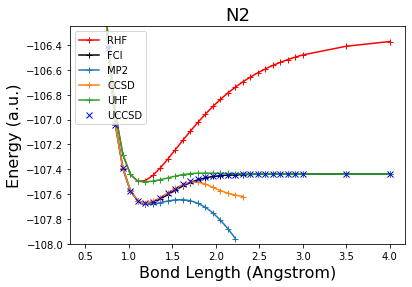

In [33]:
import matplotlib.pyplot as plt

plt.title("N2", fontsize=18)
plt.xlabel("Bond Length (Angstrom)",fontsize=16)
plt.ylabel("Energy (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF, 'r+-', label = 'RHF')
plt.plot(distance, energy_FCI, 'k+-', label = 'FCI')
plt.plot(distance[:21], energy_MP2[:21], '+-', label = 'MP2')
plt.plot(distance[:22], energy_CCSD[:22],'+-', label = 'CCSD')

plt.plot(distance, energy_UHF, '+-',label = 'UHF')
plt.plot(distance, energy_UCCSD, 'bx', label = 'UCCSD')

#plt.plot(distance, energy_RKS, '+-',label = 'RKS')
#plt.plot(distance, energy_UKS, '+-',label = 'UKS')

plt.legend(loc = 2)
plt.ylim(-108.0,-106.25)
#plt.xlim(0.3,2.3)
plt.savefig('./N2_sto3g.tiff', dpi=300, bbox_inches='tight')
plt.show()

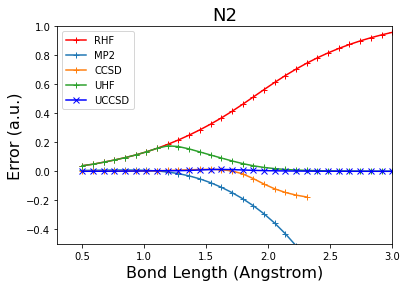

In [9]:
import matplotlib.pyplot as plt

plt.title("N2", fontsize=18)
plt.xlabel("Bond Length (Angstrom)",fontsize=16)
plt.ylabel("Error (a.u.)",fontsize=16)
plt.plot(distance, energy_RHF-energy_FCI, 'r+-', label = 'RHF')
#plt.plot(distance, energy_FCI-energy_FCI, 'k+-', label = 'FCI')
plt.plot(distance[:21], energy_MP2[:21]-energy_FCI[:21], '+-', label = 'MP2')
plt.plot(distance[:22], energy_CCSD[:22]-energy_FCI[:22],'+-', label = 'CCSD')

plt.plot(distance, energy_UHF-energy_FCI, '+-',label = 'UHF')
plt.plot(distance, energy_UCCSD-energy_FCI, 'bx-', label = 'UCCSD')
#plt.plot(distance, energy_UCCSDT-energy_FCI, 'rx-', label = 'UCCSD(T)')

#plt.plot(distance, energy_RKS, '+-',label = 'RKS')
#plt.plot(distance, energy_UKS, '+-',label = 'UKS')

plt.legend(loc = 2)
plt.xlim(0.3,3.0)
plt.ylim(-0.5,1.0)
plt.show()

In [21]:
#with open('N2_sto3g.dat', 'w') as f:
    # Write comment
#    f.write('# {0:^15s} {1:^15s} {2:^15s} {3:^15} {4:^15} {5:^15} {6:^15}\n'.format('distance', 'energy_RHF', 'energy_FCI', 'energy_MP2', 'energy_CCSD', 'energy_UHF', 'energy_UCCSD'))
  
    # Write data
#    for R,energy_RHF,energy_FCI,energy_MP2,energy_CCSD,energy_UHF,energy_UCCSD in zip(distance, energy_RHF, energy_FCI, energy_MP2, energy_CCSD, energy_UHF, energy_UCCSD):
#      f.write(' {0:1.56e} {1:1.56e} {2:1.56e} {3:1.56e} {4:1.56e} {5:1.56e} {6:1.56e}\n'.format(R, energy_RHF, energy_FCI, energy_MP2, energy_CCSD, energy_UHF, energy_UCCSD))